In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import warnings
import os
from datetime import datetime, timedelta
from sklearn import preprocessing
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
import requests

# File ID from Google Drive link
file_id = "1nwj3ciSo8gLaozJ7RcJv6Go6WpLReV3P"
url = f"https://drive.google.com/uc?id={"1nwj3ciSo8gLaozJ7RcJv6Go6WpLReV3P"}"

# Download the file
response = requests.get(url)
with open("urban_connectivity.csv", "wb") as f:
    f.write(response.content)

print("Download complete!")
# Read CSV into DataFrame
try:
    df = pd.read_csv("urban_connectivity.csv")
    print("✅ CSV loaded successfully!")
    print(df.head())  # Show first 5 rows
except Exception as e:
    print("❌ Error reading CSV:", e)

Download complete!
✅ CSV loaded successfully!
   Unnamed: 0         Place_name           City State  Walk Score  \
0           0    Los Angeles, CA    Los Angeles    CA        68.6   
1           1      San Diego, CA      San Diego    CA        53.3   
2           2       San Jose, CA       San Jose    CA        50.5   
3           3  San Francisco, CA  San Francisco    CA        88.7   
4           4         Fresno, CA         Fresno    CA        46.6   

   Transit Score  Bike Score  Population_2021  Population_2022_Census  \
0           52.9        58.7          3792621               3903648.0   
1           37.3        43.0          1307402               1394592.0   
2           40.1        61.5           945942               1018924.0   
3           77.1        72.3           805235                883822.0   
4           33.1        58.1           494665                547499.0   

   City_Population_Stats_adjusted_land_area__acres_  ...  \
0                                       

In [3]:
print(df.shape)
df.head()

(102, 79)


Unnamed: 0         Place_name           City State  Walk Score  \
0           0    Los Angeles, CA    Los Angeles    CA        68.6   
1           1      San Diego, CA      San Diego    CA        53.3   
2           2       San Jose, CA       San Jose    CA        50.5   
3           3  San Francisco, CA  San Francisco    CA        88.7   
4           4         Fresno, CA         Fresno    CA        46.6   

   Transit Score  Bike Score  Population_2021  Population_2022_Census  \
0           52.9        58.7          3792621               3903648.0   
1           37.3        43.0          1307402               1394592.0   
2           40.1        61.5           945942               1018924.0   
3           77.1        72.3           805235                883822.0   
4           33.1        58.1           494665                547499.0   

   City_Population_Stats_adjusted_land_area__acres_  ...  \
0                                          296527.0  ...   
1                                          206371.0  ...   
2                                          112666.0  ...   
3                                           29892.0  ...   
4                                           72537.0  ...   

   Number_of_Splashpads Number_of_Swimming_pools  Number_of_Disc_Golf_Courses  \
0                  17.0                     64.0                          4.0   
1                   4.0                     14.0                          3.0   
2                   2.0                      6.0                          1.0   
3                  11.0                     12.0                          2.0   
4                   7.0                      9.0                          1.0   

   Trail_Miles_Improved_Trails Trail_Miles_Nature_trails  \
0                        33.00                      33.0   
1                        66.20                     292.8   
2                        75.60                      37.9   
3                        51.35                      34.0   
4                         2.00                       0.0   

   Number_of_Tracks_At_Park_Sites  Number_of_Tracks_At_community_schoolyards  \
0                             1.0                                        0.0   
1                             0.0                                       50.0   
2                             0.0                                        0.0   
3                             3.0                                        0.0   
4                            10.0                                        0.0   

   Number_of_Exercise_Zones  Miles_of_car_free_roadways_in_parks  \
0                     133.0                                  0.0   
1                       8.0                                  0.0   
2                      42.0                                  0.0   
3                       5.0                                  7.0   
4                      17.0                                  0.0   

   Permanent_car_free_roadways  
0                          0.0  
1                          0.0  
2                          0.0  
3                          4.0  
4                          0.0  

[5 rows x 79 columns]

# Handling missing values

In [4]:
#  Checking columns with missing or blank values
# Identifying columns that have NaN or empty string values
missing_cols = df.columns[df.isna().any()].tolist()
blank_cols = df.columns[(df == '').any()].tolist()

print("Columns with NaN values:", missing_cols)
print("Columns with blank values:", blank_cols)


Columns with NaN values: ['Transit Score', 'Parkland_Stats_by_City_total_acres', 'Parkland_Stats_by_City__natural', 'Parkland_Stats_by_City__designed', 'Parkland_Stats_by_City_total_park_units', 'Parkland_Stats_by_City_parks_as__city_area', 'Walkable_Park_Access_all_residents', 'Walkable_Park_Access_black', 'Walkable_Park_Access_hispanic_latinx', 'Walkable_Park_Access_asian', 'Walkable_Park_Access_other_race', 'Walkable_Park_Access_multiple_races', 'Walkable_Park_Access_pacific_islander', 'Walkable_Park_Access_american_indian_alaska_native', 'Walkable_Park_Access_all_people_of_color', 'Walkable_Park_Access_white', 'Walkable_Park_Access_low__75_city_income_', 'Walkable_Park_Access_middle', 'Walkable_Park_Access_high__125_city_median_income_', 'Walkable_Park_Access_children__u19_', 'Walkable_Park_Access_adults__19_64_', 'Walkable_Park_Access_seniors__65_', 'Distribution_of_Park_Space_low_income', 'Distribution_of_Park_Space_high_income', 'Distribution_of_Park_Space_black', 'Distribution_

In [5]:

#  Filling missing or blank values with 0.0
df[missing_cols] = df[missing_cols].fillna(0.0)
df[blank_cols] = df[blank_cols].replace('', 0.0)

# Verifying that there are no more missing or blank values
print(df[missing_cols + blank_cols].isna().sum())
print((df[missing_cols + blank_cols] == '').sum())


Transit Score                                               0
Parkland_Stats_by_City_total_acres                          0
Parkland_Stats_by_City__natural                             0
Parkland_Stats_by_City__designed                            0
Parkland_Stats_by_City_total_park_units                     0
Parkland_Stats_by_City_parks_as__city_area                  0
Walkable_Park_Access_all_residents                          0
Walkable_Park_Access_black                                  0
Walkable_Park_Access_hispanic_latinx                        0
Walkable_Park_Access_asian                                  0
Walkable_Park_Access_other_race                             0
Walkable_Park_Access_multiple_races                         0
Walkable_Park_Access_pacific_islander                       0
Walkable_Park_Access_american_indian_alaska_native          0
Walkable_Park_Access_all_people_of_color                    0
Walkable_Park_Access_white                                  0
Walkable


- Checked all key accessibility variables (walkability, transit, bike, parks, etc.) for missing values.
- **No missing values** were found in any of these columns.


In [6]:
# Dropping the unnamed column (commonly named 'Unnamed: 0')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]



### Normalization of Access Metrics

- Access indicators have different scales (e.g., Walk Score, population density).
- Min-Max scaling is applied to transform all access metrics onto a uniform 0–1 range.
- This ensures fair comparison and aggregation without any single metric dominating.


In [8]:

# Select all numeric columns
access_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Normalize only numeric columns
scaler = MinMaxScaler()
df[access_cols] = scaler.fit_transform(df[access_cols])

# Check normalized values
df[access_cols].head()


Walk Score  Transit Score  Bike Score  Population_2021  \
0    0.701780       0.597065    0.539033         0.450241   
1    0.474777       0.420993    0.247212         0.138486   
2    0.433234       0.452596    0.591078         0.093143   
3    1.000000       0.870203    0.791822         0.075492   
4    0.375371       0.373589    0.527881         0.036533   

   Population_2022_Census  City_Population_Stats_adjusted_land_area__acres_  \
0                0.427450                                          0.266411   
1                0.136441                                          0.182809   
2                0.092870                                          0.095916   
3                0.077200                                          0.019159   
4                0.038193                                          0.058704   

   City_Population_Stats_density__people_acre_  \
0                                     0.273168   
1                                     0.137471   
2                                     0.185890   
3                                     0.620576   
4                                     0.154207   

   City_Population_Stats_2000_population  \
0                               0.453880   
1                               0.140967   
2                               0.099255   
3                               0.084422   
4                               0.040171   

   City_Population_Stats_population_growth  \
0                                 0.206989   
1                                 0.251699   
2                                 0.251641   
3                                 0.250566   
4                                 0.327512   

   Parkland_Stats_by_City_total_acres  ...  Number_of_Splashpads  \
0                            0.045454  ...              0.028571   
1                            0.046022  ...              0.006723   
2                            0.017459  ...              0.003361   
3                            0.007070  ...              0.018487   
4                            0.003933  ...              0.011765   

   Number_of_Swimming_pools  Number_of_Disc_Golf_Courses  \
0                  0.810127                     0.285714   
1                  0.177215                     0.214286   
2                  0.075949                     0.071429   
3                  0.151899                     0.142857   
4                  0.113924                     0.071429   

   Trail_Miles_Improved_Trails  Trail_Miles_Nature_trails  \
0                     0.020012                   0.093484   
1                     0.040144                   0.829462   
2                     0.045845                   0.107365   
3                     0.031139                   0.096317   
4                     0.001213                   0.000000   

   Number_of_Tracks_At_Park_Sites  Number_of_Tracks_At_community_schoolyards  \
0                        0.007092                                   0.000000   
1                        0.000000                                   0.320513   
2                        0.000000                                   0.000000   
3                        0.021277                                   0.000000   
4                        0.070922                                   0.000000   

   Number_of_Exercise_Zones  Miles_of_car_free_roadways_in_parks  \
0                  0.475000                             0.000000   
1                  0.028571                             0.000000   
2                  0.150000                             0.000000   
3                  0.017857                             0.120482   
4                  0.060714                             0.000000   

   Permanent_car_free_roadways  
0                     0.000195  
1                     0.000195  
2                     0.000195  
3                     0.078305  
4                     0.000195  

[5 rows x 73 columns]

### Observation after Normalization

- All access-related and city population metrics are now scaled between 0 and 1.
- Min-Max normalization ensures that indicators like Walk Score, Transit Score, and number of park amenities are comparable despite originally being on different scales.
- This step is essential for fair aggregation or computing composite indices without bias from larger-scale variables.
- The dataset is now ready for further analysis, such as ranking cities by accessibility or creating composite indices.


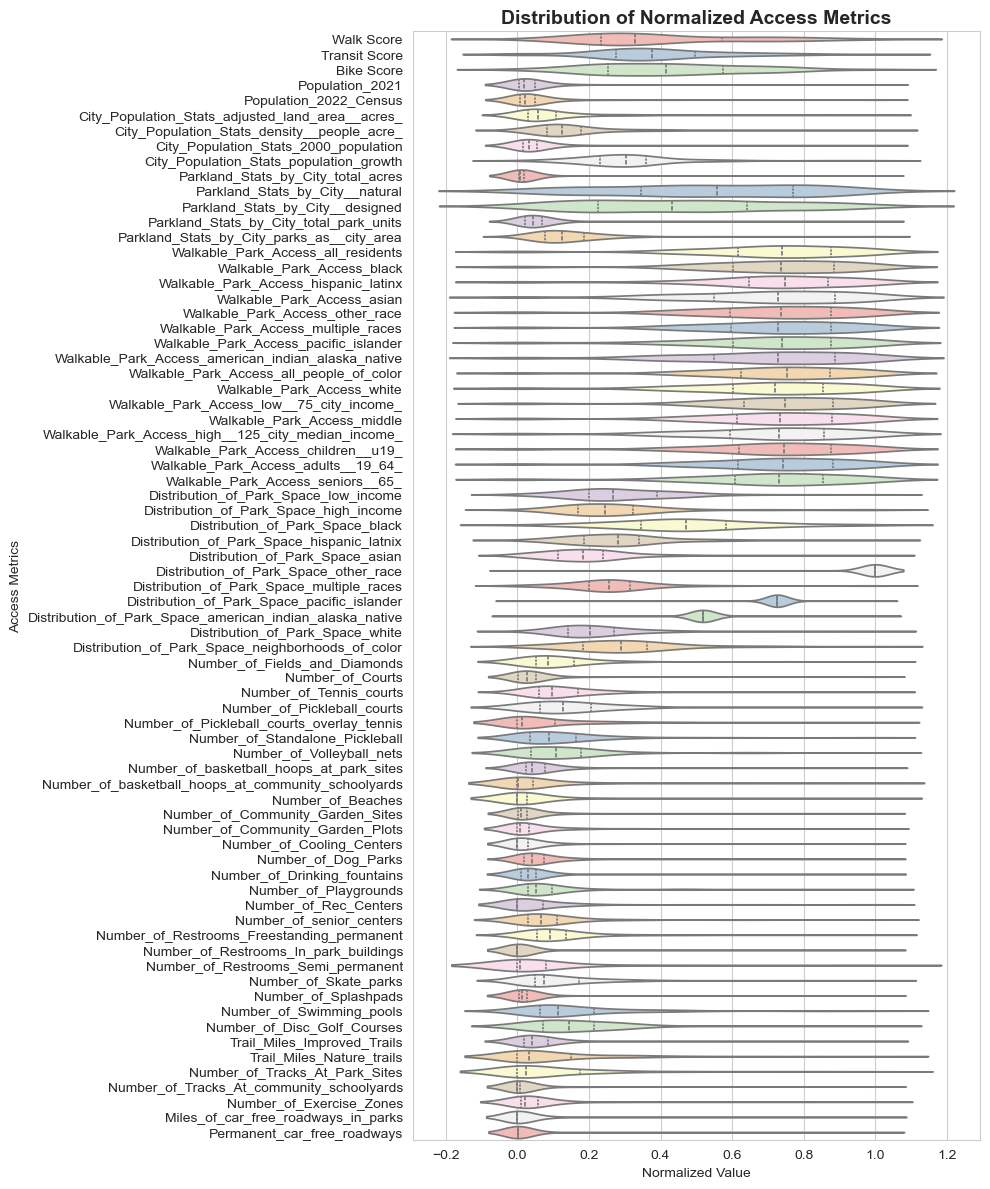

In [9]:
plt.figure(figsize=(10, 12))
sns.set_style("whitegrid")

sns.violinplot(data=df[access_cols], orient="h", palette="Pastel1", inner="quartile")
plt.title('Distribution of Normalized Access Metrics', fontsize=14, weight='bold')
plt.xlabel('Normalized Value')
plt.ylabel('Access Metrics')
plt.tight_layout()
plt.show()


# Composite Service Access Index  
- Aggregated normalized scores of walkability, transit, bike, and park access.  
- Calculated as a simple average to get an overall Service Access Score (0-1).  
- Higher score → better overall access; useful for ranking and comparing cities.  
- Provides a single metric for categorization, clustering, and equity analysis.  


In [10]:


# Calculate simple average of normalized access metrics
df['ServiceAccessScore'] = df[access_cols].mean(axis=1)


# Previewing top and bottom cities
top_cities = df[['City', 'ServiceAccessScore']].sort_values(by='ServiceAccessScore', ascending=False).head(10)
bottom_cities = df[['City', 'ServiceAccessScore']].sort_values(by='ServiceAccessScore', ascending=True).head(10)

print("Top 10 Cities by Service Access Score:")
print(top_cities)

print("\nBottom 10 Cities by Service Access Score:")
print(bottom_cities)


Top 10 Cities by Service Access Score:
                City  ServiceAccessScore
21          New York            0.696885
17           Chicago            0.503532
93      Philadelphia            0.446224
101  Washington D.C.            0.422598
18           Seattle            0.406991
3      San Francisco            0.397119
78       Minneapolis            0.392010
0        Los Angeles            0.379864
1          San Diego            0.376087
47            Boston            0.366960

Bottom 10 Cities by Service Access Score:
           City  ServiceAccessScore
82   Des Moines            0.110746
84    Lexington            0.117757
81    Nashville            0.133545
70    Charlotte            0.155317
29      Gilbert            0.209740
83   Louisville            0.213869
80      Memphis            0.216546
8   Bakersfield            0.216551
61       Laredo            0.218514
28   Scottsdale            0.218900


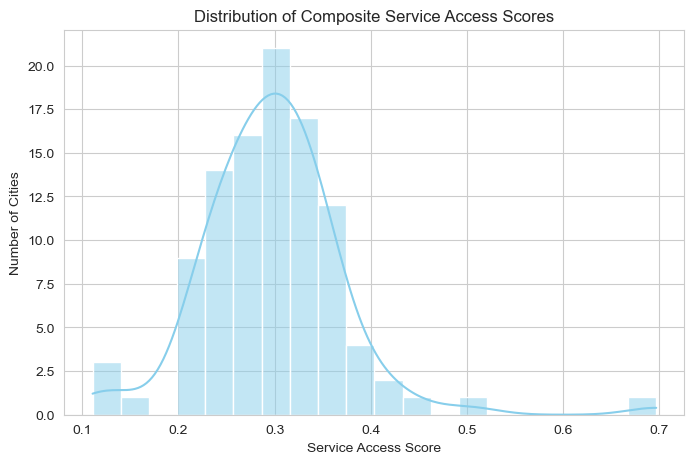

In [11]:

plt.figure(figsize=(8,5))
sns.histplot(df['ServiceAccessScore'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Composite Service Access Scores')
plt.xlabel('Service Access Score')
plt.ylabel('Number of Cities')
plt.show()

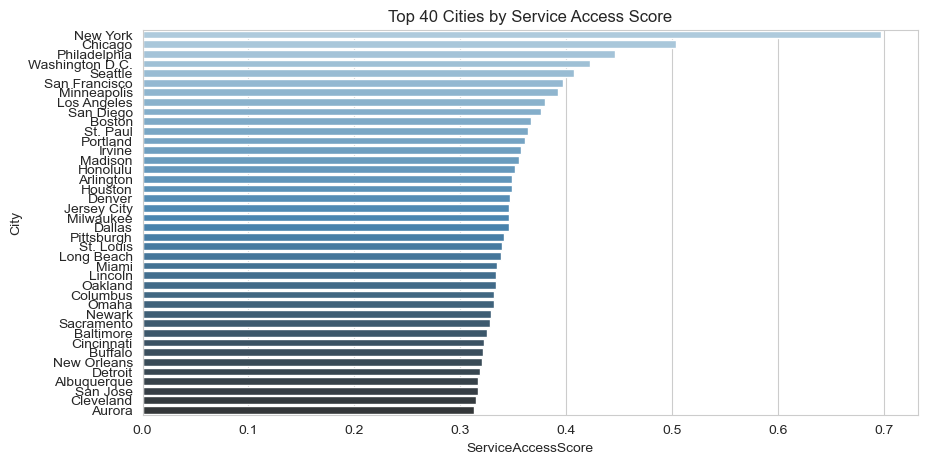

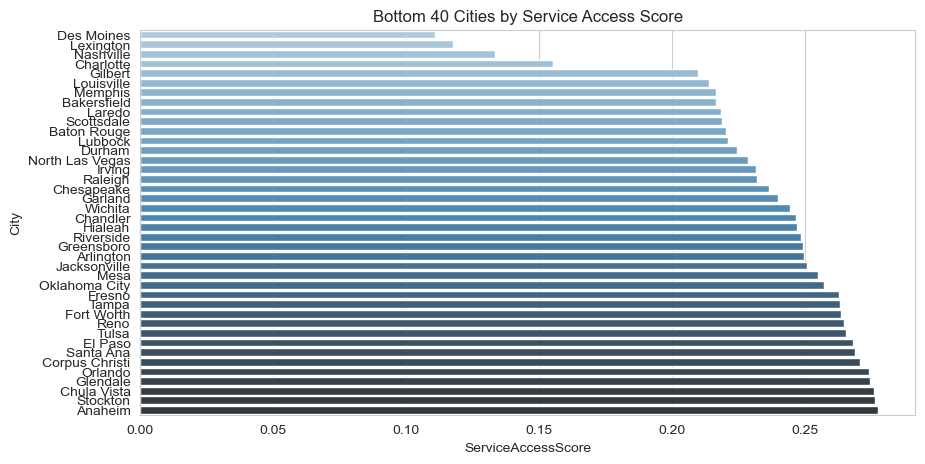

In [12]:
top_cities = df.nlargest(40, 'ServiceAccessScore')
bottom_cities = df.nsmallest(40, 'ServiceAccessScore')

plt.figure(figsize=(10,5))
sns.barplot(x='ServiceAccessScore', y='City', data=top_cities, palette='Blues_d')
plt.title('Top 40 Cities by Service Access Score')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='ServiceAccessScore', y='City', data=bottom_cities, palette='Blues_d')
plt.title('Bottom 40 Cities by Service Access Score')
plt.show()

# Observations:
 - Cities with the highest scores have balanced access across walk, transit, bike, and parks.
 - Cities with lowest scores may lack one or more access dimensions.
 - The composite score allows easy ranking and comparison of urban service access.

# Categorization into Access Tiers & KMeans-based Access Tier
- Segment cities based on Service Access Score into 'Low', 'Medium', and 'High' access groups.
- Uses quantile-based binning (tertiles) for fair distribution across cities.
- Helps identify patterns and disparities in urban accessibility.


In [13]:
# Create access tiers using tertiles (3 equal groups)
df['Access_Tier'] = pd.qcut(df['ServiceAccessScore'], q=3, labels=['Low Access', 'Medium Access', 'High Access'])

# Check distribution of cities across tiers
df['Access_Tier'].value_counts()


Access_Tier
Low Access       34
Medium Access    34
High Access      34
Name: count, dtype: int64

- View Cities in Each Access Tier
- Helps identify which cities fall under 'Low', 'Medium', and 'High' access categories.
- Useful for policy targeting and comparative analysis.


In [14]:
# List cities by Access Tier
for tier in df['Access_Tier'].unique():
    print(f"\nCities in {tier}:")
    print(df[df['Access_Tier'] == tier]['City'].tolist())



Cities in High Access:
['Los Angeles', 'San Diego', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Irvine', 'Chicago', 'Seattle', 'Portland', 'New York', 'Buffalo', 'Miami', 'St. Louis', 'Arlington', 'Baltimore', 'Boston', 'Columbus', 'Cincinnati', 'Houston', 'Dallas', 'Denver', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Philadelphia', 'Pittsburgh', 'Omaha', 'Lincoln', 'Washington D.C.']

Cities in Medium Access:
['San Jose', 'Anaheim', 'Stockton', 'Chula Vista', 'Fremont', 'Detroit', 'Spokane', 'Phoenix', 'Tucson', 'Glendale', 'New Orleans', 'St. Petersburg', 'Orlando', 'Kansas City', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Richmond', 'Cleveland', 'Toledo', 'San Antonio', 'Austin', 'Corpus Christi', 'Plano', 'Colorado Springs', 'Aurora', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in Low Access:
['Fresno', 'Bakersfield', 'Santa Ana', 'Riverside',

In [15]:
# Creating a table showing cities grouped by Access Tier
tier_table = df.groupby('Access_Tier')['City'].apply(list).reset_index()
tier_table


Access_Tier                                               City
0     Low Access  [Fresno, Bakersfield, Santa Ana, Riverside, Me...
1  Medium Access  [San Jose, Anaheim, Stockton, Chula Vista, Fre...
2    High Access  [Los Angeles, San Diego, San Francisco, Sacram...

In [16]:
#Creating KMeans-based Access Tiers
kmeans = KMeans(n_clusters=3, random_state=42)
df['Access_Tier_KMeans'] = kmeans.fit_predict(df[['ServiceAccessScore']])

# Mapping numeric clusters to descriptive labels
cluster_mapping = {0: 'Low Access', 1: 'Medium Access', 2: 'High Access'}
df['Access_Tier_KMeans'] = df['Access_Tier_KMeans'].map(cluster_mapping)

# Inspecting cities in each KMeans-based Access Tier
for tier in df['Access_Tier_KMeans'].unique():
    print(f"\nCities in {tier}:")
    print(df[df['Access_Tier_KMeans'] == tier]['City'].tolist())


Cities in Low Access:
['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Fremont', 'Irvine', 'Detroit', 'Seattle', 'Spokane', 'Portland', 'Buffalo', 'Phoenix', 'Tucson', 'New Orleans', 'Miami', 'St. Petersburg', 'Kansas City', 'St. Louis', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Arlington', 'Richmond', 'Baltimore', 'Boston', 'Columbus', 'Cleveland', 'Cincinnati', 'Toledo', 'Houston', 'San Antonio', 'Dallas', 'Austin', 'Plano', 'Denver', 'Colorado Springs', 'Aurora', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Pittsburgh', 'Omaha', 'Lincoln', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in High Access:
['Fresno', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside', 'Stockton', 'Chula Vista', 'Mesa', 'Chandler', 'Glendale', 'Scottsdale', 'Gilbert', 'Baton Rouge', 'Jacksonville', 'Tampa', 'Orlando', 'Hialeah', 'Chesa

In [17]:
# Fiting KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Access_Tier_KMeans_Num'] = kmeans.fit_predict(df[['ServiceAccessScore']])

# Sorting clusters by their centroid to map to Low/Medium/High
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_clusters = cluster_centers.argsort()  # indices from lowest to highest
cluster_mapping = {sorted_clusters[0]: 'Low Access',
                   sorted_clusters[1]: 'Medium Access',
                   sorted_clusters[2]: 'High Access'}

# Mapping numeric cluster to descriptive label
df['Access_Tier_KMeans'] = df['Access_Tier_KMeans_Num'].map(cluster_mapping)

#  dropping the numeric helper column
df.drop('Access_Tier_KMeans_Num', axis=1, inplace=True)

# Checking cities in each tier
for tier in df['Access_Tier_KMeans'].unique():
    print(f"\nCities in {tier}:")
    print(df[df['Access_Tier_KMeans'] == tier]['City'].tolist())




Cities in Medium Access:
['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Fremont', 'Irvine', 'Detroit', 'Seattle', 'Spokane', 'Portland', 'Buffalo', 'Phoenix', 'Tucson', 'New Orleans', 'Miami', 'St. Petersburg', 'Kansas City', 'St. Louis', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Arlington', 'Richmond', 'Baltimore', 'Boston', 'Columbus', 'Cleveland', 'Cincinnati', 'Toledo', 'Houston', 'San Antonio', 'Dallas', 'Austin', 'Plano', 'Denver', 'Colorado Springs', 'Aurora', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Pittsburgh', 'Omaha', 'Lincoln', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in Low Access:
['Fresno', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside', 'Stockton', 'Chula Vista', 'Mesa', 'Chandler', 'Glendale', 'Scottsdale', 'Gilbert', 'Baton Rouge', 'Jacksonville', 'Tampa', 'Orlando', 'Hialeah', 'Che

Countplot of Access Tiers – shows number of cities in each tier:

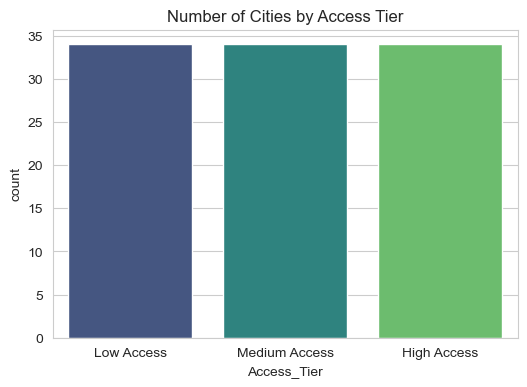


Cities in High Access:
['Los Angeles', 'San Diego', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Irvine', 'Chicago', 'Seattle', 'Portland', 'New York', 'Buffalo', 'Miami', 'St. Louis', 'Arlington', 'Baltimore', 'Boston', 'Columbus', 'Cincinnati', 'Houston', 'Dallas', 'Denver', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Philadelphia', 'Pittsburgh', 'Omaha', 'Lincoln', 'Washington D.C.']

Cities in Medium Access:
['San Jose', 'Anaheim', 'Stockton', 'Chula Vista', 'Fremont', 'Detroit', 'Spokane', 'Phoenix', 'Tucson', 'Glendale', 'New Orleans', 'St. Petersburg', 'Orlando', 'Kansas City', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Richmond', 'Cleveland', 'Toledo', 'San Antonio', 'Austin', 'Corpus Christi', 'Plano', 'Colorado Springs', 'Aurora', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in Low Access:
['Fresno', 'Bakersfield', 'Santa Ana', 'Riverside',

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of cities per Access Tier
plt.figure(figsize=(6,4))
sns.countplot(x='Access_Tier', data=df, palette='viridis')
plt.title('Number of Cities by Access Tier')
plt.show()

# Display the cities in each tier
for tier in df['Access_Tier'].unique():
    cities_in_tier = df[df['Access_Tier'] == tier]['City'].tolist()
    print(f"\nCities in {tier}:")
    print(cities_in_tier)


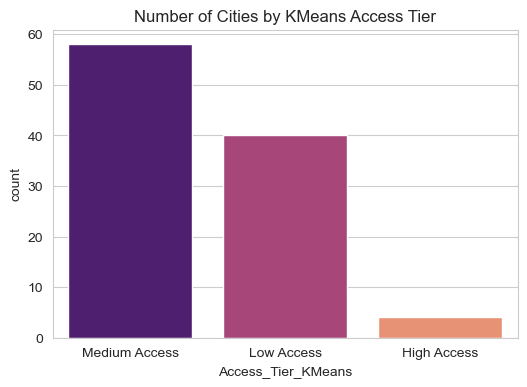


Cities in Medium Access:
['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Fremont', 'Irvine', 'Detroit', 'Seattle', 'Spokane', 'Portland', 'Buffalo', 'Phoenix', 'Tucson', 'New Orleans', 'Miami', 'St. Petersburg', 'Kansas City', 'St. Louis', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Arlington', 'Richmond', 'Baltimore', 'Boston', 'Columbus', 'Cleveland', 'Cincinnati', 'Toledo', 'Houston', 'San Antonio', 'Dallas', 'Austin', 'Plano', 'Denver', 'Colorado Springs', 'Aurora', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Pittsburgh', 'Omaha', 'Lincoln', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in Low Access:
['Fresno', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside', 'Stockton', 'Chula Vista', 'Mesa', 'Chandler', 'Glendale', 'Scottsdale', 'Gilbert', 'Baton Rouge', 'Jacksonville', 'Tampa', 'Orlando', 'Hialeah', 'Che

In [19]:
# Countplot for KMeans-based Access Tiers
plt.figure(figsize=(6,4))
sns.countplot(x='Access_Tier_KMeans', data=df, palette='magma')
plt.title('Number of Cities by KMeans Access Tier')
plt.show()

# Display the cities in each KMeans tier
for tier in df['Access_Tier_KMeans'].unique():
    cities_in_tier = df[df['Access_Tier_KMeans'] == tier]['City'].tolist()
    print(f"\nCities in {tier}:")
    print(cities_in_tier)


 KMeans-Based Access Tier Distribution
- The plot shows the number of cities in each KMeans-derived access tier.
- The list shows which cities belong to 'Low Access', 'Medium Access', and 'High Access' clusters.
- This clustering may reveal patterns not captured by simple quantile binning.

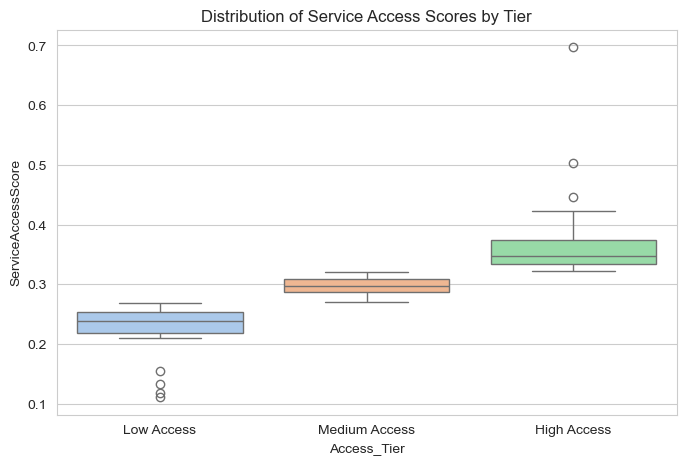

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Access_Tier', y='ServiceAccessScore', data=df, palette='pastel')
plt.title('Distribution of Service Access Scores by Tier')
plt.show()

Access Tier Distribution
- The plot shows how many cities fall into each access tier.
- The list below shows exactly which cities are in 'Low', 'Medium', and 'High Access'.
- This helps identify both the leaders and laggards in urban service access.

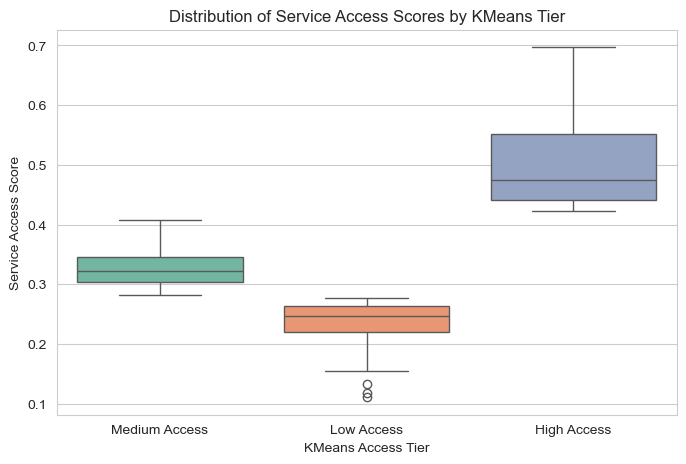

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Access_Tier_KMeans', y='ServiceAccessScore', data=df, palette='Set2')
plt.title('Distribution of Service Access Scores by KMeans Tier')
plt.xlabel('KMeans Access Tier')
plt.ylabel('Service Access Score')
plt.show()

Service Access Score Distribution by KMeans Tier
- Shows how the composite Service Access Scores vary within each KMeans cluster.
- Helps assess the separation and overlap of scores across 'Low', 'Medium', and 'High' access tiers.
- Useful for evaluating clustering effectiveness and identifying outlier cities.


In [22]:
# Creating a comparison table for KMeans-based Access Tier and  Access Tier
tier_comparison = df[['City', 'ServiceAccessScore', 'Access_Tier_KMeans', 'Access_Tier']]

# Display the table
tier_comparison.head(20)  # showing top 20 for a quick view

City  ServiceAccessScore Access_Tier_KMeans    Access_Tier
0     Los Angeles            0.379864      Medium Access    High Access
1       San Diego            0.376087      Medium Access    High Access
2        San Jose            0.316959      Medium Access  Medium Access
3   San Francisco            0.397119      Medium Access    High Access
4          Fresno            0.262992         Low Access     Low Access
5      Sacramento            0.328384      Medium Access    High Access
6      Long Beach            0.338363      Medium Access    High Access
7         Oakland            0.333984      Medium Access    High Access
8     Bakersfield            0.216551         Low Access     Low Access
9         Anaheim            0.277639         Low Access  Medium Access
10      Santa Ana            0.268752         Low Access     Low Access
11      Riverside            0.248562         Low Access     Low Access
12       Stockton            0.276333         Low Access  Medium Access
13    Chula Vista            0.276082         Low Access  Medium Access
14        Fremont            0.287414      Medium Access  Medium Access
15         Irvine            0.357009      Medium Access    High Access
16        Detroit            0.318985      Medium Access  Medium Access
17        Chicago            0.503532        High Access    High Access
18        Seattle            0.406991      Medium Access    High Access
19        Spokane            0.305169      Medium Access  Medium Access

In [23]:
# Creating  a column to indicate if KMeans and quantile tiers match
tier_comparison['Tier_Match'] = tier_comparison['Access_Tier_KMeans'] == tier_comparison['Access_Tier']

# Viewing the table with a quick indication of agreement
tier_comparison.head(20)  # Top 20 rows

#see only cities where tiers match
matching_cities = tier_comparison[tier_comparison['Tier_Match'] == True]
print("Cities where KMeans and Quantile Tiers match:")
print(matching_cities[['City', 'Access_Tier_KMeans', 'Access_Tier']])

# see only cities where tiers differ
non_matching_cities = tier_comparison[tier_comparison['Tier_Match'] == False]
print("\nCities where KMeans and Quantile Tiers differ:")
print(non_matching_cities[['City', 'Access_Tier_KMeans', 'Access_Tier']])


Cities where KMeans and Quantile Tiers match:
                City Access_Tier_KMeans    Access_Tier
2           San Jose      Medium Access  Medium Access
4             Fresno         Low Access     Low Access
8        Bakersfield         Low Access     Low Access
10         Santa Ana         Low Access     Low Access
11         Riverside         Low Access     Low Access
..               ...                ...            ...
97           Wichita         Low Access     Low Access
98         Anchorage      Medium Access  Medium Access
99        Boise City      Medium Access  Medium Access
100      Albuquerque      Medium Access  Medium Access
101  Washington D.C.        High Access    High Access

[66 rows x 3 columns]

Cities where KMeans and Quantile Tiers differ:
              City Access_Tier_KMeans    Access_Tier
0      Los Angeles      Medium Access    High Access
1        San Diego      Medium Access    High Access
3    San Francisco      Medium Access    High Access
5       Sac

# Walk, Transit, Bike Scores

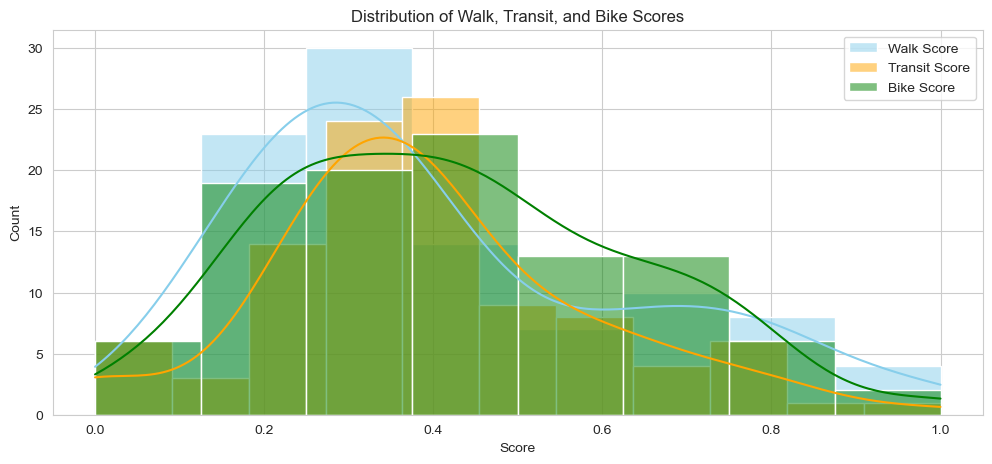

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(df['Walk Score'], kde=True, color='skyblue', label='Walk Score')
sns.histplot(df['Transit Score'], kde=True, color='orange', label='Transit Score')
sns.histplot(df['Bike Score'], kde=True, color='green', label='Bike Score')
plt.title("Distribution of Walk, Transit, and Bike Scores")
plt.xlabel("Score")
plt.legend()
plt.show()

# Results

## Distribution of Walk, Transit, and Bike Scores

The following histogram shows the distribution of **Walk Score, Transit Score, and Bike Score** across all cities in our dataset

# Interpretation

- Walk Score Distribution:

    - Most cities cluster around moderate Walk Scores, indicating that while some cities are highly walkable, a large portion of cities have room for improvement in pedestrian infrastructure.

    - A few cities show extremely high Walk Scores, representing well-planned urban centers with dense amenities and pedestrian-friendly environments.

- Transit Score Distribution:

    - Transit Scores display a wider spread compared to Walk Scores, suggesting variability in public transit availability across cities.

    - Some cities have very low Transit Scores, highlighting areas where residents may be highly car-dependent or underserved by public transport.

- Bike Score Distribution:

    - Bike Scores are generally lower than Walk Scores, reflecting the limited availability of cycling infrastructure in many cities.

    - Peaks in the distribution correspond to cities with strong bike networks and safety measures for cyclists.

- Overall Insight:

    - The distributions indicate that walkability is generally stronger than bike infrastructure, but transit access varies widely, which aligns with urban planning trends where pedestrian-friendly design often precedes investments in cycling or transit infrastructure.

    - These patterns help explain disparities in the Composite Service Access Index, where cities with balanced scores across Walk, Transit, and Bike tend to rank higher in overall service access.


# Scatter plot connecting Service Access Score and Walk/Transit/Bike Scores

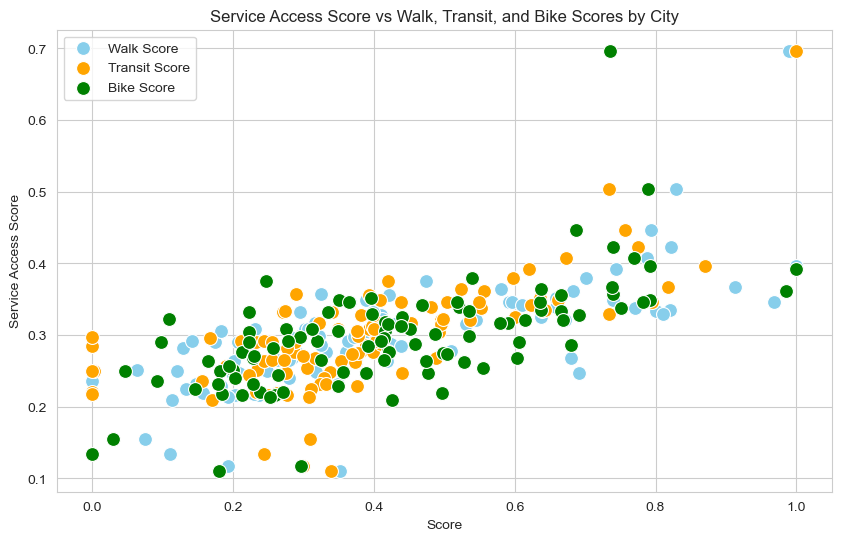

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=df, color='skyblue', s=100, label='Walk Score')
sns.scatterplot(x='Transit Score', y='ServiceAccessScore', data=df, color='orange', s=100, label='Transit Score')
sns.scatterplot(x='Bike Score', y='ServiceAccessScore', data=df, color='green', s=100, label='Bike Score')
plt.title("Service Access Score vs Walk, Transit, and Bike Scores by City")
plt.xlabel("Score")
plt.ylabel("Service Access Score")
plt.legend()
plt.show()

 # Walk Score vs Service Access

In [26]:
# Top 10 cities with high Walk Score and high Service Access
top_walk_access = df.sort_values(by=['Walk Score', 'ServiceAccessScore'], ascending=False).head(10)
print("Top 10 Cities: High Walk Score & High Service Access")
print(top_walk_access[['City', 'Walk Score', 'ServiceAccessScore']])

# Bottom 10 cities with low Walk Score and low Service Access
bottom_walk_access = df.sort_values(by=['Walk Score', 'ServiceAccessScore'], ascending=True).head(10)
print("\nBottom 10 Cities: Low Walk Score & Low Service Access")
print(bottom_walk_access[['City', 'Walk Score', 'ServiceAccessScore']])



Top 10 Cities: High Walk Score & High Service Access
                City  Walk Score  ServiceAccessScore
3      San Francisco    1.000000            0.397119
21          New York    0.989614            0.696885
77       Jersey City    0.968843            0.346096
47            Boston    0.912463            0.366960
17           Chicago    0.829377            0.503532
101  Washington D.C.    0.821958            0.422598
33             Miami    0.820475            0.334893
76            Newark    0.810089            0.329005
7            Oakland    0.801187            0.333984
93      Philadelphia    0.793769            0.446224

Bottom 10 Cities: Low Walk Score & Low Service Access
            City  Walk Score  ServiceAccessScore
43    Chesapeake    0.000000            0.236619
32  Jacksonville    0.063798            0.250805
70     Charlotte    0.075668            0.155317
81     Nashville    0.111276            0.133545
29       Gilbert    0.114243            0.209740
72    Greensbor

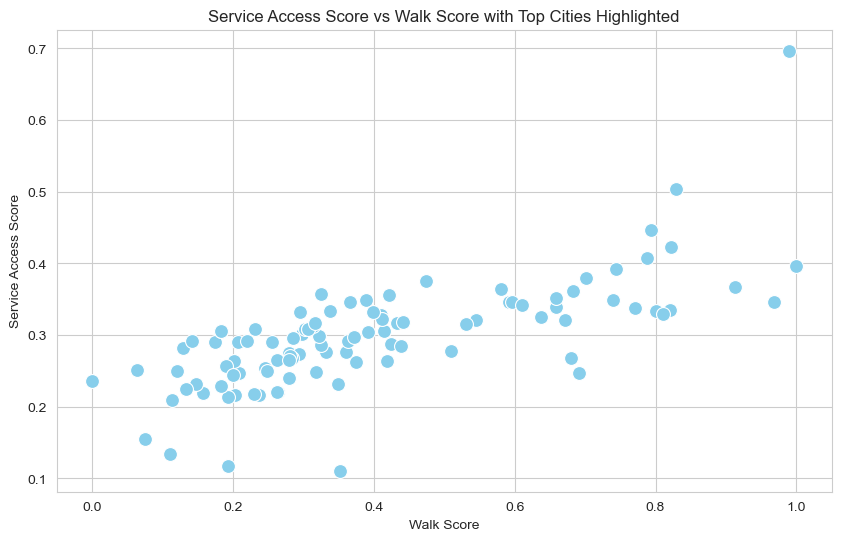

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=df, color='skyblue', s=100)
plt.title("Service Access Score vs Walk Score with Top Cities Highlighted")
plt.xlabel("Walk Score")
plt.ylabel("Service Access Score")
plt.show()

# Interpretation

- Positive Correlation:

    - The scatter plot shows a general positive trend: cities with higher Walk Scores tend to have higher overall Service Access Scores.

    - This suggests that walkability is a strong contributor to overall service access, as expected in urban planning.

- Top Cities:

    - Cities with both high Walk Scores and high Service Access Scores likely have well-connected neighborhoods, easy access to parks, transit, and amenities.

    - These cities serve as examples of best practices in pedestrian-friendly urban design.

- Bottom Cities:

    - Cities with low Walk Scores and low Service Access Scores may suffer from poor pedestrian infrastructure, limited nearby amenities, and insufficient urban planning for multi-modal access.

    - These cities highlight areas for targeted urban development and investment in pedestrian and service access improvements.

- Insight for Policy and Planning:

    - Prioritizing improvements in walkability can have a strong positive effect on overall service access.

    - Urban planners can use this analysis to identify cities that would benefit most from investments in pedestrian infrastructure to improve equity and accessibility.

# Transit Score vs Service Access

In [28]:
# Top 10 cities with high Transit Score & high Service Access
top_transit_access = df.sort_values(by=['Transit Score', 'ServiceAccessScore'], ascending=False).head(10)
print("Top 10 Cities: High Transit Score & High Service Access")
print(top_transit_access[['City', 'Transit Score', 'ServiceAccessScore']])

# Bottom 10 cities with low Transit Score & low Service Access
bottom_transit_access = df.sort_values(by=['Transit Score', 'ServiceAccessScore'], ascending=True).head(10)
print("\nBottom 10 Cities: Low Transit Score & Low Service Access")
print(bottom_transit_access[['City', 'Transit Score', 'ServiceAccessScore']])

Top 10 Cities: High Transit Score & High Service Access
                City  Transit Score  ServiceAccessScore
21          New York       1.000000            0.696885
3      San Francisco       0.870203            0.397119
47            Boston       0.817156            0.366960
77       Jersey City       0.795711            0.346096
101  Washington D.C.       0.775395            0.422598
93      Philadelphia       0.756208            0.446224
17           Chicago       0.733634            0.503532
76            Newark       0.733634            0.329005
18           Seattle       0.672686            0.406991
44         Arlington       0.661400            0.348661

Bottom 10 Cities: Low Transit Score & Low Service Access
             City  Transit Score  ServiceAccessScore
61         Laredo       0.000000            0.218514
31    Baton Rouge       0.000000            0.220422
72     Greensboro       0.000000            0.249233
45       Richmond       0.000000            0.285383
51   

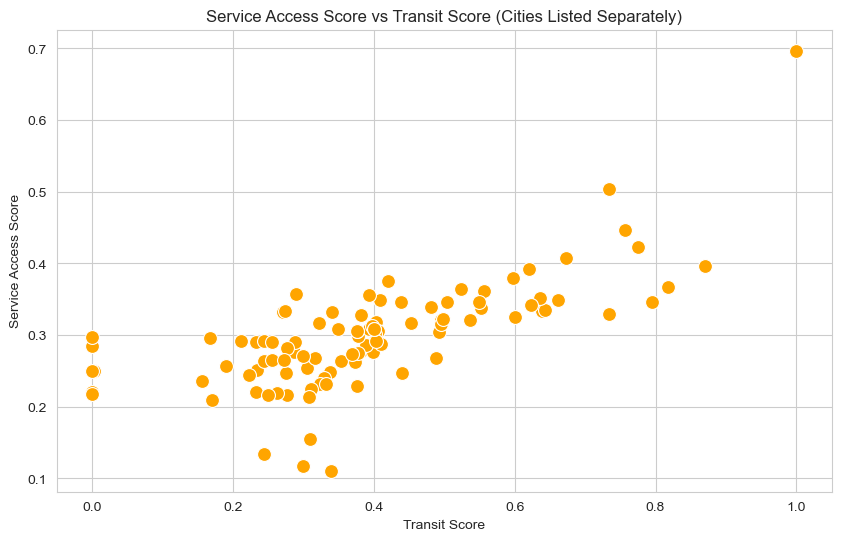

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Transit Score', y='ServiceAccessScore', data=df, color='orange', s=100)
plt.title("Service Access Score vs Transit Score (Cities Listed Separately)")
plt.xlabel("Transit Score")
plt.ylabel("Service Access Score")
plt.show()

## Interpretation

- Positive Correlation:

    - The scatter plot shows that cities with higher Transit Scores generally have higher overall Service Access Scores.

    - This indicates that access to public transportation strongly contributes to overall service availability, supporting mobility and connectivity in urban areas.

- Top Cities:

    - Cities with high Transit Scores and high Service Access Scores likely have well-integrated public transit systems, nearby amenities, and multi-modal connectivity.

    - These cities can serve as benchmarks for efficient transit-oriented urban planning.

- Bottom Cities:

    - Cities with low Transit Scores and low Service Access Scores may have limited or unreliable public transportation and fewer accessible services.

    - These cities represent opportunities for policy interventions to expand transit infrastructure and improve equitable service access.

- Insight for Policy and Planning:

    - Enhancing transit access can significantly improve overall service availability in a city.

    - Urban planners can target cities with low Transit Scores for transit expansion projects, thereby improving mobility, sustainability, and equity.


# Bike Score vs Service Access

In [30]:
# Top 10 cities with high Bike Score & high Service Access
top_bike_access = df.sort_values(by=['Bike Score', 'ServiceAccessScore'], ascending=False).head(10)
print("Top 10 Cities: High Bike Score & High Service Access")
print(top_bike_access[['City', 'Bike Score', 'ServiceAccessScore']])

# Bottom 10 cities with low Bike Score & low Service Access
bottom_bike_access = df.sort_values(by=['Bike Score', 'ServiceAccessScore'], ascending=True).head(10)
print("\nBottom 10 Cities: Low Bike Score & Low Service Access")
print(bottom_bike_access[['City', 'Bike Score', 'ServiceAccessScore']])

Top 10 Cities: High Bike Score & High Service Access
                City  Bike Score  ServiceAccessScore
78       Minneapolis    1.000000            0.392010
20          Portland    0.985130            0.361178
3      San Francisco    0.791822            0.397119
44         Arlington    0.791822            0.348661
17           Chicago    0.789963            0.503532
67            Denver    0.782528            0.346548
18           Seattle    0.769517            0.406991
6         Long Beach    0.750929            0.338363
101  Washington D.C.    0.739777            0.422598
15            Irvine    0.739777            0.357009

Bottom 10 Cities: Low Bike Score & Low Service Access
           City  Bike Score  ServiceAccessScore
81    Nashville    0.000000            0.133545
70    Charlotte    0.029740            0.155317
72   Greensboro    0.046468            0.249233
43   Chesapeake    0.092937            0.236619
38  Kansas City    0.098513            0.290424
50   Cincinnati    0.

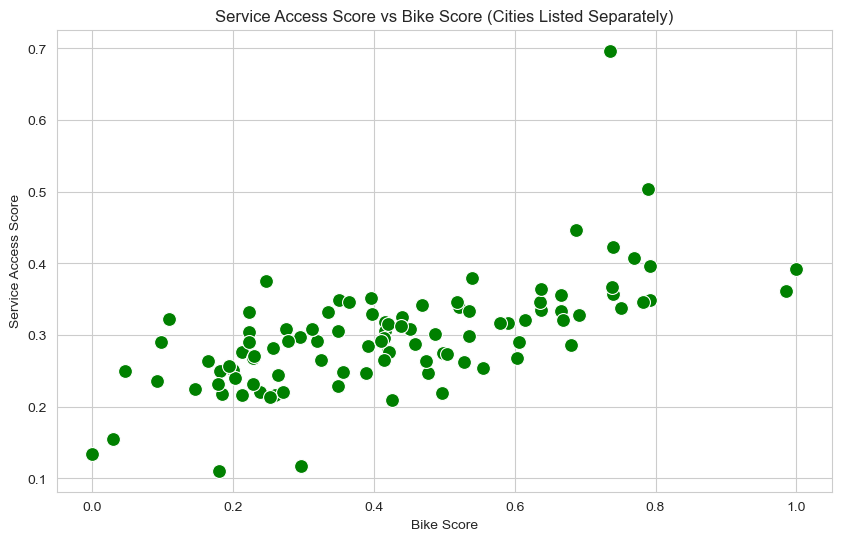

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Bike Score', y='ServiceAccessScore', data=df, color='green', s=100)
plt.title("Service Access Score vs Bike Score (Cities Listed Separately)")
plt.xlabel("Bike Score")
plt.ylabel("Service Access Score")
plt.show()

## Interpretation

- Positive Correlation:

    - The scatter plot shows that cities with higher Bike Scores tend to also have higher overall Service Access Scores.

    - This suggests that safe and accessible cycling infrastructure contributes meaningfully to a city’s overall service access and livability.

- Top Cities:

    - Cities with high Bike Scores and high Service Access Scores likely have extensive bike lanes, bike-sharing programs, and convenient access to amenities.

    - These cities exemplify the benefits of promoting active transportation for urban accessibility.

- Bottom Cities:

    - Cities with low Bike Scores and low Service Access Scores may lack safe cycling infrastructure, limiting mobility options and reducing access to local services.

    - These cities highlight areas where investment in cycling infrastructure could improve urban connectivity and sustainability.

- Insight for Policy and Planning:

    - Supporting bicycle-friendly infrastructure can boost overall service access and promote healthier, more sustainable urban mobility.

    - Planners can identify cities with low Bike Scores as candidates for cycling infrastructure development and active transport policies.


# Correlation heatmap for mobility scores

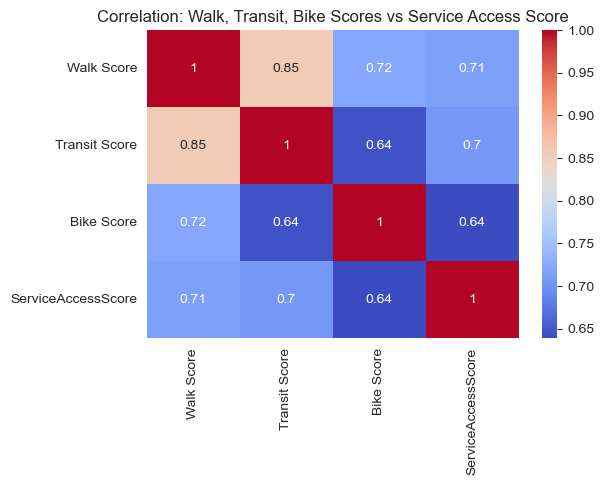

In [32]:
# Include Service Access Score
mobility_scores = df[['Walk Score', 'Transit Score', 'Bike Score', 'ServiceAccessScore']]

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(mobility_scores.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Walk, Transit, Bike Scores vs Service Access Score")
plt.show()



In [33]:
# Top and bottom cities by Walk Score
top_walk = df[['City', 'Walk Score', 'ServiceAccessScore']].sort_values(by='Walk Score', ascending=False).head(10)
bottom_walk = df[['City', 'Walk Score', 'ServiceAccessScore']].sort_values(by='Walk Score', ascending=True).head(10)

print("Top 10 Cities by Walk Score:")
print(top_walk[['City', 'Walk Score', 'ServiceAccessScore']], "\n")

print("Bottom 10 Cities by Walk Score:")
print(bottom_walk[['City', 'Walk Score', 'ServiceAccessScore']], "\n")


Top 10 Cities by Walk Score:
                City  Walk Score  ServiceAccessScore
3      San Francisco    1.000000            0.397119
21          New York    0.989614            0.696885
77       Jersey City    0.968843            0.346096
47            Boston    0.912463            0.366960
17           Chicago    0.829377            0.503532
101  Washington D.C.    0.821958            0.422598
33             Miami    0.820475            0.334893
76            Newark    0.810089            0.329005
7            Oakland    0.801187            0.333984
93      Philadelphia    0.793769            0.446224 

Bottom 10 Cities by Walk Score:
            City  Walk Score  ServiceAccessScore
43    Chesapeake    0.000000            0.236619
32  Jacksonville    0.063798            0.250805
70     Charlotte    0.075668            0.155317
81     Nashville    0.111276            0.133545
29       Gilbert    0.114243            0.209740
72    Greensboro    0.120178            0.249233
88     Hend

In [34]:
 # Top and bottom cities by Transit Score
top_transit = df[['City', 'Transit Score', 'ServiceAccessScore']].sort_values(by='Transit Score', ascending=False).head(10)
bottom_transit = df[['City', 'Transit Score', 'ServiceAccessScore']].sort_values(by='Transit Score', ascending=True).head(10)

print("Top 10 Cities by Transit Score:")
print(top_transit[['City', 'Transit Score', 'ServiceAccessScore']], "\n")

print("Bottom 10 Cities by Transit Score:")
print(bottom_transit[['City', 'Transit Score', 'ServiceAccessScore']], "\n")

Top 10 Cities by Transit Score:
                City  Transit Score  ServiceAccessScore
21          New York       1.000000            0.696885
3      San Francisco       0.870203            0.397119
47            Boston       0.817156            0.366960
77       Jersey City       0.795711            0.346096
101  Washington D.C.       0.775395            0.422598
93      Philadelphia       0.756208            0.446224
17           Chicago       0.733634            0.503532
76            Newark       0.733634            0.329005
18           Seattle       0.672686            0.406991
44         Arlington       0.661400            0.348661 

Bottom 10 Cities by Transit Score:
             City  Transit Score  ServiceAccessScore
31    Baton Rouge       0.000000            0.220422
61         Laredo       0.000000            0.218514
72     Greensboro       0.000000            0.249233
45       Richmond       0.000000            0.285383
51         Toledo       0.000000            0.2968

In [35]:
# Top and bottom cities by Bike Score
top_bike = df[['City', 'Bike Score', 'ServiceAccessScore']].sort_values(by='Bike Score', ascending=False).head(10)
bottom_bike = df[['City', 'Bike Score', 'ServiceAccessScore']].sort_values(by='Bike Score', ascending=True).head(10)

print("Top 10 Cities by Bike Score:")
print(top_bike[['City', 'Bike Score', 'ServiceAccessScore']], "\n")

print("Bottom 10 Cities by Bike Score:")
print(bottom_bike[['City', 'Bike Score', 'ServiceAccessScore']], "\n")


Top 10 Cities by Bike Score:
                City  Bike Score  ServiceAccessScore
78       Minneapolis    1.000000            0.392010
20          Portland    0.985130            0.361178
3      San Francisco    0.791822            0.397119
44         Arlington    0.791822            0.348661
17           Chicago    0.789963            0.503532
67            Denver    0.782528            0.346548
18           Seattle    0.769517            0.406991
6         Long Beach    0.750929            0.338363
15            Irvine    0.739777            0.357009
101  Washington D.C.    0.739777            0.422598 

Bottom 10 Cities by Bike Score:
           City  Bike Score  ServiceAccessScore
81    Nashville    0.000000            0.133545
70    Charlotte    0.029740            0.155317
72   Greensboro    0.046468            0.249233
43   Chesapeake    0.092937            0.236619
38  Kansas City    0.098513            0.290424
50   Cincinnati    0.109665            0.322215
73       Durham   

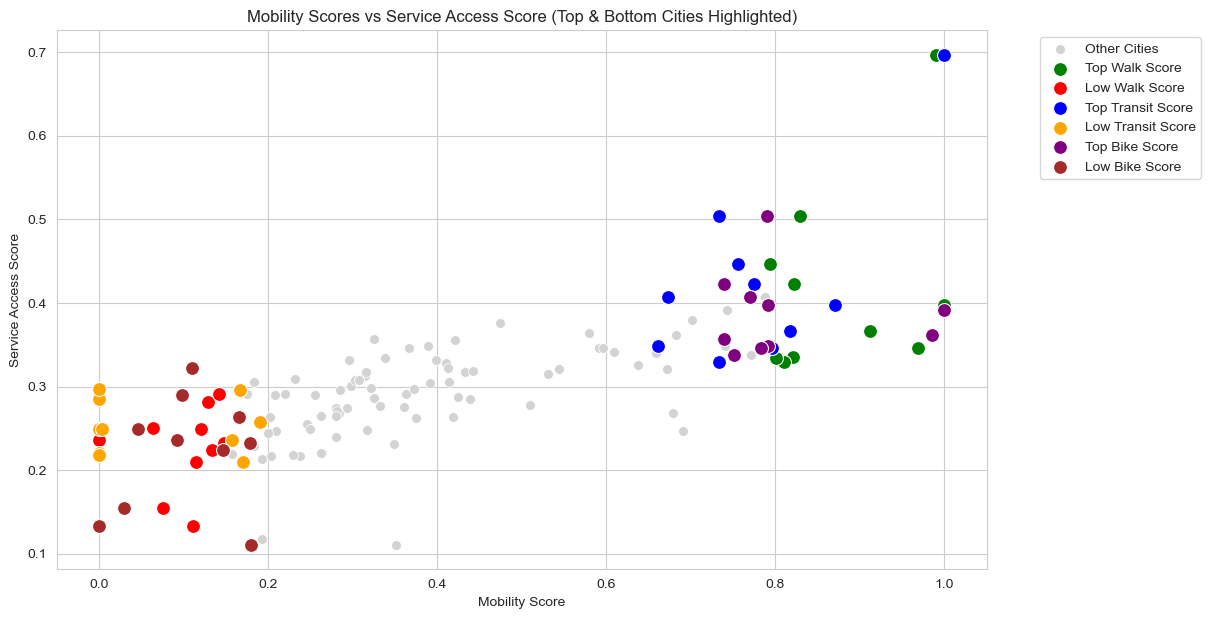

In [36]:
plt.figure(figsize=(12,7))

# Base grey for all cities
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=df, color='lightgrey', s=50, label='Other Cities')

# Highlight top/bottom Walk Score cities
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=top_walk, color='green', s=100, label='Top Walk Score')
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=bottom_walk, color='red', s=100, label='Low Walk Score')

# Highlight top/bottom Transit Score cities
sns.scatterplot(x='Transit Score', y='ServiceAccessScore', data=top_transit, color='blue', s=100, label='Top Transit Score')
sns.scatterplot(x='Transit Score', y='ServiceAccessScore', data=bottom_transit, color='orange', s=100, label='Low Transit Score')

# Highlight top/bottom Bike Score cities
sns.scatterplot(x='Bike Score', y='ServiceAccessScore', data=top_bike, color='purple', s=100, label='Top Bike Score')
sns.scatterplot(x='Bike Score', y='ServiceAccessScore', data=bottom_bike, color='brown', s=100, label='Low Bike Score')

plt.title("Mobility Scores vs Service Access Score (Top & Bottom Cities Highlighted)")
plt.xlabel("Mobility Score")
plt.ylabel("Service Access Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Interpretation
- Walk, Transit, and Bike Scores are positively correlated with each other.
- Cities with higher mobility scores generally have higher Service Access Scores.
- Most cities in the high mobility score range fall in the high Service Access tier,while cities with low mobility scores are often in the low Service Access tier.
- A few outliers exist where mobility scores are high but Service Access is low, indicating areas with good transport infrastructure but limited access to essential services.
- Improving mobility infrastructure could support better service access in low-access cities.


# Population Growth 

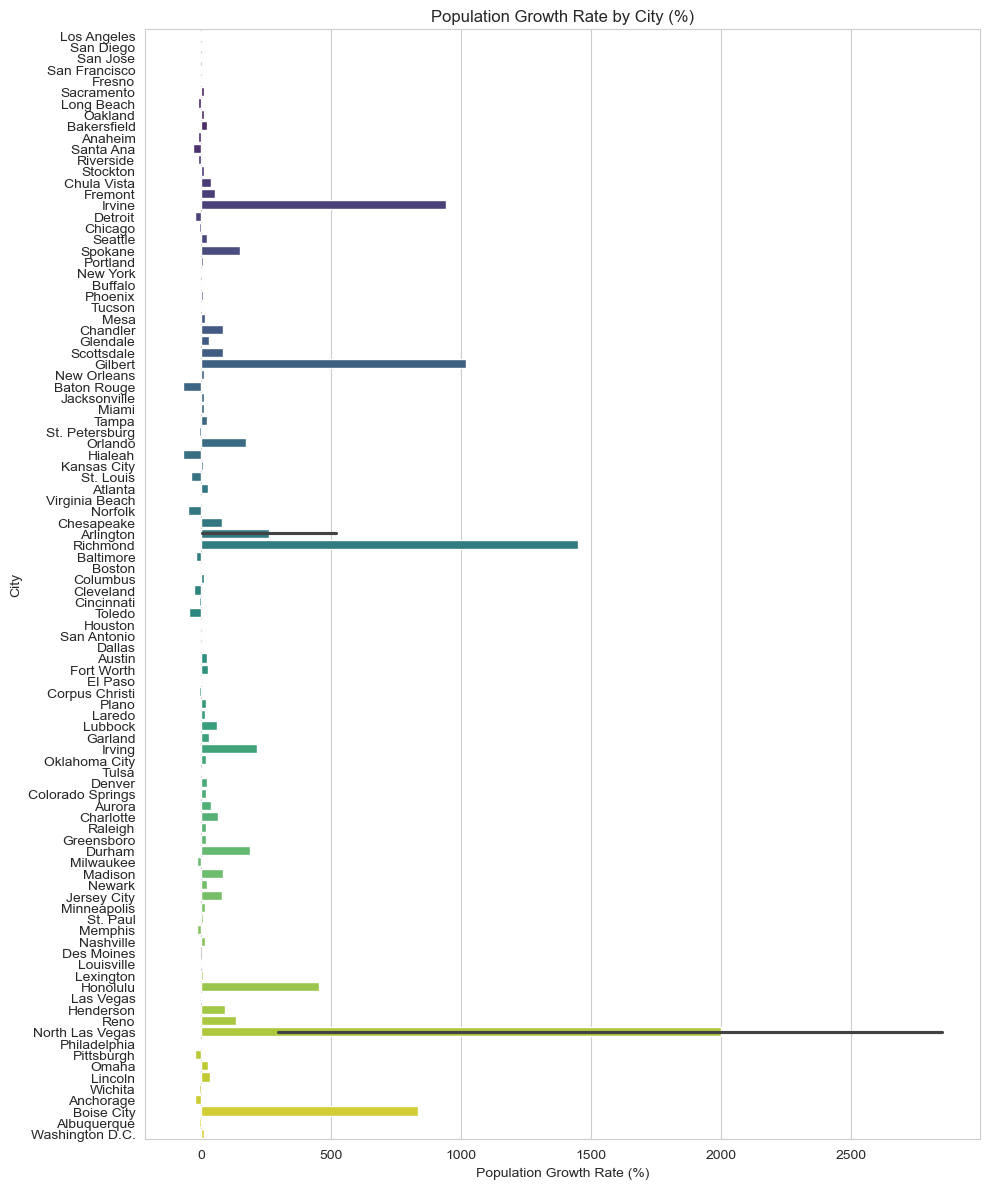

In [37]:
# 1. Calculating Population Growth Rate
df['Population_Growth_Rate'] = ((df['Population_2022_Census'] - df['Population_2021']) 
                                / df['Population_2021']) * 100

# 2. Visualizing Population Growth Rate by City
plt.figure(figsize=(10,12))  # taller figure for many cities
sns.barplot(x='Population_Growth_Rate', y='City', data=df, palette='viridis')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("City")
plt.title("Population Growth Rate by City (%)")
plt.tight_layout()  # adjusts padding
plt.show()



In [38]:
# 3. Defining thresholds for high and low growth (e.g., using median)
growth_median = df['Population_Growth_Rate'].median()
score_median = df['ServiceAccessScore'].median()

# 4. Segmenting cities based on growth rate and service access score

# High Growth & High Service Access
high_growth_high_score = df[(df['Population_Growth_Rate'] > growth_median) & 
                            (df['ServiceAccessScore'] > score_median)][['City','Population_Growth_Rate','ServiceAccessScore']]

# High Growth & Low Service Access
high_growth_low_score = df[(df['Population_Growth_Rate'] > growth_median) & 
                           (df['ServiceAccessScore'] <= score_median)][['City','Population_Growth_Rate','ServiceAccessScore']]

# Low Growth & High Service Access
low_growth_high_score = df[(df['Population_Growth_Rate'] <= growth_median) & 
                           (df['ServiceAccessScore'] > score_median)][['City','Population_Growth_Rate','ServiceAccessScore']]

# Low Growth & Low Service Access
low_growth_low_score = df[(df['Population_Growth_Rate'] <= growth_median) & 
                          (df['ServiceAccessScore'] <= score_median)][['City','Population_Growth_Rate','ServiceAccessScore']]

# 5. Display results
print("High Growth & High Service Access Cities:\n", high_growth_high_score)



High Growth & High Service Access Cities:
                 City  Population_Growth_Rate  ServiceAccessScore
7            Oakland               12.773615            0.333984
15            Irvine              943.254202            0.357009
18           Seattle               23.881033            0.406991
19           Spokane              150.040804            0.305169
40           Atlanta               26.889676            0.303756
44         Arlington              519.365720            0.348661
48          Columbus               12.421128            0.332114
55            Austin               23.700181            0.307888
67            Denver               22.708411            0.346548
69            Aurora               37.411124            0.312519
75           Madison               83.016536            0.355472
76            Newark               21.776395            0.329005
77       Jersey City               80.158295            0.346096
78       Minneapolis               14.017881   

In [39]:
print("\nHigh Growth & Low Service Access Cities:\n", high_growth_low_score)


High Growth & Low Service Access Cities:
                 City  Population_Growth_Rate  ServiceAccessScore
8        Bakersfield               23.568890            0.216551
13       Chula Vista               37.953389            0.276082
14           Fremont               53.507385            0.287414
25              Mesa               16.067896            0.254762
26          Chandler               86.379129            0.246644
27          Glendale               32.756152            0.274491
28        Scottsdale               84.194546            0.218900
29           Gilbert             1018.065640            0.209740
32      Jacksonville               13.608039            0.250805
34             Tampa               21.677251            0.263371
36           Orlando              172.689680            0.274010
43        Chesapeake               82.302080            0.236619
45          Richmond             1448.353287            0.285383
56        Fort Worth               28.661397   

In [40]:
print("\nLow Growth & High Service Access Cities:\n", low_growth_high_score)


Low Growth & High Service Access Cities:
                City  Population_Growth_Rate  ServiceAccessScore
0       Los Angeles               -5.062033            0.379864
1         San Diego               -1.476570            0.376087
2          San Jose               -0.293281            0.316959
3     San Francisco                2.262565            0.397119
5        Sacramento               11.332184            0.328384
6        Long Beach              -12.151552            0.338363
16          Detroit              -24.050936            0.318985
17          Chicago               -6.051528            0.503532
20         Portland                8.718637            0.361178
21         New York                0.000000            0.696885
22          Buffalo               -2.650020            0.321629
23          Phoenix                6.357881            0.301272
30      New Orleans               12.229566            0.320537
33            Miami               12.036474            0.3348

In [41]:
print("\nLow Growth & Low Service Access Cities:\n", low_growth_low_score)


Low Growth & Low Service Access Cities:
               City  Population_Growth_Rate  ServiceAccessScore
4           Fresno                4.541797            0.262992
9          Anaheim              -11.032280            0.277639
10       Santa Ana              -30.638801            0.268752
11       Riverside               -9.338480            0.248562
12        Stockton               10.382643            0.276333
24          Tucson               -3.507857            0.286107
31     Baton Rouge              -67.121552            0.220422
37         Hialeah              -68.290883            0.246954
38     Kansas City                8.115355            0.290424
41  Virginia Beach               -3.029423            0.291052
42         Norfolk              -51.102943            0.291429
57         El Paso               -2.685755            0.268206
58       Arlington                3.569089            0.249645
59  Corpus Christi               -7.310829            0.270877
66           

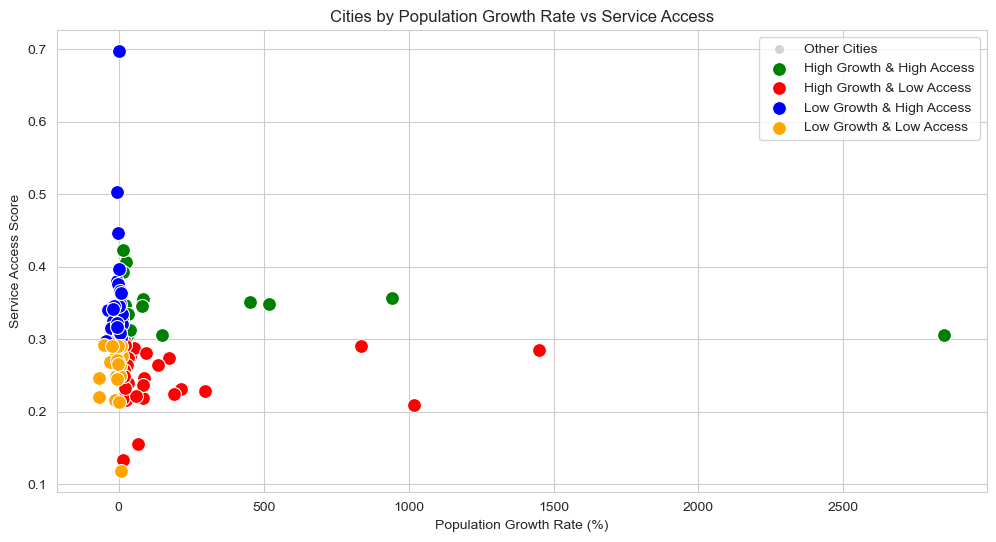

In [42]:
# Visualizing Population Growth vs Service Access with categories
plt.figure(figsize=(12,6))

# Plotting all cities in light grey
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=df, color='lightgrey', s=50, label='Other Cities')

# High Growth & High Service Access
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=high_growth_high_score, color='green', s=100, label='High Growth & High Access')

# High Growth & Low Service Access
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=high_growth_low_score, color='red', s=100, label='High Growth & Low Access')

# Low Growth & High Service Access
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=low_growth_high_score, color='blue', s=100, label='Low Growth & High Access')

# Low Growth & Low Service Access
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=low_growth_low_score, color='orange', s=100, label='Low Growth & Low Access')

plt.title("Cities by Population Growth Rate vs Service Access")
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Service Access Score")
plt.legend()
plt.show()


### Visualization: Population Growth vs Service Access

- **Green:** High Growth & High Access – cities growing fast while maintaining good service coverage.  
- **Red:** High Growth & Low Access – fast-growing cities under service pressure; need infrastructure focus.  
- **Blue:** Low Growth & High Access – slower-growing cities with well-established services.  
- **Orange:** Low Growth & Low Access – cities with both low growth and low service access, likely underserved.

This visualization helps identify cities requiring **urgent planning** (red), versus those performing efficiently (green & blue).


### Interpretations: Service Access vs Population Growth

1. **High Growth & High Service Access**  
   - Cities in this quadrant are experiencing **rapid demographic expansion** while still maintaining **strong accessibility to services** such as transit, walkability, bike infrastructure, and parks.  
   - This combination is relatively rare because high population growth often puts pressure on urban systems, but when achieved, it reflects **effective planning and investment in scalable infrastructure**.  
   - Such cities can act as **models for sustainable growth**, showing that it is possible to expand while avoiding service deficits.  
   - Policy lesson: These cities should continue monitoring population trends to ensure infrastructure keeps pace with demand, but they already provide a blueprint for other fast-growing metros.

2. **High Growth & Low Service Access**  
   - Cities in this category are expanding rapidly but **lag behind in service provision**. This imbalance often leads to **increased car dependence**, traffic congestion, unequal access to amenities, and environmental stress.  
   - The gap suggests that while population is rising, urban services like transit networks, walkable neighborhoods, and bike infrastructure are **not keeping up**.  
   - If left unaddressed, these accessibility gaps may widen, disproportionately affecting low-income and marginalized populations who rely more on public transit and local services.  
   - Policy lesson: Urban planners and city governments must **prioritize infrastructure investment and zoning reforms** to prevent long-term inequities and inefficiencies.

3. **Low Growth & High Service Access**  
   - Cities here have **slower or stable population growth** but maintain **high service accessibility**. This typically indicates **mature infrastructure systems** that have been developed over time and continue to serve residents effectively.  
   - These cities may not face immediate strain from growth but can act as **examples of efficient service provision** and **balanced urban design**.  
   - Policy lesson: For these cities, the challenge is less about expansion and more about **maintaining infrastructure quality** and ensuring equitable access across different neighborhoods. They can focus on refining and modernizing existing systems.

4. **Low Growth & Low Service Access**  
   - Cities with both low growth and low service access face a **double challenge**. On one hand, population pressures are not overwhelming; on the other hand, residents still experience **limited accessibility to key services**.  
   - This can signal **structural underinvestment** in infrastructure or historical patterns of urban design that prioritize cars over public transit and local amenities.  
   - Such cities may be overlooked in planning discussions since growth is minimal, but residents in these areas may face long-standing inequities in mobility and access.  
   - Policy lesson: Proactive investment is required here, not for scaling up with growth but for **correcting deficiencies** and ensuring a minimum standard of equitable urban service access.

---

**Overall Insight:**  
- The comparison of **Service Access Scores with Population Growth** provides a powerful framework for identifying where **urban planning efforts are most urgently needed**.  
- High-growth cities with low access represent **emerging problem areas** that, without intervention, risk deepening inequities and car-dependence.  
- Low-growth cities with low access highlight **persistent inequalities** that are not caused by growth pressures but by **historical planning decisions and underinvestment**.  
- Conversely, high-access cities, whether fast- or slow-growing, serve as **positive case studies**, showing that sustainable and inclusive accessibility is achievable.  
- From a policy perspective, these findings suggest a need for **differentiated strategies**:  
  - **Growth management and infrastructure scaling** in fast-growing cities.  
  - **Equity-focused retrofitting and service enhancement** in slow-growth but low-access cities.  
  - **Maintenance and modernization** in slow-growth, high-access cities.  

Ultimately, analyzing accessibility in the context of population dynamics helps planners and policymakers move beyond static averages, enabling them to anticipate future pressures, address long-standing inequities, and design cities aligned with the vision of the **15-minute city**.


# Density Analysis

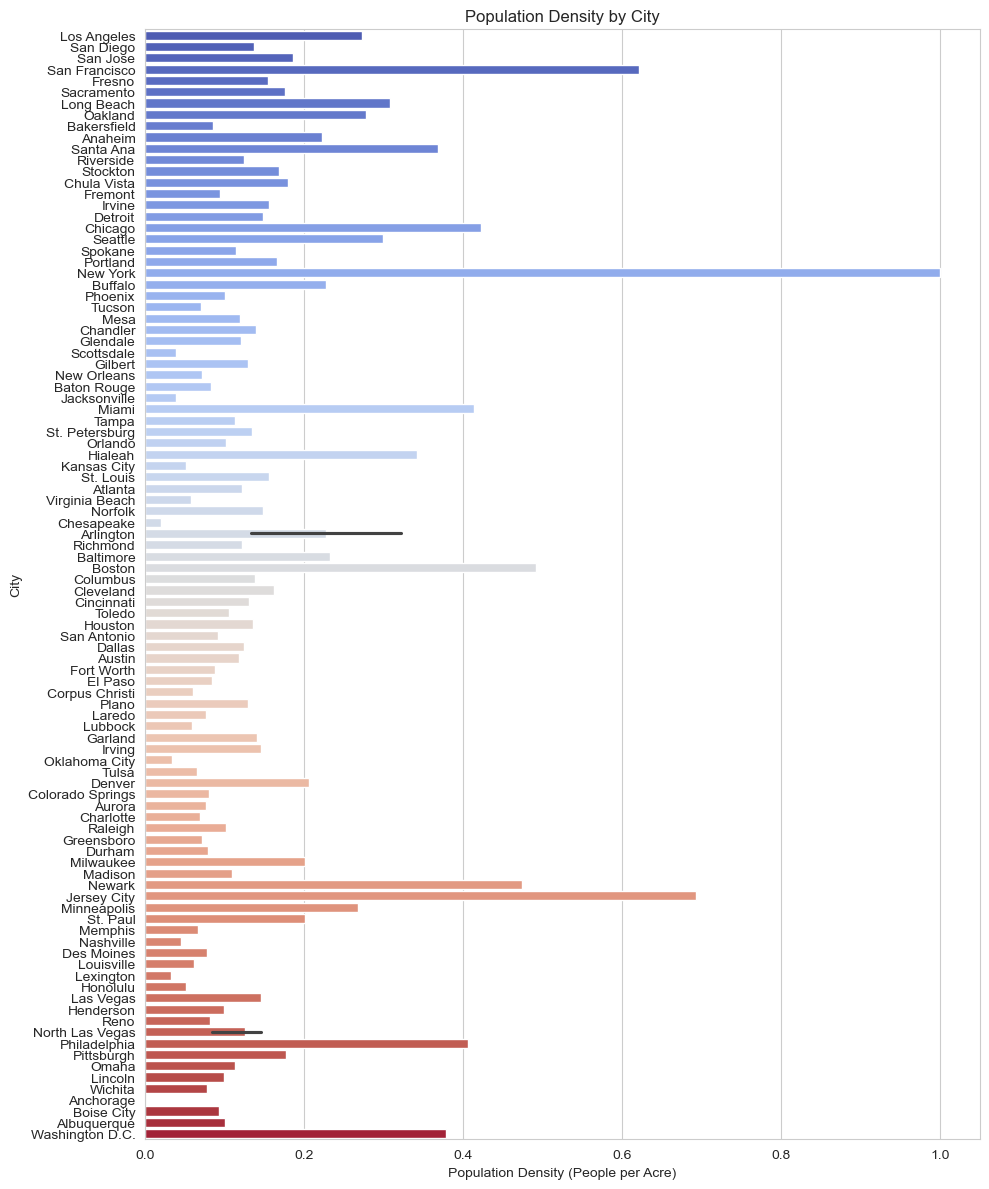

In [43]:
# Horizontal bar plot for Population Density
plt.figure(figsize=(10,12))  # taller figure for readability
sns.barplot(x='City_Population_Stats_density__people_acre_', y='City', data=df, palette='coolwarm')
plt.xlabel("Population Density (People per Acre)")
plt.ylabel("City")
plt.title("Population Density by City")
plt.tight_layout()  # adjust layout for clarity
plt.show()


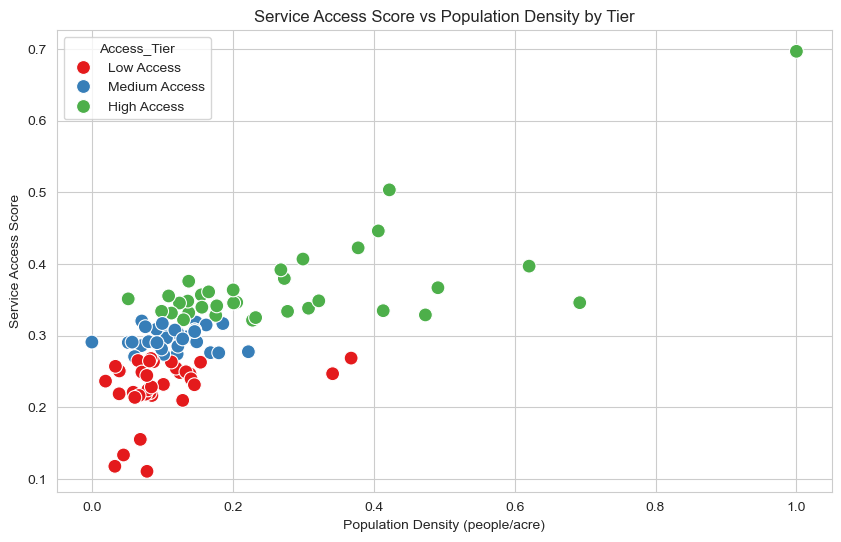

In [44]:
 #Compare Access Score with Population Density ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                hue='Access_Tier', data=df, palette='Set1', s=100)
plt.title("Service Access Score vs Population Density by Tier")
plt.xlabel("Population Density (people/acre)")
plt.ylabel("Service Access Score")
plt.show()

Cities with Low Population Density & High Service Access:
        City  City_Population_Stats_density__people_acre_  ServiceAccessScore
85  Honolulu                                     0.051574            0.351398

Cities with High Population Density & Low Service Access:
       City  City_Population_Stats_density__people_acre_  ServiceAccessScore
37  Hialeah                                     0.341678            0.246954


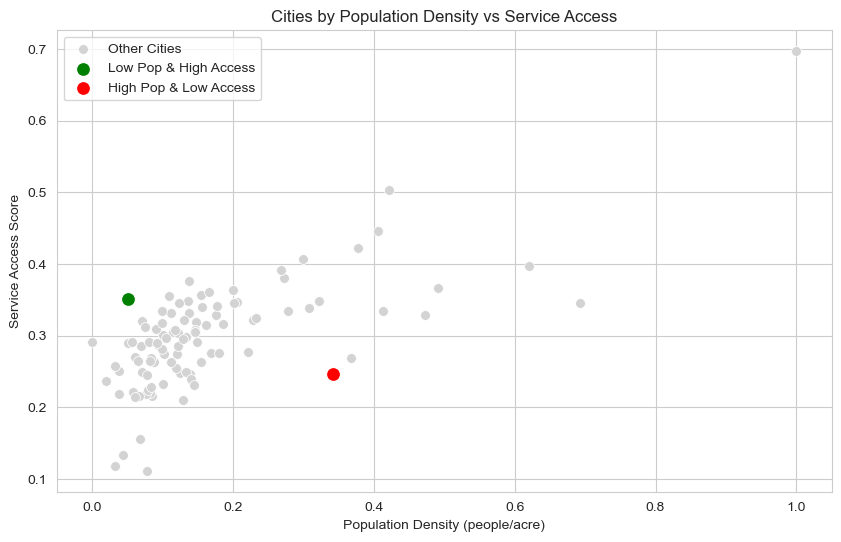

In [48]:
# Defining thresholds for "high" and "low"
pop_density_high = df['City_Population_Stats_density__people_acre_'].quantile(0.75)  # top 25%
pop_density_low = df['City_Population_Stats_density__people_acre_'].quantile(0.25)   # bottom 25%
access_score_high = df['ServiceAccessScore'].quantile(0.75)  # top 25%
access_score_low = df['ServiceAccessScore'].quantile(0.25)   # bottom 25%

# --- 1. Low population density & high service access ---
low_pop_high_access = df[(df['City_Population_Stats_density__people_acre_'] <= pop_density_low) &
                         (df['ServiceAccessScore'] >= access_score_high)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]
print("Cities with Low Population Density & High Service Access:")
print(low_pop_high_access)

# --- 2. High population density & low service access ---
high_pop_low_access = df[(df['City_Population_Stats_density__people_acre_'] >= pop_density_high) &
                         (df['ServiceAccessScore'] <= access_score_low)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]
print("\nCities with High Population Density & Low Service Access:")
print(high_pop_low_access)

#  visualizing these categories on scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=df, color='lightgrey', s=50, label='Other Cities')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=low_pop_high_access, color='green', s=100, label='Low Pop & High Access')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=high_pop_low_access, color='red', s=100, label='High Pop & Low Access')
plt.title("Cities by Population Density vs Service Access")
plt.xlabel("Population Density (people/acre)")
plt.ylabel("Service Access Score")
plt.legend()
plt.show()


### Interpretations: Service Access vs Population Density

1. **Low Population Density & High Service Access**  
   -  Honolulu
   - Honolulu stands out with a **low population density (~0.052 people/acre)** but a **relatively high service access score (0.351)**.  
   - This suggests that even in less densely populated areas, it is possible to maintain **strong accessibility to services** through thoughtful urban planning, zoning policies, and investment in distributed infrastructure.  
   - Honolulu’s case challenges the assumption that density is always a prerequisite for accessibility. Instead, it highlights how **strategic placement of amenities, transit options, and public services** can compensate for lower density.  
   - **Takeaway:** Low-density cities can still achieve high accessibility when infrastructure is well-planned, ensuring equitable service delivery without relying solely on compact urban form.

2. **High Population Density & Low Service Access**  
   -  Hialeah  
   - Hialeah illustrates the opposite scenario: **very high density but low service access**.  
   - This imbalance signals that infrastructure and services may not be keeping up with the needs of a growing and compact population.  
   - Residents in such cities may face challenges like **overcrowded public transit, insufficient walkable spaces, or limited distribution of amenities** relative to the number of people.  
   - High density, while often celebrated for enabling walkability and efficient public transit, can also **magnify accessibility problems if not paired with proportional service investment**.  
   - **Takeaway:** Density on its own does not guarantee accessibility—services must expand alongside population growth to avoid congestion, inequity, and urban stress.

3. **Low Population Density & Low Service Access**  
   - Many suburban or exurban cities fall into this category, where both density and accessibility are low.  
   - In such areas, residents often rely heavily on private vehicles, as public transit and walkability are minimal.  
   - While these places may not face immediate infrastructure strain due to lower population levels, they can perpetuate **car dependence, limited inclusivity, and higher environmental costs**.  
   - **Policy lesson:** Targeted investments in **transit corridors, bike infrastructure, and distributed amenities** can gradually improve accessibility even without large density increases.

4. **High Population Density & High Service Access**  
   - The “ideal” quadrant is occupied by cities that combine **dense populations with strong service access**.  
   - These cities successfully leverage density to support **robust transit networks, walkability, and amenity-rich neighborhoods**, reflecting the principles of the **15-minute city**.  
   - They represent urban environments where density translates into convenience, reduced car dependence, and equitable service coverage.  
   - **Policy lesson:** Maintaining this balance requires **continuous reinvestment** as populations grow, ensuring infrastructure scales proportionally.

---

### Overall Insight
- The analysis reveals that **population density and service access are not linearly correlated**.  
- While density often provides opportunities for greater accessibility, it can also highlight weaknesses if services fail to keep pace. Conversely, low-density areas can outperform expectations when **planning and infrastructure distribution are effective**.  
- For policymakers:  
  - **High-density, low-access cities** should be prioritized for service expansion to prevent congestion, inequity, and poor quality of life.  
  - **Low-density, high-access cities** provide valuable case studies in **distributed planning** and **efficient infrastructure deployment**.  
  - **Low-density, low-access areas** should focus on **multi-modal transport options** and incremental infrastructure investment to reduce car dependence.  
  - **High-density, high-access cities** should be safeguarded through **sustainable scaling** of services as populations continue to grow.  

Ultimately, this analysis underscores the importance of **planning beyond density metrics**. Accessibility depends not just on how many people live in a space, but on how effectively urban design and infrastructure allow those people to reach essential services.


# All four categories 

In [46]:
# --- Thresholds (quartiles) ---
pop_density_high = df['City_Population_Stats_density__people_acre_'].quantile(0.75)
pop_density_low = df['City_Population_Stats_density__people_acre_'].quantile(0.25)
access_score_high = df['ServiceAccessScore'].quantile(0.75)
access_score_low = df['ServiceAccessScore'].quantile(0.25)

# --- Quadrants ---
# 1. Low population density & high service access
low_pop_high_access = df[(df['City_Population_Stats_density__people_acre_'] <= pop_density_low) &
                         (df['ServiceAccessScore'] >= access_score_high)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]

# 2. High population density & low service access
high_pop_low_access = df[(df['City_Population_Stats_density__people_acre_'] >= pop_density_high) &
                         (df['ServiceAccessScore'] <= access_score_low)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]

# 3. High population density & high service access
high_pop_high_access = df[(df['City_Population_Stats_density__people_acre_'] >= pop_density_high) &
                          (df['ServiceAccessScore'] >= access_score_high)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]

# 4. Low population density & low service access
low_pop_low_access = df[(df['City_Population_Stats_density__people_acre_'] <= pop_density_low) &
                        (df['ServiceAccessScore'] <= access_score_low)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]

# --- Print results ---
print("Cities with Low Population Density & High Service Access:\n", low_pop_high_access, "\n")
print("Cities with High Population Density & Low Service Access:\n", high_pop_low_access, "\n")
print("Cities with High Population Density & High Service Access:\n", high_pop_high_access, "\n")
print("Cities with Low Population Density & Low Service Access:\n", low_pop_low_access, "\n")



Cities with Low Population Density & High Service Access:
         City  City_Population_Stats_density__people_acre_  ServiceAccessScore
85  Honolulu                                     0.051574            0.351398 

Cities with High Population Density & Low Service Access:
        City  City_Population_Stats_density__people_acre_  ServiceAccessScore
37  Hialeah                                     0.341678            0.246954 

Cities with High Population Density & High Service Access:
                 City  City_Population_Stats_density__people_acre_  \
0        Los Angeles                                     0.273168   
3      San Francisco                                     0.620576   
6         Long Beach                                     0.307476   
17           Chicago                                     0.422205   
18           Seattle                                     0.299611   
21          New York                                     1.000000   
33             Miami     

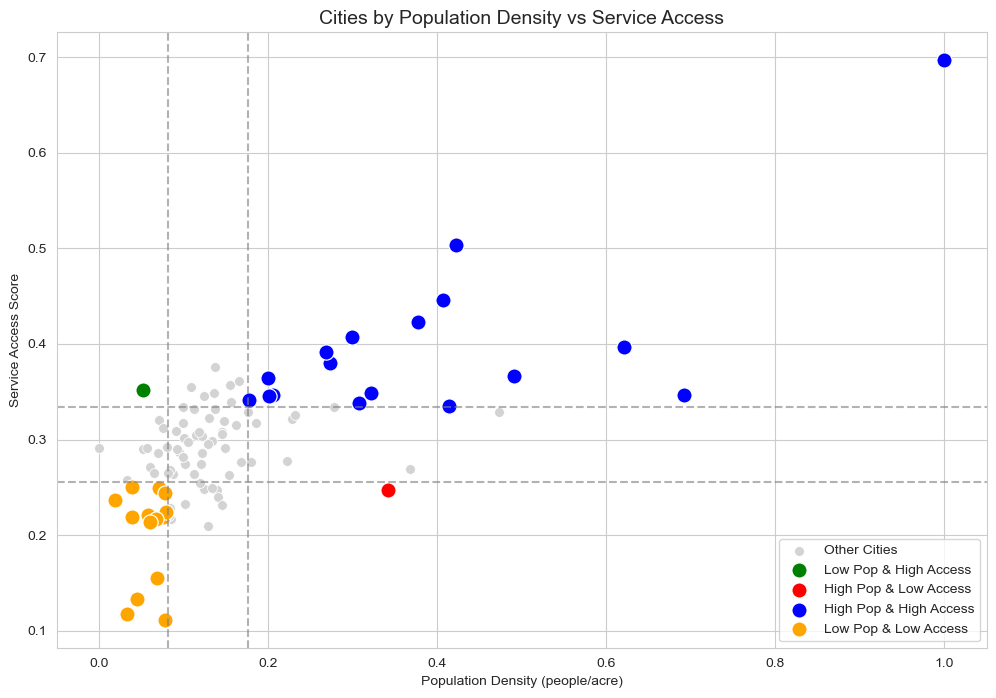

In [47]:
# --- Visualization ---
plt.figure(figsize=(12, 8))

# Base scatter (all cities)
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=df, color='lightgrey', s=50, label='Other Cities')

# Highlight quadrants
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=low_pop_high_access, color='green', s=120, label='Low Pop & High Access')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=high_pop_low_access, color='red', s=120, label='High Pop & Low Access')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=high_pop_high_access, color='blue', s=120, label='High Pop & High Access')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=low_pop_low_access, color='orange', s=120, label='Low Pop & Low Access')

# Add threshold lines (to visually divide quadrants)
plt.axvline(x=pop_density_low, color='grey', linestyle='--', alpha=0.6)
plt.axvline(x=pop_density_high, color='grey', linestyle='--', alpha=0.6)
plt.axhline(y=access_score_low, color='grey', linestyle='--', alpha=0.6)
plt.axhline(y=access_score_high, color='grey', linestyle='--', alpha=0.6)

# Labels & title
plt.title("Cities by Population Density vs Service Access", fontsize=14)
plt.xlabel("Population Density (people/acre)")
plt.ylabel("Service Access Score")
plt.legend()
plt.show()

### Quadrant Interpretations: Service Access vs Population Density

1. **High Density & High Service Access**  
   - Cities in this quadrant represent the **ideal balance of urban form**: dense populations supported by strong infrastructure and accessibility.  
   - Residents in these cities typically enjoy **shorter commutes, better public transit coverage, and walkable neighborhoods**.  
   - These environments embody the vision of the **15-minute city**, where most essential services are within reach.  
   - **Policy takeaway:** These cities provide blueprints for integrating density with accessibility. To maintain this balance, continuous reinvestment is required as population grows.

2. **High Density & Low Service Access**  
   - This quadrant reveals cities under **infrastructure strain**.  
   - Despite having large populations in compact areas, these cities lack adequate transit, walkability, or distributed amenities.  
   - The result is **congestion, inequitable service distribution, and reliance on private vehicles** even in dense settings.  
   - Example: Hialeah highlights how density without investment can worsen accessibility gaps.  
   - **Policy takeaway:** Prioritize these cities for **targeted service expansion**, ensuring that density translates into livability instead of stress.

3. **Low Density & High Service Access**  
   - These cities show that **density is not the sole driver of accessibility**.  
   - Example: Honolulu demonstrates how even with a sparse population distribution, effective **infrastructure planning and service distribution** can deliver strong accessibility outcomes.  
   - Such cities often succeed through **well-managed transit corridors, strategic placement of services, and efficient governance**.  
   - **Policy takeaway:** Planners can draw lessons from these cities to design **equitable, service-rich environments** in low-density contexts.

4. **Low Density & Low Service Access**  
   - Cities here face a **double disadvantage**: limited populations spread over large areas and insufficient services.  
   - These areas often exhibit **car dependency, low walkability, and limited transit coverage**, contributing to exclusion for non-drivers.  
   - While infrastructure strain may not be immediate, long-term sustainability and equity issues persist.  
   - **Policy takeaway:** Incremental improvements, such as **expanding transit corridors, building mixed-use hubs, and adding bike-friendly infrastructure**, can gradually raise accessibility without requiring major density shifts.

---

### Overall Insight
- Unlike population growth, where demand clearly pressures service access, the **density–access relationship is more nuanced**.  
- High density does not guarantee high accessibility, and low density does not automatically result in poor access.  
- The key determinant is **how effectively infrastructure and services are planned and scaled** relative to population distribution.  
- By mapping cities into these four quadrants, planners can identify:  
  - **Models of success** (high density & high access; low density & high access).  
  - **Warning signs** (high density & low access; low density & low access).  
- Ultimately, accessibility must be viewed as a **product of both demographic factors and intentional policy choices**, not density alone.  


# Final Results

## Overview
The analyses explored urban accessibility across U.S. cities using **Walk Score, Transit Score, Bike Score, Service Access Score, and Population Density**.  
Multiple dimensions were compared to evaluate how well cities balance mobility infrastructure and service distribution.  
Below are the key findings across the analyses.

---

## 1. Distribution of Mobility Scores
- **Walk Score** tends to be higher on average compared to Transit and Bike Scores, suggesting that most U.S. cities are more walkable than they are transit- or bike-friendly.  
- **Transit Scores** were more skewed, with only a few cities showing strong public transportation systems (e.g., New York, San Francisco).  
- **Bike Scores** showed moderate variation, indicating that biking infrastructure is still underdeveloped in many regions.  

**Key Insight:** While walking is relatively accessible, sustainable modes like transit and biking remain unevenly distributed across cities.

---

## 2. Service Access vs Population Density
- **Honolulu** emerged as a city with **low population density but high service accessibility**, highlighting the impact of efficient urban planning and equitable service distribution.  
- **Hialeah**, by contrast, showed **high density but low service accessibility**, suggesting that infrastructure may be strained under rapid urban growth.  

When dividing cities into quadrants:  
- **High Density & High Access** → Large cities with strong infrastructure and demand (e.g., New York).  
- **High Density & Low Access** → Urban areas struggling to meet resident needs.  
- **Low Density & High Access** → Well-planned but less dense regions (e.g., Honolulu).  
- **Low Density & Low Access** → Rural-like areas with limited infrastructure.  

**Key Insight:** Population density alone does not guarantee service accessibility — governance and planning quality are critical factors.

---

## 3. Walk, Transit, and Bike Score Relationships
- Cities with **higher Walk Scores** often also had **higher Transit and Bike Scores**, but the relationship was not perfectly linear.  
- Some cities (e.g., **Portland, Minneapolis**) showed strong bike infrastructure despite only moderate transit networks.  

**Key Insight:** Accessibility is multi-modal — strong performance in one area (e.g., biking) does not ensure equal performance in others (e.g., transit).

---

## 4. Equity of Service Distribution
- Quartile-based analysis showed that **top 25% cities by Service Access Score are not always the most densely populated.**  
- This suggests that **policy choices and targeted infrastructure investments matter more than just city size.**  
- Cities in the bottom quartile highlight the need for corrective interventions in resource allocation.  

---

## Overall Conclusion
- **Walkability** is relatively stronger across U.S. cities, but **transit and biking infrastructures lag significantly.**  
- **Service accessibility does not strongly correlate with population density**, meaning cities can succeed (or fail) in service delivery regardless of size.  
- Best practices can be drawn from:  
  - **Honolulu** (efficient planning with low density).  
  - **New York** (dense yet highly accessible).  

**Policy Implication:** To improve urban equity, planners should prioritize **targeted investments in underserved high-density cities** while continuing to expand **multi-modal accessibility** in growing urban regions.

---

# Discussion and Policy Recommendations

## 1. Service Access Beyond Density
- **Finding:** Population density alone is not a reliable predictor of service access.  
- **Example:** Honolulu (low density, high access) vs. Hialeah (high density, low access).  
- **Policy Recommendation:** Urban planners should not assume density will automatically improve accessibility — instead, **strategic service expansion** is needed.

---

## 2. Addressing High Growth Strain
- **Finding:** In rapidly growing cities, service access often lags behind population needs.  
- **Risk:** Overburdened infrastructure, inequitable access to transit, healthcare, and amenities.  
- **Policy Recommendation:** Prioritize **high-growth but low-access cities** for investments in **transit networks, housing, and public health infrastructure.**

---

## 3. Lessons from High Access Cities
- **Finding:** High service access cities highlight the importance of **governance, funding allocation, and planning.**  
- **Policy Recommendation:** Create **knowledge exchange programs** between cities — e.g., how Honolulu balances accessibility with low density, or how New York manages density with high accessibility.

---

## 4. Multi-Modal Accessibility Matters
- **Finding:** Walk, Transit, and Bike Scores are related but not perfectly aligned.  
- **Policy Recommendation:** Invest in **integrated, multi-modal infrastructure** that allows walking, biking, and transit to work together seamlessly.

---

## 5. Equity as a Central Goal
- **Finding:** Service access inequities disproportionately affect **low-income, elderly, and car-less populations.**  
- **Policy Recommendation:** Adopt an **equity-first planning approach** that ensures underserved communities are prioritized — not just high-growth cities.

---

## Final Takeaway
Urban service accessibility is not determined solely by city size or density.  
It reflects **quality of planning, policy priorities, and investment strategies.**  
By learning from successful cities and addressing gaps in underserved regions, policymakers can build **more equitable, resilient, and livable urban environments.**

---

# Limitations and Future Research

## 1. Data Availability and Coverage
- Reliance on existing city-level data may introduce **biases** in comparisons.  
- **Future Work:** Expand to include **more cities, suburbs, and rural regions** for broader perspective.

---

## 2. Static vs. Dynamic View
- Current study is a **snapshot in time**; cities evolve with migration and projects.  
- **Future Work:** Use **time-series data** to track changes in accessibility over time.

---

## 3. Limited Scope of Service Access Definition
- Service Access Score may not capture **all dimensions** (e.g., healthcare, education, green spaces).  
- **Future Work:** Incorporate **public health, environmental, and socio-economic indicators.**

---

## 4. Correlation vs. Causation
- Results highlight **correlations** but not causation.  
- **Future Work:** Apply **causal inference, econometric models, or machine learning** to identify drivers of service access.

---

## Final Note
This study provides a **foundation** for understanding how **walkability, transit, biking, density, and planning** interact with service access.  
While limitations exist, the findings set the stage for **deeper, more data-rich, and equity-focused research** to guide future urban planning.



In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import warnings
import os
from datetime import datetime, timedelta
from sklearn import preprocessing
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [2]:
import requests

# File ID from Google Drive link
file_id = "1nwj3ciSo8gLaozJ7RcJv6Go6WpLReV3P"
url = f"https://drive.google.com/uc?id={"1nwj3ciSo8gLaozJ7RcJv6Go6WpLReV3P"}"

# Download the file
response = requests.get(url)
with open("urban_connectivity.csv", "wb") as f:
    f.write(response.content)

print("Download complete!")
# Read CSV into DataFrame
try:
    df = pd.read_csv("urban_connectivity.csv")
    print("✅ CSV loaded successfully!")
    print(df.head())  # Show first 5 rows
except Exception as e:
    print("❌ Error reading CSV:", e)

Download complete!
✅ CSV loaded successfully!
   Unnamed: 0         Place_name           City State  Walk Score  \
0           0    Los Angeles, CA    Los Angeles    CA        68.6   
1           1      San Diego, CA      San Diego    CA        53.3   
2           2       San Jose, CA       San Jose    CA        50.5   
3           3  San Francisco, CA  San Francisco    CA        88.7   
4           4         Fresno, CA         Fresno    CA        46.6   

   Transit Score  Bike Score  Population_2021  Population_2022_Census  \
0           52.9        58.7          3792621               3903648.0   
1           37.3        43.0          1307402               1394592.0   
2           40.1        61.5           945942               1018924.0   
3           77.1        72.3           805235                883822.0   
4           33.1        58.1           494665                547499.0   

   City_Population_Stats_adjusted_land_area__acres_  ...  \
0                                       

In [3]:
print(df.shape)
df.head()

(102, 79)


Unnamed: 0         Place_name           City State  Walk Score  \
0           0    Los Angeles, CA    Los Angeles    CA        68.6   
1           1      San Diego, CA      San Diego    CA        53.3   
2           2       San Jose, CA       San Jose    CA        50.5   
3           3  San Francisco, CA  San Francisco    CA        88.7   
4           4         Fresno, CA         Fresno    CA        46.6   

   Transit Score  Bike Score  Population_2021  Population_2022_Census  \
0           52.9        58.7          3792621               3903648.0   
1           37.3        43.0          1307402               1394592.0   
2           40.1        61.5           945942               1018924.0   
3           77.1        72.3           805235                883822.0   
4           33.1        58.1           494665                547499.0   

   City_Population_Stats_adjusted_land_area__acres_  ...  \
0                                          296527.0  ...   
1                                          206371.0  ...   
2                                          112666.0  ...   
3                                           29892.0  ...   
4                                           72537.0  ...   

   Number_of_Splashpads Number_of_Swimming_pools  Number_of_Disc_Golf_Courses  \
0                  17.0                     64.0                          4.0   
1                   4.0                     14.0                          3.0   
2                   2.0                      6.0                          1.0   
3                  11.0                     12.0                          2.0   
4                   7.0                      9.0                          1.0   

   Trail_Miles_Improved_Trails Trail_Miles_Nature_trails  \
0                        33.00                      33.0   
1                        66.20                     292.8   
2                        75.60                      37.9   
3                        51.35                      34.0   
4                         2.00                       0.0   

   Number_of_Tracks_At_Park_Sites  Number_of_Tracks_At_community_schoolyards  \
0                             1.0                                        0.0   
1                             0.0                                       50.0   
2                             0.0                                        0.0   
3                             3.0                                        0.0   
4                            10.0                                        0.0   

   Number_of_Exercise_Zones  Miles_of_car_free_roadways_in_parks  \
0                     133.0                                  0.0   
1                       8.0                                  0.0   
2                      42.0                                  0.0   
3                       5.0                                  7.0   
4                      17.0                                  0.0   

   Permanent_car_free_roadways  
0                          0.0  
1                          0.0  
2                          0.0  
3                          4.0  
4                          0.0  

[5 rows x 79 columns]

# Handling missing values

In [4]:
#  Checking columns with missing or blank values
# Identifying columns that have NaN or empty string values
missing_cols = df.columns[df.isna().any()].tolist()
blank_cols = df.columns[(df == '').any()].tolist()

print("Columns with NaN values:", missing_cols)
print("Columns with blank values:", blank_cols)


Columns with NaN values: ['Transit Score', 'Parkland_Stats_by_City_total_acres', 'Parkland_Stats_by_City__natural', 'Parkland_Stats_by_City__designed', 'Parkland_Stats_by_City_total_park_units', 'Parkland_Stats_by_City_parks_as__city_area', 'Walkable_Park_Access_all_residents', 'Walkable_Park_Access_black', 'Walkable_Park_Access_hispanic_latinx', 'Walkable_Park_Access_asian', 'Walkable_Park_Access_other_race', 'Walkable_Park_Access_multiple_races', 'Walkable_Park_Access_pacific_islander', 'Walkable_Park_Access_american_indian_alaska_native', 'Walkable_Park_Access_all_people_of_color', 'Walkable_Park_Access_white', 'Walkable_Park_Access_low__75_city_income_', 'Walkable_Park_Access_middle', 'Walkable_Park_Access_high__125_city_median_income_', 'Walkable_Park_Access_children__u19_', 'Walkable_Park_Access_adults__19_64_', 'Walkable_Park_Access_seniors__65_', 'Distribution_of_Park_Space_low_income', 'Distribution_of_Park_Space_high_income', 'Distribution_of_Park_Space_black', 'Distribution_

In [5]:

#  Filling missing or blank values with 0.0
df[missing_cols] = df[missing_cols].fillna(0.0)
df[blank_cols] = df[blank_cols].replace('', 0.0)

# Verifying that there are no more missing or blank values
print(df[missing_cols + blank_cols].isna().sum())
print((df[missing_cols + blank_cols] == '').sum())


Transit Score                                               0
Parkland_Stats_by_City_total_acres                          0
Parkland_Stats_by_City__natural                             0
Parkland_Stats_by_City__designed                            0
Parkland_Stats_by_City_total_park_units                     0
Parkland_Stats_by_City_parks_as__city_area                  0
Walkable_Park_Access_all_residents                          0
Walkable_Park_Access_black                                  0
Walkable_Park_Access_hispanic_latinx                        0
Walkable_Park_Access_asian                                  0
Walkable_Park_Access_other_race                             0
Walkable_Park_Access_multiple_races                         0
Walkable_Park_Access_pacific_islander                       0
Walkable_Park_Access_american_indian_alaska_native          0
Walkable_Park_Access_all_people_of_color                    0
Walkable_Park_Access_white                                  0
Walkable


- Checked all key accessibility variables (walkability, transit, bike, parks, etc.) for missing values.
- **No missing values** were found in any of these columns.


In [6]:
# Dropping the unnamed column (commonly named 'Unnamed: 0')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]



### Normalization of Access Metrics

- Access indicators have different scales (e.g., Walk Score, population density).
- Min-Max scaling is applied to transform all access metrics onto a uniform 0–1 range.
- This ensures fair comparison and aggregation without any single metric dominating.


In [8]:

# Select all numeric columns
access_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Normalize only numeric columns
scaler = MinMaxScaler()
df[access_cols] = scaler.fit_transform(df[access_cols])

# Check normalized values
df[access_cols].head()


Walk Score  Transit Score  Bike Score  Population_2021  \
0    0.701780       0.597065    0.539033         0.450241   
1    0.474777       0.420993    0.247212         0.138486   
2    0.433234       0.452596    0.591078         0.093143   
3    1.000000       0.870203    0.791822         0.075492   
4    0.375371       0.373589    0.527881         0.036533   

   Population_2022_Census  City_Population_Stats_adjusted_land_area__acres_  \
0                0.427450                                          0.266411   
1                0.136441                                          0.182809   
2                0.092870                                          0.095916   
3                0.077200                                          0.019159   
4                0.038193                                          0.058704   

   City_Population_Stats_density__people_acre_  \
0                                     0.273168   
1                                     0.137471   
2                                     0.185890   
3                                     0.620576   
4                                     0.154207   

   City_Population_Stats_2000_population  \
0                               0.453880   
1                               0.140967   
2                               0.099255   
3                               0.084422   
4                               0.040171   

   City_Population_Stats_population_growth  \
0                                 0.206989   
1                                 0.251699   
2                                 0.251641   
3                                 0.250566   
4                                 0.327512   

   Parkland_Stats_by_City_total_acres  ...  Number_of_Splashpads  \
0                            0.045454  ...              0.028571   
1                            0.046022  ...              0.006723   
2                            0.017459  ...              0.003361   
3                            0.007070  ...              0.018487   
4                            0.003933  ...              0.011765   

   Number_of_Swimming_pools  Number_of_Disc_Golf_Courses  \
0                  0.810127                     0.285714   
1                  0.177215                     0.214286   
2                  0.075949                     0.071429   
3                  0.151899                     0.142857   
4                  0.113924                     0.071429   

   Trail_Miles_Improved_Trails  Trail_Miles_Nature_trails  \
0                     0.020012                   0.093484   
1                     0.040144                   0.829462   
2                     0.045845                   0.107365   
3                     0.031139                   0.096317   
4                     0.001213                   0.000000   

   Number_of_Tracks_At_Park_Sites  Number_of_Tracks_At_community_schoolyards  \
0                        0.007092                                   0.000000   
1                        0.000000                                   0.320513   
2                        0.000000                                   0.000000   
3                        0.021277                                   0.000000   
4                        0.070922                                   0.000000   

   Number_of_Exercise_Zones  Miles_of_car_free_roadways_in_parks  \
0                  0.475000                             0.000000   
1                  0.028571                             0.000000   
2                  0.150000                             0.000000   
3                  0.017857                             0.120482   
4                  0.060714                             0.000000   

   Permanent_car_free_roadways  
0                     0.000195  
1                     0.000195  
2                     0.000195  
3                     0.078305  
4                     0.000195  

[5 rows x 73 columns]

### Observation after Normalization

- All access-related and city population metrics are now scaled between 0 and 1.
- Min-Max normalization ensures that indicators like Walk Score, Transit Score, and number of park amenities are comparable despite originally being on different scales.
- This step is essential for fair aggregation or computing composite indices without bias from larger-scale variables.
- The dataset is now ready for further analysis, such as ranking cities by accessibility or creating composite indices.


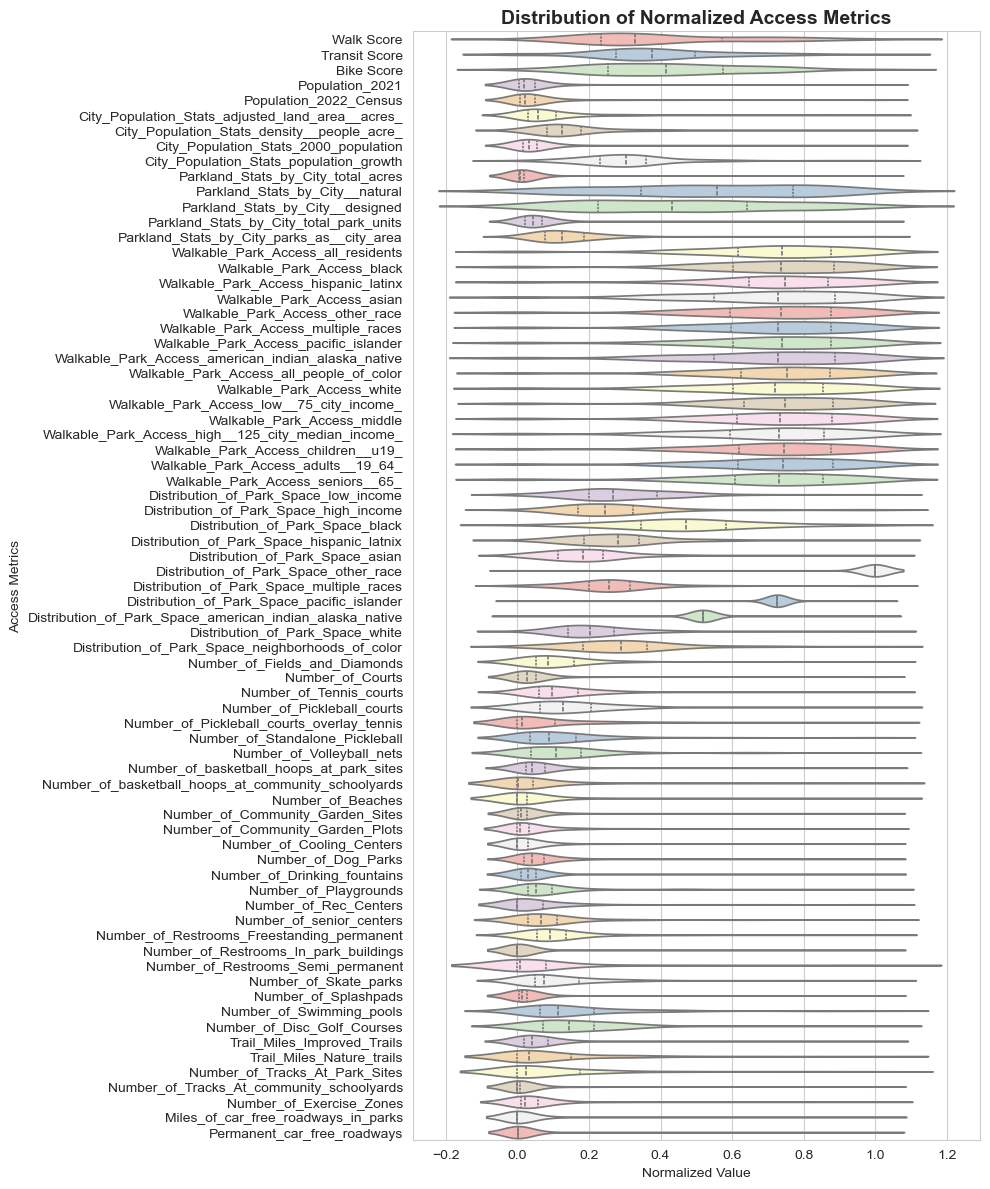

In [9]:
plt.figure(figsize=(10, 12))
sns.set_style("whitegrid")

sns.violinplot(data=df[access_cols], orient="h", palette="Pastel1", inner="quartile")
plt.title('Distribution of Normalized Access Metrics', fontsize=14, weight='bold')
plt.xlabel('Normalized Value')
plt.ylabel('Access Metrics')
plt.tight_layout()
plt.show()


# Composite Service Access Index  
- Aggregated normalized scores of walkability, transit, bike, and park access.  
- Calculated as a simple average to get an overall Service Access Score (0-1).  
- Higher score → better overall access; useful for ranking and comparing cities.  
- Provides a single metric for categorization, clustering, and equity analysis.  


In [10]:


# Calculate simple average of normalized access metrics
df['ServiceAccessScore'] = df[access_cols].mean(axis=1)


# Previewing top and bottom cities
top_cities = df[['City', 'ServiceAccessScore']].sort_values(by='ServiceAccessScore', ascending=False).head(10)
bottom_cities = df[['City', 'ServiceAccessScore']].sort_values(by='ServiceAccessScore', ascending=True).head(10)

print("Top 10 Cities by Service Access Score:")
print(top_cities)

print("\nBottom 10 Cities by Service Access Score:")
print(bottom_cities)


Top 10 Cities by Service Access Score:
                City  ServiceAccessScore
21          New York            0.696885
17           Chicago            0.503532
93      Philadelphia            0.446224
101  Washington D.C.            0.422598
18           Seattle            0.406991
3      San Francisco            0.397119
78       Minneapolis            0.392010
0        Los Angeles            0.379864
1          San Diego            0.376087
47            Boston            0.366960

Bottom 10 Cities by Service Access Score:
           City  ServiceAccessScore
82   Des Moines            0.110746
84    Lexington            0.117757
81    Nashville            0.133545
70    Charlotte            0.155317
29      Gilbert            0.209740
83   Louisville            0.213869
80      Memphis            0.216546
8   Bakersfield            0.216551
61       Laredo            0.218514
28   Scottsdale            0.218900


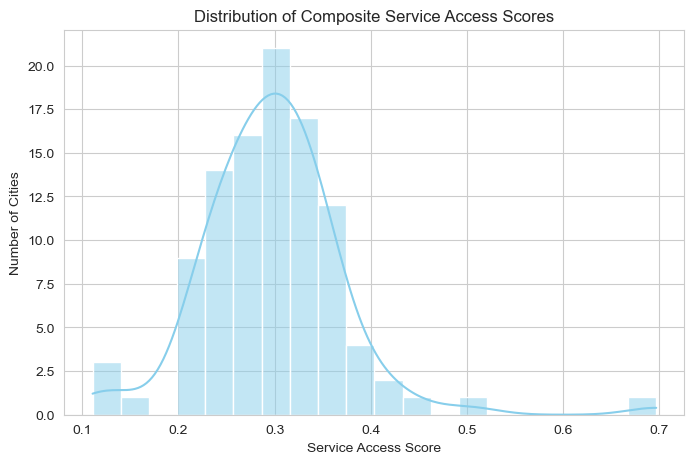

In [11]:

plt.figure(figsize=(8,5))
sns.histplot(df['ServiceAccessScore'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Composite Service Access Scores')
plt.xlabel('Service Access Score')
plt.ylabel('Number of Cities')
plt.show()

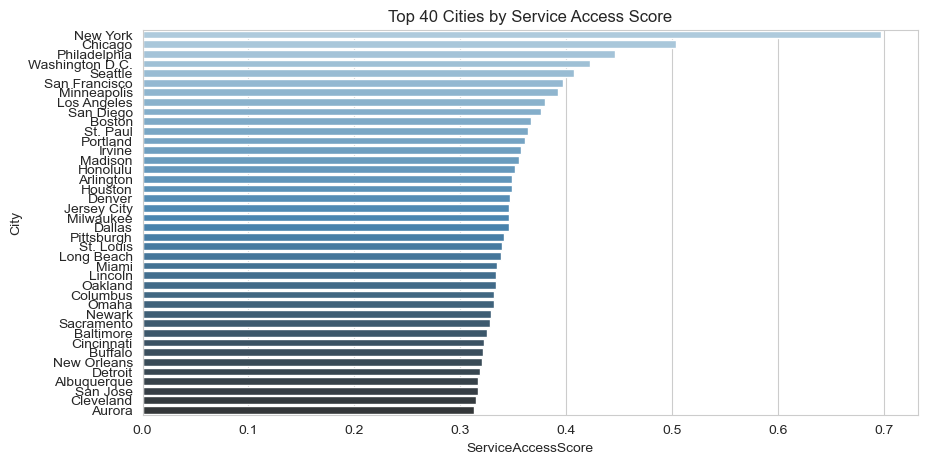

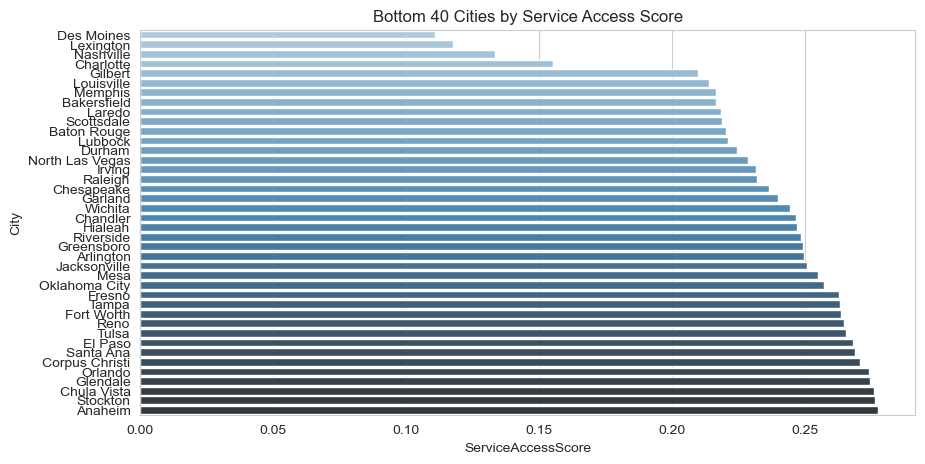

In [12]:
top_cities = df.nlargest(40, 'ServiceAccessScore')
bottom_cities = df.nsmallest(40, 'ServiceAccessScore')

plt.figure(figsize=(10,5))
sns.barplot(x='ServiceAccessScore', y='City', data=top_cities, palette='Blues_d')
plt.title('Top 40 Cities by Service Access Score')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x='ServiceAccessScore', y='City', data=bottom_cities, palette='Blues_d')
plt.title('Bottom 40 Cities by Service Access Score')
plt.show()

# Observations:
 - Cities with the highest scores have balanced access across walk, transit, bike, and parks.
 - Cities with lowest scores may lack one or more access dimensions.
 - The composite score allows easy ranking and comparison of urban service access.

# Categorization into Access Tiers & KMeans-based Access Tier
- Segment cities based on Service Access Score into 'Low', 'Medium', and 'High' access groups.
- Uses quantile-based binning (tertiles) for fair distribution across cities.
- Helps identify patterns and disparities in urban accessibility.


In [13]:
# Create access tiers using tertiles (3 equal groups)
df['Access_Tier'] = pd.qcut(df['ServiceAccessScore'], q=3, labels=['Low Access', 'Medium Access', 'High Access'])

# Check distribution of cities across tiers
df['Access_Tier'].value_counts()


Access_Tier
Low Access       34
Medium Access    34
High Access      34
Name: count, dtype: int64

- View Cities in Each Access Tier
- Helps identify which cities fall under 'Low', 'Medium', and 'High' access categories.
- Useful for policy targeting and comparative analysis.


In [14]:
# List cities by Access Tier
for tier in df['Access_Tier'].unique():
    print(f"\nCities in {tier}:")
    print(df[df['Access_Tier'] == tier]['City'].tolist())



Cities in High Access:
['Los Angeles', 'San Diego', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Irvine', 'Chicago', 'Seattle', 'Portland', 'New York', 'Buffalo', 'Miami', 'St. Louis', 'Arlington', 'Baltimore', 'Boston', 'Columbus', 'Cincinnati', 'Houston', 'Dallas', 'Denver', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Philadelphia', 'Pittsburgh', 'Omaha', 'Lincoln', 'Washington D.C.']

Cities in Medium Access:
['San Jose', 'Anaheim', 'Stockton', 'Chula Vista', 'Fremont', 'Detroit', 'Spokane', 'Phoenix', 'Tucson', 'Glendale', 'New Orleans', 'St. Petersburg', 'Orlando', 'Kansas City', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Richmond', 'Cleveland', 'Toledo', 'San Antonio', 'Austin', 'Corpus Christi', 'Plano', 'Colorado Springs', 'Aurora', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in Low Access:
['Fresno', 'Bakersfield', 'Santa Ana', 'Riverside',

In [15]:
# Creating a table showing cities grouped by Access Tier
tier_table = df.groupby('Access_Tier')['City'].apply(list).reset_index()
tier_table


Access_Tier                                               City
0     Low Access  [Fresno, Bakersfield, Santa Ana, Riverside, Me...
1  Medium Access  [San Jose, Anaheim, Stockton, Chula Vista, Fre...
2    High Access  [Los Angeles, San Diego, San Francisco, Sacram...

In [16]:
#Creating KMeans-based Access Tiers
kmeans = KMeans(n_clusters=3, random_state=42)
df['Access_Tier_KMeans'] = kmeans.fit_predict(df[['ServiceAccessScore']])

# Mapping numeric clusters to descriptive labels
cluster_mapping = {0: 'Low Access', 1: 'Medium Access', 2: 'High Access'}
df['Access_Tier_KMeans'] = df['Access_Tier_KMeans'].map(cluster_mapping)

# Inspecting cities in each KMeans-based Access Tier
for tier in df['Access_Tier_KMeans'].unique():
    print(f"\nCities in {tier}:")
    print(df[df['Access_Tier_KMeans'] == tier]['City'].tolist())


Cities in Low Access:
['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Fremont', 'Irvine', 'Detroit', 'Seattle', 'Spokane', 'Portland', 'Buffalo', 'Phoenix', 'Tucson', 'New Orleans', 'Miami', 'St. Petersburg', 'Kansas City', 'St. Louis', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Arlington', 'Richmond', 'Baltimore', 'Boston', 'Columbus', 'Cleveland', 'Cincinnati', 'Toledo', 'Houston', 'San Antonio', 'Dallas', 'Austin', 'Plano', 'Denver', 'Colorado Springs', 'Aurora', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Pittsburgh', 'Omaha', 'Lincoln', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in High Access:
['Fresno', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside', 'Stockton', 'Chula Vista', 'Mesa', 'Chandler', 'Glendale', 'Scottsdale', 'Gilbert', 'Baton Rouge', 'Jacksonville', 'Tampa', 'Orlando', 'Hialeah', 'Chesa

In [17]:
# Fiting KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Access_Tier_KMeans_Num'] = kmeans.fit_predict(df[['ServiceAccessScore']])

# Sorting clusters by their centroid to map to Low/Medium/High
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_clusters = cluster_centers.argsort()  # indices from lowest to highest
cluster_mapping = {sorted_clusters[0]: 'Low Access',
                   sorted_clusters[1]: 'Medium Access',
                   sorted_clusters[2]: 'High Access'}

# Mapping numeric cluster to descriptive label
df['Access_Tier_KMeans'] = df['Access_Tier_KMeans_Num'].map(cluster_mapping)

#  dropping the numeric helper column
df.drop('Access_Tier_KMeans_Num', axis=1, inplace=True)

# Checking cities in each tier
for tier in df['Access_Tier_KMeans'].unique():
    print(f"\nCities in {tier}:")
    print(df[df['Access_Tier_KMeans'] == tier]['City'].tolist())




Cities in Medium Access:
['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Fremont', 'Irvine', 'Detroit', 'Seattle', 'Spokane', 'Portland', 'Buffalo', 'Phoenix', 'Tucson', 'New Orleans', 'Miami', 'St. Petersburg', 'Kansas City', 'St. Louis', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Arlington', 'Richmond', 'Baltimore', 'Boston', 'Columbus', 'Cleveland', 'Cincinnati', 'Toledo', 'Houston', 'San Antonio', 'Dallas', 'Austin', 'Plano', 'Denver', 'Colorado Springs', 'Aurora', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Pittsburgh', 'Omaha', 'Lincoln', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in Low Access:
['Fresno', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside', 'Stockton', 'Chula Vista', 'Mesa', 'Chandler', 'Glendale', 'Scottsdale', 'Gilbert', 'Baton Rouge', 'Jacksonville', 'Tampa', 'Orlando', 'Hialeah', 'Che

Countplot of Access Tiers – shows number of cities in each tier:

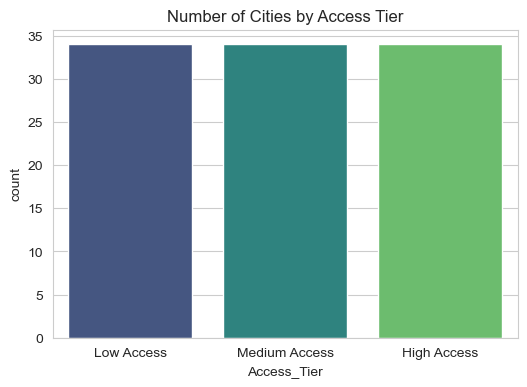


Cities in High Access:
['Los Angeles', 'San Diego', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Irvine', 'Chicago', 'Seattle', 'Portland', 'New York', 'Buffalo', 'Miami', 'St. Louis', 'Arlington', 'Baltimore', 'Boston', 'Columbus', 'Cincinnati', 'Houston', 'Dallas', 'Denver', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Philadelphia', 'Pittsburgh', 'Omaha', 'Lincoln', 'Washington D.C.']

Cities in Medium Access:
['San Jose', 'Anaheim', 'Stockton', 'Chula Vista', 'Fremont', 'Detroit', 'Spokane', 'Phoenix', 'Tucson', 'Glendale', 'New Orleans', 'St. Petersburg', 'Orlando', 'Kansas City', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Richmond', 'Cleveland', 'Toledo', 'San Antonio', 'Austin', 'Corpus Christi', 'Plano', 'Colorado Springs', 'Aurora', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in Low Access:
['Fresno', 'Bakersfield', 'Santa Ana', 'Riverside',

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Countplot of cities per Access Tier
plt.figure(figsize=(6,4))
sns.countplot(x='Access_Tier', data=df, palette='viridis')
plt.title('Number of Cities by Access Tier')
plt.show()

# Display the cities in each tier
for tier in df['Access_Tier'].unique():
    cities_in_tier = df[df['Access_Tier'] == tier]['City'].tolist()
    print(f"\nCities in {tier}:")
    print(cities_in_tier)


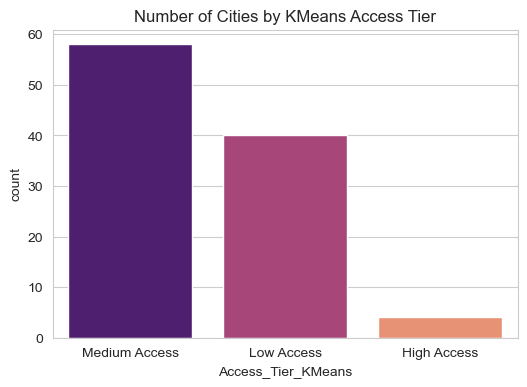


Cities in Medium Access:
['Los Angeles', 'San Diego', 'San Jose', 'San Francisco', 'Sacramento', 'Long Beach', 'Oakland', 'Fremont', 'Irvine', 'Detroit', 'Seattle', 'Spokane', 'Portland', 'Buffalo', 'Phoenix', 'Tucson', 'New Orleans', 'Miami', 'St. Petersburg', 'Kansas City', 'St. Louis', 'Atlanta', 'Virginia Beach', 'Norfolk', 'Arlington', 'Richmond', 'Baltimore', 'Boston', 'Columbus', 'Cleveland', 'Cincinnati', 'Toledo', 'Houston', 'San Antonio', 'Dallas', 'Austin', 'Plano', 'Denver', 'Colorado Springs', 'Aurora', 'Milwaukee', 'Madison', 'Newark', 'Jersey City', 'Minneapolis', 'St. Paul', 'Honolulu', 'Las Vegas', 'Las Vegas', 'Henderson', 'North Las Vegas', 'North Las Vegas', 'Pittsburgh', 'Omaha', 'Lincoln', 'Anchorage', 'Boise City', 'Albuquerque']

Cities in Low Access:
['Fresno', 'Bakersfield', 'Anaheim', 'Santa Ana', 'Riverside', 'Stockton', 'Chula Vista', 'Mesa', 'Chandler', 'Glendale', 'Scottsdale', 'Gilbert', 'Baton Rouge', 'Jacksonville', 'Tampa', 'Orlando', 'Hialeah', 'Che

In [19]:
# Countplot for KMeans-based Access Tiers
plt.figure(figsize=(6,4))
sns.countplot(x='Access_Tier_KMeans', data=df, palette='magma')
plt.title('Number of Cities by KMeans Access Tier')
plt.show()

# Display the cities in each KMeans tier
for tier in df['Access_Tier_KMeans'].unique():
    cities_in_tier = df[df['Access_Tier_KMeans'] == tier]['City'].tolist()
    print(f"\nCities in {tier}:")
    print(cities_in_tier)


 KMeans-Based Access Tier Distribution
- The plot shows the number of cities in each KMeans-derived access tier.
- The list shows which cities belong to 'Low Access', 'Medium Access', and 'High Access' clusters.
- This clustering may reveal patterns not captured by simple quantile binning.

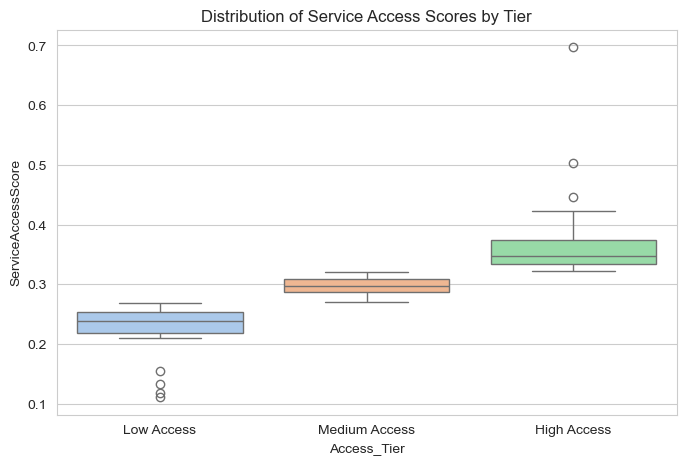

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Access_Tier', y='ServiceAccessScore', data=df, palette='pastel')
plt.title('Distribution of Service Access Scores by Tier')
plt.show()

Access Tier Distribution
- The plot shows how many cities fall into each access tier.
- The list below shows exactly which cities are in 'Low', 'Medium', and 'High Access'.
- This helps identify both the leaders and laggards in urban service access.

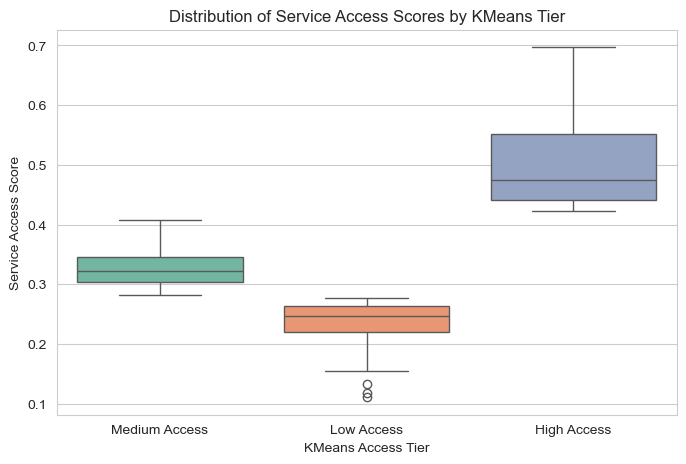

In [21]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Access_Tier_KMeans', y='ServiceAccessScore', data=df, palette='Set2')
plt.title('Distribution of Service Access Scores by KMeans Tier')
plt.xlabel('KMeans Access Tier')
plt.ylabel('Service Access Score')
plt.show()

Service Access Score Distribution by KMeans Tier
- Shows how the composite Service Access Scores vary within each KMeans cluster.
- Helps assess the separation and overlap of scores across 'Low', 'Medium', and 'High' access tiers.
- Useful for evaluating clustering effectiveness and identifying outlier cities.


In [22]:
# Creating a comparison table for KMeans-based Access Tier and  Access Tier
tier_comparison = df[['City', 'ServiceAccessScore', 'Access_Tier_KMeans', 'Access_Tier']]

# Display the table
tier_comparison.head(20)  # showing top 20 for a quick view

City  ServiceAccessScore Access_Tier_KMeans    Access_Tier
0     Los Angeles            0.379864      Medium Access    High Access
1       San Diego            0.376087      Medium Access    High Access
2        San Jose            0.316959      Medium Access  Medium Access
3   San Francisco            0.397119      Medium Access    High Access
4          Fresno            0.262992         Low Access     Low Access
5      Sacramento            0.328384      Medium Access    High Access
6      Long Beach            0.338363      Medium Access    High Access
7         Oakland            0.333984      Medium Access    High Access
8     Bakersfield            0.216551         Low Access     Low Access
9         Anaheim            0.277639         Low Access  Medium Access
10      Santa Ana            0.268752         Low Access     Low Access
11      Riverside            0.248562         Low Access     Low Access
12       Stockton            0.276333         Low Access  Medium Access
13    Chula Vista            0.276082         Low Access  Medium Access
14        Fremont            0.287414      Medium Access  Medium Access
15         Irvine            0.357009      Medium Access    High Access
16        Detroit            0.318985      Medium Access  Medium Access
17        Chicago            0.503532        High Access    High Access
18        Seattle            0.406991      Medium Access    High Access
19        Spokane            0.305169      Medium Access  Medium Access

In [23]:
# Creating  a column to indicate if KMeans and quantile tiers match
tier_comparison['Tier_Match'] = tier_comparison['Access_Tier_KMeans'] == tier_comparison['Access_Tier']

# Viewing the table with a quick indication of agreement
tier_comparison.head(20)  # Top 20 rows

#see only cities where tiers match
matching_cities = tier_comparison[tier_comparison['Tier_Match'] == True]
print("Cities where KMeans and Quantile Tiers match:")
print(matching_cities[['City', 'Access_Tier_KMeans', 'Access_Tier']])

# see only cities where tiers differ
non_matching_cities = tier_comparison[tier_comparison['Tier_Match'] == False]
print("\nCities where KMeans and Quantile Tiers differ:")
print(non_matching_cities[['City', 'Access_Tier_KMeans', 'Access_Tier']])


Cities where KMeans and Quantile Tiers match:
                City Access_Tier_KMeans    Access_Tier
2           San Jose      Medium Access  Medium Access
4             Fresno         Low Access     Low Access
8        Bakersfield         Low Access     Low Access
10         Santa Ana         Low Access     Low Access
11         Riverside         Low Access     Low Access
..               ...                ...            ...
97           Wichita         Low Access     Low Access
98         Anchorage      Medium Access  Medium Access
99        Boise City      Medium Access  Medium Access
100      Albuquerque      Medium Access  Medium Access
101  Washington D.C.        High Access    High Access

[66 rows x 3 columns]

Cities where KMeans and Quantile Tiers differ:
              City Access_Tier_KMeans    Access_Tier
0      Los Angeles      Medium Access    High Access
1        San Diego      Medium Access    High Access
3    San Francisco      Medium Access    High Access
5       Sac

# Walk, Transit, Bike Scores

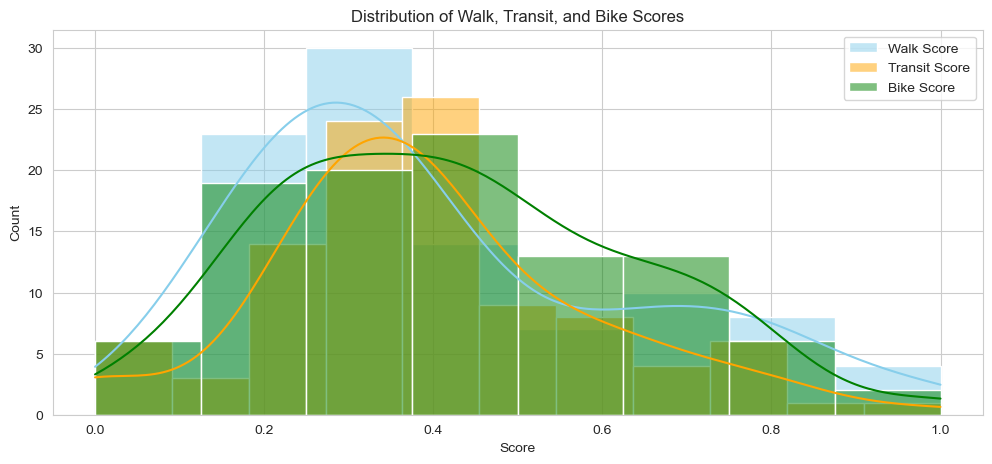

In [24]:
plt.figure(figsize=(12,5))
sns.histplot(df['Walk Score'], kde=True, color='skyblue', label='Walk Score')
sns.histplot(df['Transit Score'], kde=True, color='orange', label='Transit Score')
sns.histplot(df['Bike Score'], kde=True, color='green', label='Bike Score')
plt.title("Distribution of Walk, Transit, and Bike Scores")
plt.xlabel("Score")
plt.legend()
plt.show()

# Results

## Distribution of Walk, Transit, and Bike Scores

The following histogram shows the distribution of **Walk Score, Transit Score, and Bike Score** across all cities in our dataset

# Interpretation

- Walk Score Distribution:

    - Most cities cluster around moderate Walk Scores, indicating that while some cities are highly walkable, a large portion of cities have room for improvement in pedestrian infrastructure.

    - A few cities show extremely high Walk Scores, representing well-planned urban centers with dense amenities and pedestrian-friendly environments.

- Transit Score Distribution:

    - Transit Scores display a wider spread compared to Walk Scores, suggesting variability in public transit availability across cities.

    - Some cities have very low Transit Scores, highlighting areas where residents may be highly car-dependent or underserved by public transport.

- Bike Score Distribution:

    - Bike Scores are generally lower than Walk Scores, reflecting the limited availability of cycling infrastructure in many cities.

    - Peaks in the distribution correspond to cities with strong bike networks and safety measures for cyclists.

- Overall Insight:

    - The distributions indicate that walkability is generally stronger than bike infrastructure, but transit access varies widely, which aligns with urban planning trends where pedestrian-friendly design often precedes investments in cycling or transit infrastructure.

    - These patterns help explain disparities in the Composite Service Access Index, where cities with balanced scores across Walk, Transit, and Bike tend to rank higher in overall service access.


# Scatter plot connecting Service Access Score and Walk/Transit/Bike Scores

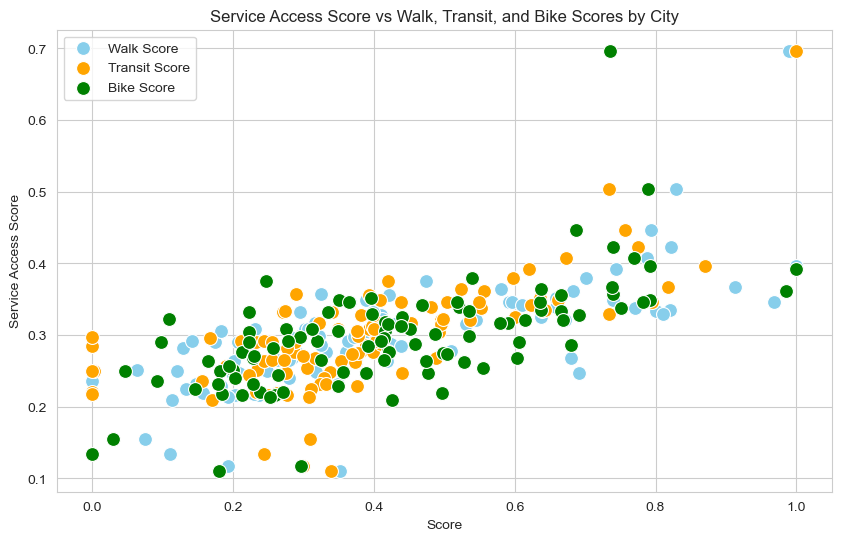

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=df, color='skyblue', s=100, label='Walk Score')
sns.scatterplot(x='Transit Score', y='ServiceAccessScore', data=df, color='orange', s=100, label='Transit Score')
sns.scatterplot(x='Bike Score', y='ServiceAccessScore', data=df, color='green', s=100, label='Bike Score')
plt.title("Service Access Score vs Walk, Transit, and Bike Scores by City")
plt.xlabel("Score")
plt.ylabel("Service Access Score")
plt.legend()
plt.show()

 # Walk Score vs Service Access

In [26]:
# Top 10 cities with high Walk Score and high Service Access
top_walk_access = df.sort_values(by=['Walk Score', 'ServiceAccessScore'], ascending=False).head(10)
print("Top 10 Cities: High Walk Score & High Service Access")
print(top_walk_access[['City', 'Walk Score', 'ServiceAccessScore']])

# Bottom 10 cities with low Walk Score and low Service Access
bottom_walk_access = df.sort_values(by=['Walk Score', 'ServiceAccessScore'], ascending=True).head(10)
print("\nBottom 10 Cities: Low Walk Score & Low Service Access")
print(bottom_walk_access[['City', 'Walk Score', 'ServiceAccessScore']])



Top 10 Cities: High Walk Score & High Service Access
                City  Walk Score  ServiceAccessScore
3      San Francisco    1.000000            0.397119
21          New York    0.989614            0.696885
77       Jersey City    0.968843            0.346096
47            Boston    0.912463            0.366960
17           Chicago    0.829377            0.503532
101  Washington D.C.    0.821958            0.422598
33             Miami    0.820475            0.334893
76            Newark    0.810089            0.329005
7            Oakland    0.801187            0.333984
93      Philadelphia    0.793769            0.446224

Bottom 10 Cities: Low Walk Score & Low Service Access
            City  Walk Score  ServiceAccessScore
43    Chesapeake    0.000000            0.236619
32  Jacksonville    0.063798            0.250805
70     Charlotte    0.075668            0.155317
81     Nashville    0.111276            0.133545
29       Gilbert    0.114243            0.209740
72    Greensbor

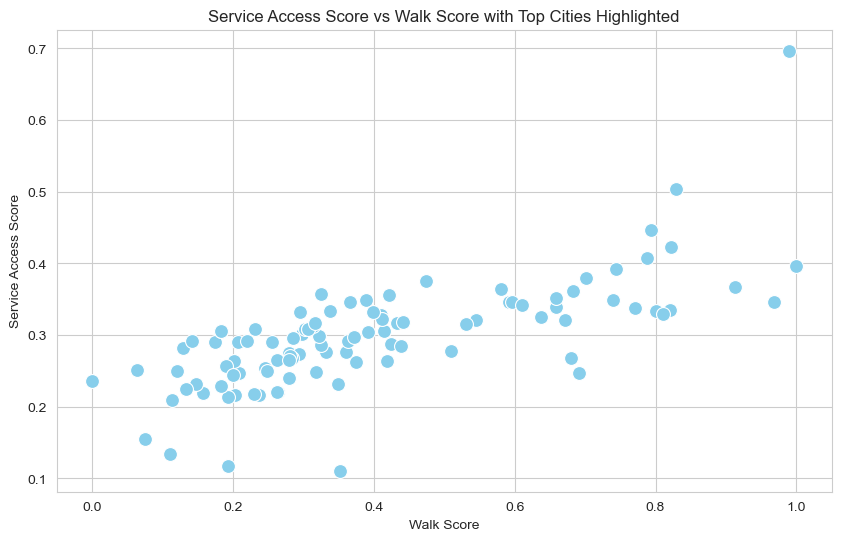

In [27]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=df, color='skyblue', s=100)
plt.title("Service Access Score vs Walk Score with Top Cities Highlighted")
plt.xlabel("Walk Score")
plt.ylabel("Service Access Score")
plt.show()

# Interpretation

- Positive Correlation:

    - The scatter plot shows a general positive trend: cities with higher Walk Scores tend to have higher overall Service Access Scores.

    - This suggests that walkability is a strong contributor to overall service access, as expected in urban planning.

- Top Cities:

    - Cities with both high Walk Scores and high Service Access Scores likely have well-connected neighborhoods, easy access to parks, transit, and amenities.

    - These cities serve as examples of best practices in pedestrian-friendly urban design.

- Bottom Cities:

    - Cities with low Walk Scores and low Service Access Scores may suffer from poor pedestrian infrastructure, limited nearby amenities, and insufficient urban planning for multi-modal access.

    - These cities highlight areas for targeted urban development and investment in pedestrian and service access improvements.

- Insight for Policy and Planning:

    - Prioritizing improvements in walkability can have a strong positive effect on overall service access.

    - Urban planners can use this analysis to identify cities that would benefit most from investments in pedestrian infrastructure to improve equity and accessibility.

# Transit Score vs Service Access

In [28]:
# Top 10 cities with high Transit Score & high Service Access
top_transit_access = df.sort_values(by=['Transit Score', 'ServiceAccessScore'], ascending=False).head(10)
print("Top 10 Cities: High Transit Score & High Service Access")
print(top_transit_access[['City', 'Transit Score', 'ServiceAccessScore']])

# Bottom 10 cities with low Transit Score & low Service Access
bottom_transit_access = df.sort_values(by=['Transit Score', 'ServiceAccessScore'], ascending=True).head(10)
print("\nBottom 10 Cities: Low Transit Score & Low Service Access")
print(bottom_transit_access[['City', 'Transit Score', 'ServiceAccessScore']])

Top 10 Cities: High Transit Score & High Service Access
                City  Transit Score  ServiceAccessScore
21          New York       1.000000            0.696885
3      San Francisco       0.870203            0.397119
47            Boston       0.817156            0.366960
77       Jersey City       0.795711            0.346096
101  Washington D.C.       0.775395            0.422598
93      Philadelphia       0.756208            0.446224
17           Chicago       0.733634            0.503532
76            Newark       0.733634            0.329005
18           Seattle       0.672686            0.406991
44         Arlington       0.661400            0.348661

Bottom 10 Cities: Low Transit Score & Low Service Access
             City  Transit Score  ServiceAccessScore
61         Laredo       0.000000            0.218514
31    Baton Rouge       0.000000            0.220422
72     Greensboro       0.000000            0.249233
45       Richmond       0.000000            0.285383
51   

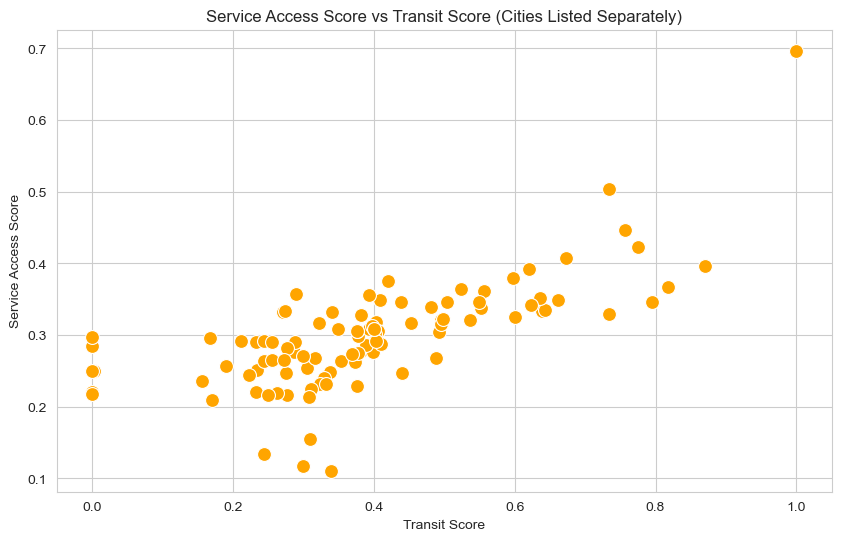

In [29]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Transit Score', y='ServiceAccessScore', data=df, color='orange', s=100)
plt.title("Service Access Score vs Transit Score (Cities Listed Separately)")
plt.xlabel("Transit Score")
plt.ylabel("Service Access Score")
plt.show()

## Interpretation

- Positive Correlation:

    - The scatter plot shows that cities with higher Transit Scores generally have higher overall Service Access Scores.

    - This indicates that access to public transportation strongly contributes to overall service availability, supporting mobility and connectivity in urban areas.

- Top Cities:

    - Cities with high Transit Scores and high Service Access Scores likely have well-integrated public transit systems, nearby amenities, and multi-modal connectivity.

    - These cities can serve as benchmarks for efficient transit-oriented urban planning.

- Bottom Cities:

    - Cities with low Transit Scores and low Service Access Scores may have limited or unreliable public transportation and fewer accessible services.

    - These cities represent opportunities for policy interventions to expand transit infrastructure and improve equitable service access.

- Insight for Policy and Planning:

    - Enhancing transit access can significantly improve overall service availability in a city.

    - Urban planners can target cities with low Transit Scores for transit expansion projects, thereby improving mobility, sustainability, and equity.


# Bike Score vs Service Access

In [30]:
# Top 10 cities with high Bike Score & high Service Access
top_bike_access = df.sort_values(by=['Bike Score', 'ServiceAccessScore'], ascending=False).head(10)
print("Top 10 Cities: High Bike Score & High Service Access")
print(top_bike_access[['City', 'Bike Score', 'ServiceAccessScore']])

# Bottom 10 cities with low Bike Score & low Service Access
bottom_bike_access = df.sort_values(by=['Bike Score', 'ServiceAccessScore'], ascending=True).head(10)
print("\nBottom 10 Cities: Low Bike Score & Low Service Access")
print(bottom_bike_access[['City', 'Bike Score', 'ServiceAccessScore']])

Top 10 Cities: High Bike Score & High Service Access
                City  Bike Score  ServiceAccessScore
78       Minneapolis    1.000000            0.392010
20          Portland    0.985130            0.361178
3      San Francisco    0.791822            0.397119
44         Arlington    0.791822            0.348661
17           Chicago    0.789963            0.503532
67            Denver    0.782528            0.346548
18           Seattle    0.769517            0.406991
6         Long Beach    0.750929            0.338363
101  Washington D.C.    0.739777            0.422598
15            Irvine    0.739777            0.357009

Bottom 10 Cities: Low Bike Score & Low Service Access
           City  Bike Score  ServiceAccessScore
81    Nashville    0.000000            0.133545
70    Charlotte    0.029740            0.155317
72   Greensboro    0.046468            0.249233
43   Chesapeake    0.092937            0.236619
38  Kansas City    0.098513            0.290424
50   Cincinnati    0.

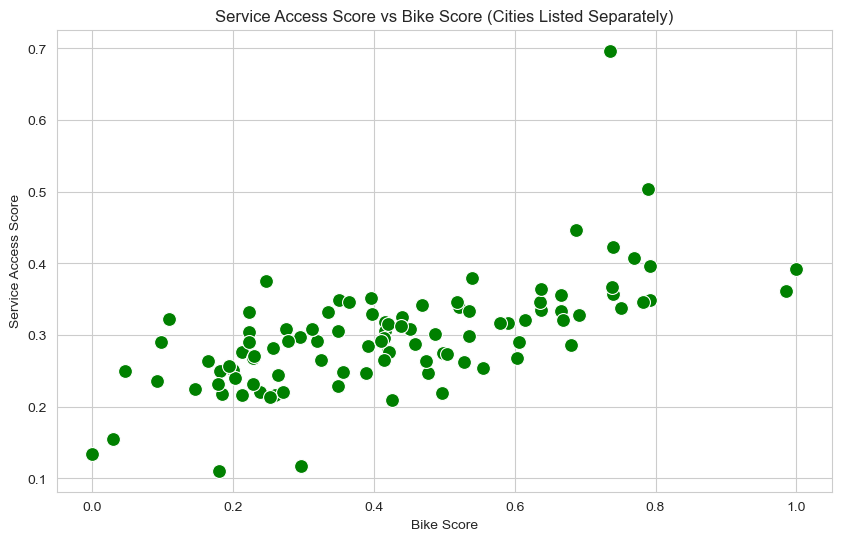

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Bike Score', y='ServiceAccessScore', data=df, color='green', s=100)
plt.title("Service Access Score vs Bike Score (Cities Listed Separately)")
plt.xlabel("Bike Score")
plt.ylabel("Service Access Score")
plt.show()

## Interpretation

- Positive Correlation:

    - The scatter plot shows that cities with higher Bike Scores tend to also have higher overall Service Access Scores.

    - This suggests that safe and accessible cycling infrastructure contributes meaningfully to a city’s overall service access and livability.

- Top Cities:

    - Cities with high Bike Scores and high Service Access Scores likely have extensive bike lanes, bike-sharing programs, and convenient access to amenities.

    - These cities exemplify the benefits of promoting active transportation for urban accessibility.

- Bottom Cities:

    - Cities with low Bike Scores and low Service Access Scores may lack safe cycling infrastructure, limiting mobility options and reducing access to local services.

    - These cities highlight areas where investment in cycling infrastructure could improve urban connectivity and sustainability.

- Insight for Policy and Planning:

    - Supporting bicycle-friendly infrastructure can boost overall service access and promote healthier, more sustainable urban mobility.

    - Planners can identify cities with low Bike Scores as candidates for cycling infrastructure development and active transport policies.


# Correlation heatmap for mobility scores

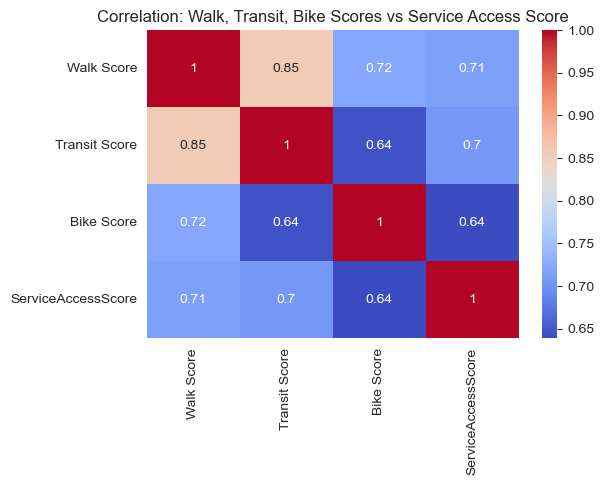

In [32]:
# Include Service Access Score
mobility_scores = df[['Walk Score', 'Transit Score', 'Bike Score', 'ServiceAccessScore']]

# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(mobility_scores.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation: Walk, Transit, Bike Scores vs Service Access Score")
plt.show()



In [33]:
# Top and bottom cities by Walk Score
top_walk = df[['City', 'Walk Score', 'ServiceAccessScore']].sort_values(by='Walk Score', ascending=False).head(10)
bottom_walk = df[['City', 'Walk Score', 'ServiceAccessScore']].sort_values(by='Walk Score', ascending=True).head(10)

print("Top 10 Cities by Walk Score:")
print(top_walk[['City', 'Walk Score', 'ServiceAccessScore']], "\n")

print("Bottom 10 Cities by Walk Score:")
print(bottom_walk[['City', 'Walk Score', 'ServiceAccessScore']], "\n")


Top 10 Cities by Walk Score:
                City  Walk Score  ServiceAccessScore
3      San Francisco    1.000000            0.397119
21          New York    0.989614            0.696885
77       Jersey City    0.968843            0.346096
47            Boston    0.912463            0.366960
17           Chicago    0.829377            0.503532
101  Washington D.C.    0.821958            0.422598
33             Miami    0.820475            0.334893
76            Newark    0.810089            0.329005
7            Oakland    0.801187            0.333984
93      Philadelphia    0.793769            0.446224 

Bottom 10 Cities by Walk Score:
            City  Walk Score  ServiceAccessScore
43    Chesapeake    0.000000            0.236619
32  Jacksonville    0.063798            0.250805
70     Charlotte    0.075668            0.155317
81     Nashville    0.111276            0.133545
29       Gilbert    0.114243            0.209740
72    Greensboro    0.120178            0.249233
88     Hend

In [34]:
 # Top and bottom cities by Transit Score
top_transit = df[['City', 'Transit Score', 'ServiceAccessScore']].sort_values(by='Transit Score', ascending=False).head(10)
bottom_transit = df[['City', 'Transit Score', 'ServiceAccessScore']].sort_values(by='Transit Score', ascending=True).head(10)

print("Top 10 Cities by Transit Score:")
print(top_transit[['City', 'Transit Score', 'ServiceAccessScore']], "\n")

print("Bottom 10 Cities by Transit Score:")
print(bottom_transit[['City', 'Transit Score', 'ServiceAccessScore']], "\n")

Top 10 Cities by Transit Score:
                City  Transit Score  ServiceAccessScore
21          New York       1.000000            0.696885
3      San Francisco       0.870203            0.397119
47            Boston       0.817156            0.366960
77       Jersey City       0.795711            0.346096
101  Washington D.C.       0.775395            0.422598
93      Philadelphia       0.756208            0.446224
17           Chicago       0.733634            0.503532
76            Newark       0.733634            0.329005
18           Seattle       0.672686            0.406991
44         Arlington       0.661400            0.348661 

Bottom 10 Cities by Transit Score:
             City  Transit Score  ServiceAccessScore
31    Baton Rouge       0.000000            0.220422
61         Laredo       0.000000            0.218514
72     Greensboro       0.000000            0.249233
45       Richmond       0.000000            0.285383
51         Toledo       0.000000            0.2968

In [35]:
# Top and bottom cities by Bike Score
top_bike = df[['City', 'Bike Score', 'ServiceAccessScore']].sort_values(by='Bike Score', ascending=False).head(10)
bottom_bike = df[['City', 'Bike Score', 'ServiceAccessScore']].sort_values(by='Bike Score', ascending=True).head(10)

print("Top 10 Cities by Bike Score:")
print(top_bike[['City', 'Bike Score', 'ServiceAccessScore']], "\n")

print("Bottom 10 Cities by Bike Score:")
print(bottom_bike[['City', 'Bike Score', 'ServiceAccessScore']], "\n")


Top 10 Cities by Bike Score:
                City  Bike Score  ServiceAccessScore
78       Minneapolis    1.000000            0.392010
20          Portland    0.985130            0.361178
3      San Francisco    0.791822            0.397119
44         Arlington    0.791822            0.348661
17           Chicago    0.789963            0.503532
67            Denver    0.782528            0.346548
18           Seattle    0.769517            0.406991
6         Long Beach    0.750929            0.338363
15            Irvine    0.739777            0.357009
101  Washington D.C.    0.739777            0.422598 

Bottom 10 Cities by Bike Score:
           City  Bike Score  ServiceAccessScore
81    Nashville    0.000000            0.133545
70    Charlotte    0.029740            0.155317
72   Greensboro    0.046468            0.249233
43   Chesapeake    0.092937            0.236619
38  Kansas City    0.098513            0.290424
50   Cincinnati    0.109665            0.322215
73       Durham   

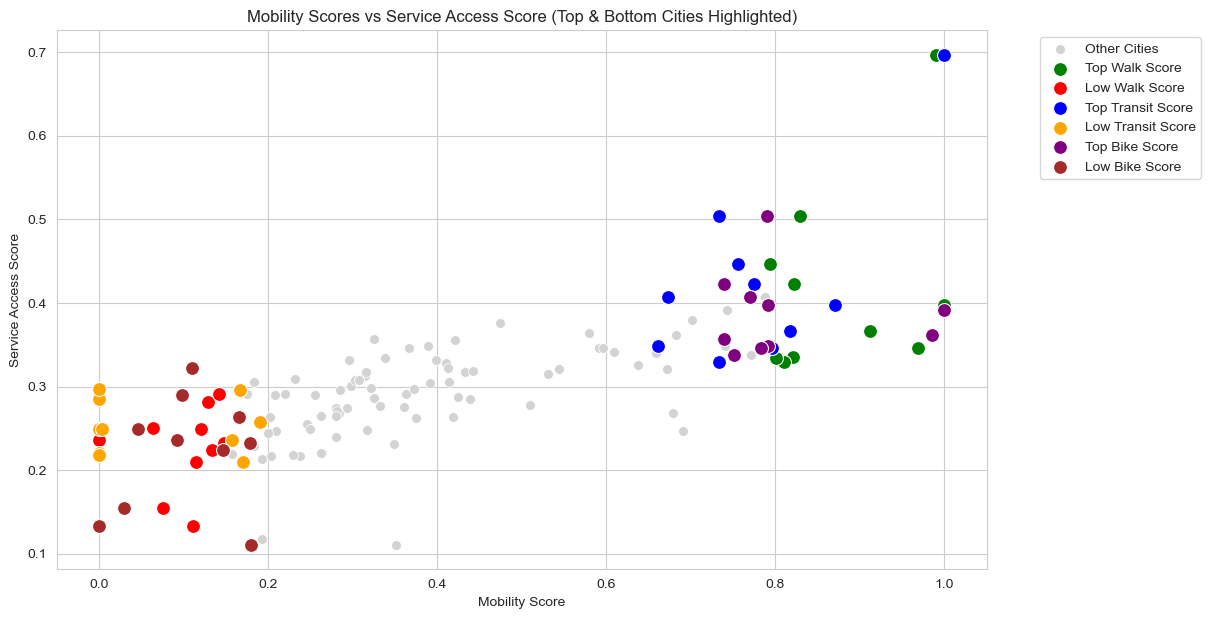

In [36]:
plt.figure(figsize=(12,7))

# Base grey for all cities
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=df, color='lightgrey', s=50, label='Other Cities')

# Highlight top/bottom Walk Score cities
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=top_walk, color='green', s=100, label='Top Walk Score')
sns.scatterplot(x='Walk Score', y='ServiceAccessScore', data=bottom_walk, color='red', s=100, label='Low Walk Score')

# Highlight top/bottom Transit Score cities
sns.scatterplot(x='Transit Score', y='ServiceAccessScore', data=top_transit, color='blue', s=100, label='Top Transit Score')
sns.scatterplot(x='Transit Score', y='ServiceAccessScore', data=bottom_transit, color='orange', s=100, label='Low Transit Score')

# Highlight top/bottom Bike Score cities
sns.scatterplot(x='Bike Score', y='ServiceAccessScore', data=top_bike, color='purple', s=100, label='Top Bike Score')
sns.scatterplot(x='Bike Score', y='ServiceAccessScore', data=bottom_bike, color='brown', s=100, label='Low Bike Score')

plt.title("Mobility Scores vs Service Access Score (Top & Bottom Cities Highlighted)")
plt.xlabel("Mobility Score")
plt.ylabel("Service Access Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# Interpretation
- Walk, Transit, and Bike Scores are positively correlated with each other.
- Cities with higher mobility scores generally have higher Service Access Scores.
- Most cities in the high mobility score range fall in the high Service Access tier,while cities with low mobility scores are often in the low Service Access tier.
- A few outliers exist where mobility scores are high but Service Access is low, indicating areas with good transport infrastructure but limited access to essential services.
- Improving mobility infrastructure could support better service access in low-access cities.


# Population Growth 

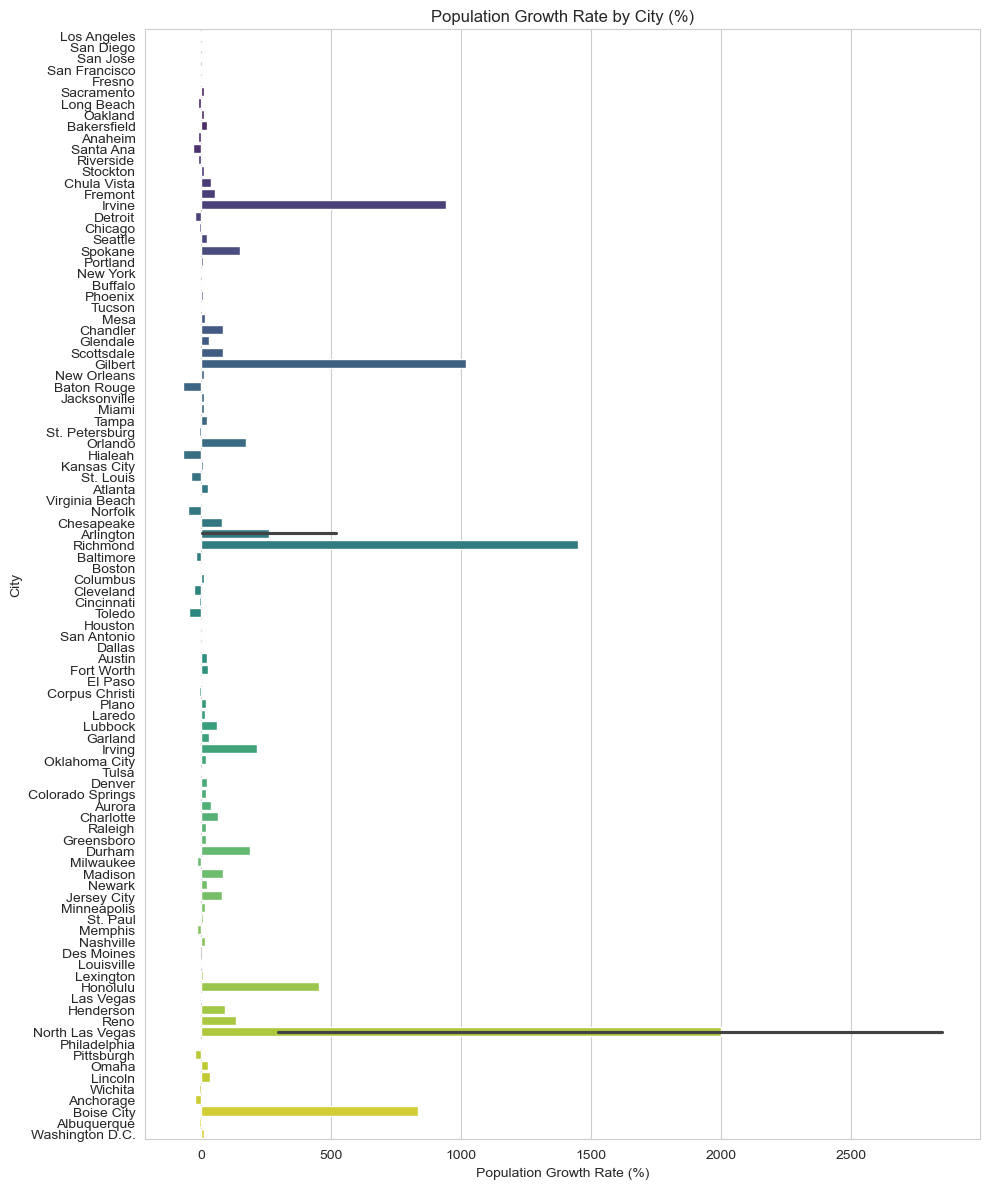

In [37]:
# 1. Calculating Population Growth Rate
df['Population_Growth_Rate'] = ((df['Population_2022_Census'] - df['Population_2021']) 
                                / df['Population_2021']) * 100

# 2. Visualizing Population Growth Rate by City
plt.figure(figsize=(10,12))  # taller figure for many cities
sns.barplot(x='Population_Growth_Rate', y='City', data=df, palette='viridis')
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("City")
plt.title("Population Growth Rate by City (%)")
plt.tight_layout()  # adjusts padding
plt.show()



In [38]:
# 3. Defining thresholds for high and low growth (e.g., using median)
growth_median = df['Population_Growth_Rate'].median()
score_median = df['ServiceAccessScore'].median()

# 4. Segmenting cities based on growth rate and service access score

# High Growth & High Service Access
high_growth_high_score = df[(df['Population_Growth_Rate'] > growth_median) & 
                            (df['ServiceAccessScore'] > score_median)][['City','Population_Growth_Rate','ServiceAccessScore']]

# High Growth & Low Service Access
high_growth_low_score = df[(df['Population_Growth_Rate'] > growth_median) & 
                           (df['ServiceAccessScore'] <= score_median)][['City','Population_Growth_Rate','ServiceAccessScore']]

# Low Growth & High Service Access
low_growth_high_score = df[(df['Population_Growth_Rate'] <= growth_median) & 
                           (df['ServiceAccessScore'] > score_median)][['City','Population_Growth_Rate','ServiceAccessScore']]

# Low Growth & Low Service Access
low_growth_low_score = df[(df['Population_Growth_Rate'] <= growth_median) & 
                          (df['ServiceAccessScore'] <= score_median)][['City','Population_Growth_Rate','ServiceAccessScore']]

# 5. Display results
print("High Growth & High Service Access Cities:\n", high_growth_high_score)



High Growth & High Service Access Cities:
                 City  Population_Growth_Rate  ServiceAccessScore
7            Oakland               12.773615            0.333984
15            Irvine              943.254202            0.357009
18           Seattle               23.881033            0.406991
19           Spokane              150.040804            0.305169
40           Atlanta               26.889676            0.303756
44         Arlington              519.365720            0.348661
48          Columbus               12.421128            0.332114
55            Austin               23.700181            0.307888
67            Denver               22.708411            0.346548
69            Aurora               37.411124            0.312519
75           Madison               83.016536            0.355472
76            Newark               21.776395            0.329005
77       Jersey City               80.158295            0.346096
78       Minneapolis               14.017881   

In [39]:
print("\nHigh Growth & Low Service Access Cities:\n", high_growth_low_score)


High Growth & Low Service Access Cities:
                 City  Population_Growth_Rate  ServiceAccessScore
8        Bakersfield               23.568890            0.216551
13       Chula Vista               37.953389            0.276082
14           Fremont               53.507385            0.287414
25              Mesa               16.067896            0.254762
26          Chandler               86.379129            0.246644
27          Glendale               32.756152            0.274491
28        Scottsdale               84.194546            0.218900
29           Gilbert             1018.065640            0.209740
32      Jacksonville               13.608039            0.250805
34             Tampa               21.677251            0.263371
36           Orlando              172.689680            0.274010
43        Chesapeake               82.302080            0.236619
45          Richmond             1448.353287            0.285383
56        Fort Worth               28.661397   

In [40]:
print("\nLow Growth & High Service Access Cities:\n", low_growth_high_score)


Low Growth & High Service Access Cities:
                City  Population_Growth_Rate  ServiceAccessScore
0       Los Angeles               -5.062033            0.379864
1         San Diego               -1.476570            0.376087
2          San Jose               -0.293281            0.316959
3     San Francisco                2.262565            0.397119
5        Sacramento               11.332184            0.328384
6        Long Beach              -12.151552            0.338363
16          Detroit              -24.050936            0.318985
17          Chicago               -6.051528            0.503532
20         Portland                8.718637            0.361178
21         New York                0.000000            0.696885
22          Buffalo               -2.650020            0.321629
23          Phoenix                6.357881            0.301272
30      New Orleans               12.229566            0.320537
33            Miami               12.036474            0.3348

In [41]:
print("\nLow Growth & Low Service Access Cities:\n", low_growth_low_score)


Low Growth & Low Service Access Cities:
               City  Population_Growth_Rate  ServiceAccessScore
4           Fresno                4.541797            0.262992
9          Anaheim              -11.032280            0.277639
10       Santa Ana              -30.638801            0.268752
11       Riverside               -9.338480            0.248562
12        Stockton               10.382643            0.276333
24          Tucson               -3.507857            0.286107
31     Baton Rouge              -67.121552            0.220422
37         Hialeah              -68.290883            0.246954
38     Kansas City                8.115355            0.290424
41  Virginia Beach               -3.029423            0.291052
42         Norfolk              -51.102943            0.291429
57         El Paso               -2.685755            0.268206
58       Arlington                3.569089            0.249645
59  Corpus Christi               -7.310829            0.270877
66           

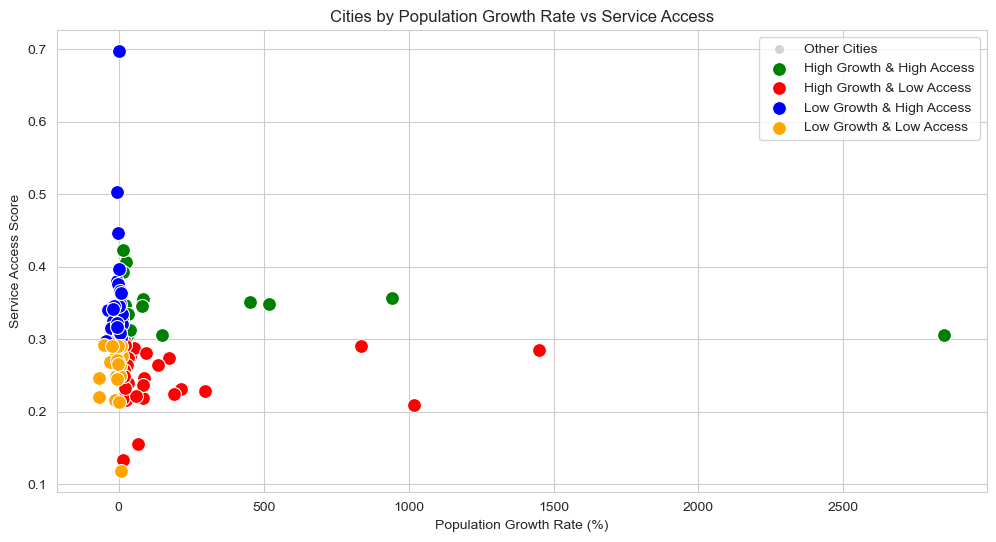

In [42]:
# Visualizing Population Growth vs Service Access with categories
plt.figure(figsize=(12,6))

# Plotting all cities in light grey
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=df, color='lightgrey', s=50, label='Other Cities')

# High Growth & High Service Access
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=high_growth_high_score, color='green', s=100, label='High Growth & High Access')

# High Growth & Low Service Access
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=high_growth_low_score, color='red', s=100, label='High Growth & Low Access')

# Low Growth & High Service Access
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=low_growth_high_score, color='blue', s=100, label='Low Growth & High Access')

# Low Growth & Low Service Access
sns.scatterplot(x='Population_Growth_Rate', y='ServiceAccessScore',
                data=low_growth_low_score, color='orange', s=100, label='Low Growth & Low Access')

plt.title("Cities by Population Growth Rate vs Service Access")
plt.xlabel("Population Growth Rate (%)")
plt.ylabel("Service Access Score")
plt.legend()
plt.show()


### Visualization: Population Growth vs Service Access

- **Green:** High Growth & High Access – cities growing fast while maintaining good service coverage.  
- **Red:** High Growth & Low Access – fast-growing cities under service pressure; need infrastructure focus.  
- **Blue:** Low Growth & High Access – slower-growing cities with well-established services.  
- **Orange:** Low Growth & Low Access – cities with both low growth and low service access, likely underserved.

This visualization helps identify cities requiring **urgent planning** (red), versus those performing efficiently (green & blue).


### Interpretations: Service Access vs Population Growth

1. **High Growth & High Service Access**  
   - Cities in this quadrant are experiencing **rapid demographic expansion** while still maintaining **strong accessibility to services** such as transit, walkability, bike infrastructure, and parks.  
   - This combination is relatively rare because high population growth often puts pressure on urban systems, but when achieved, it reflects **effective planning and investment in scalable infrastructure**.  
   - Such cities can act as **models for sustainable growth**, showing that it is possible to expand while avoiding service deficits.  
   - Policy lesson: These cities should continue monitoring population trends to ensure infrastructure keeps pace with demand, but they already provide a blueprint for other fast-growing metros.

2. **High Growth & Low Service Access**  
   - Cities in this category are expanding rapidly but **lag behind in service provision**. This imbalance often leads to **increased car dependence**, traffic congestion, unequal access to amenities, and environmental stress.  
   - The gap suggests that while population is rising, urban services like transit networks, walkable neighborhoods, and bike infrastructure are **not keeping up**.  
   - If left unaddressed, these accessibility gaps may widen, disproportionately affecting low-income and marginalized populations who rely more on public transit and local services.  
   - Policy lesson: Urban planners and city governments must **prioritize infrastructure investment and zoning reforms** to prevent long-term inequities and inefficiencies.

3. **Low Growth & High Service Access**  
   - Cities here have **slower or stable population growth** but maintain **high service accessibility**. This typically indicates **mature infrastructure systems** that have been developed over time and continue to serve residents effectively.  
   - These cities may not face immediate strain from growth but can act as **examples of efficient service provision** and **balanced urban design**.  
   - Policy lesson: For these cities, the challenge is less about expansion and more about **maintaining infrastructure quality** and ensuring equitable access across different neighborhoods. They can focus on refining and modernizing existing systems.

4. **Low Growth & Low Service Access**  
   - Cities with both low growth and low service access face a **double challenge**. On one hand, population pressures are not overwhelming; on the other hand, residents still experience **limited accessibility to key services**.  
   - This can signal **structural underinvestment** in infrastructure or historical patterns of urban design that prioritize cars over public transit and local amenities.  
   - Such cities may be overlooked in planning discussions since growth is minimal, but residents in these areas may face long-standing inequities in mobility and access.  
   - Policy lesson: Proactive investment is required here, not for scaling up with growth but for **correcting deficiencies** and ensuring a minimum standard of equitable urban service access.

---

**Overall Insight:**  
- The comparison of **Service Access Scores with Population Growth** provides a powerful framework for identifying where **urban planning efforts are most urgently needed**.  
- High-growth cities with low access represent **emerging problem areas** that, without intervention, risk deepening inequities and car-dependence.  
- Low-growth cities with low access highlight **persistent inequalities** that are not caused by growth pressures but by **historical planning decisions and underinvestment**.  
- Conversely, high-access cities, whether fast- or slow-growing, serve as **positive case studies**, showing that sustainable and inclusive accessibility is achievable.  
- From a policy perspective, these findings suggest a need for **differentiated strategies**:  
  - **Growth management and infrastructure scaling** in fast-growing cities.  
  - **Equity-focused retrofitting and service enhancement** in slow-growth but low-access cities.  
  - **Maintenance and modernization** in slow-growth, high-access cities.  

Ultimately, analyzing accessibility in the context of population dynamics helps planners and policymakers move beyond static averages, enabling them to anticipate future pressures, address long-standing inequities, and design cities aligned with the vision of the **15-minute city**.


# Density Analysis

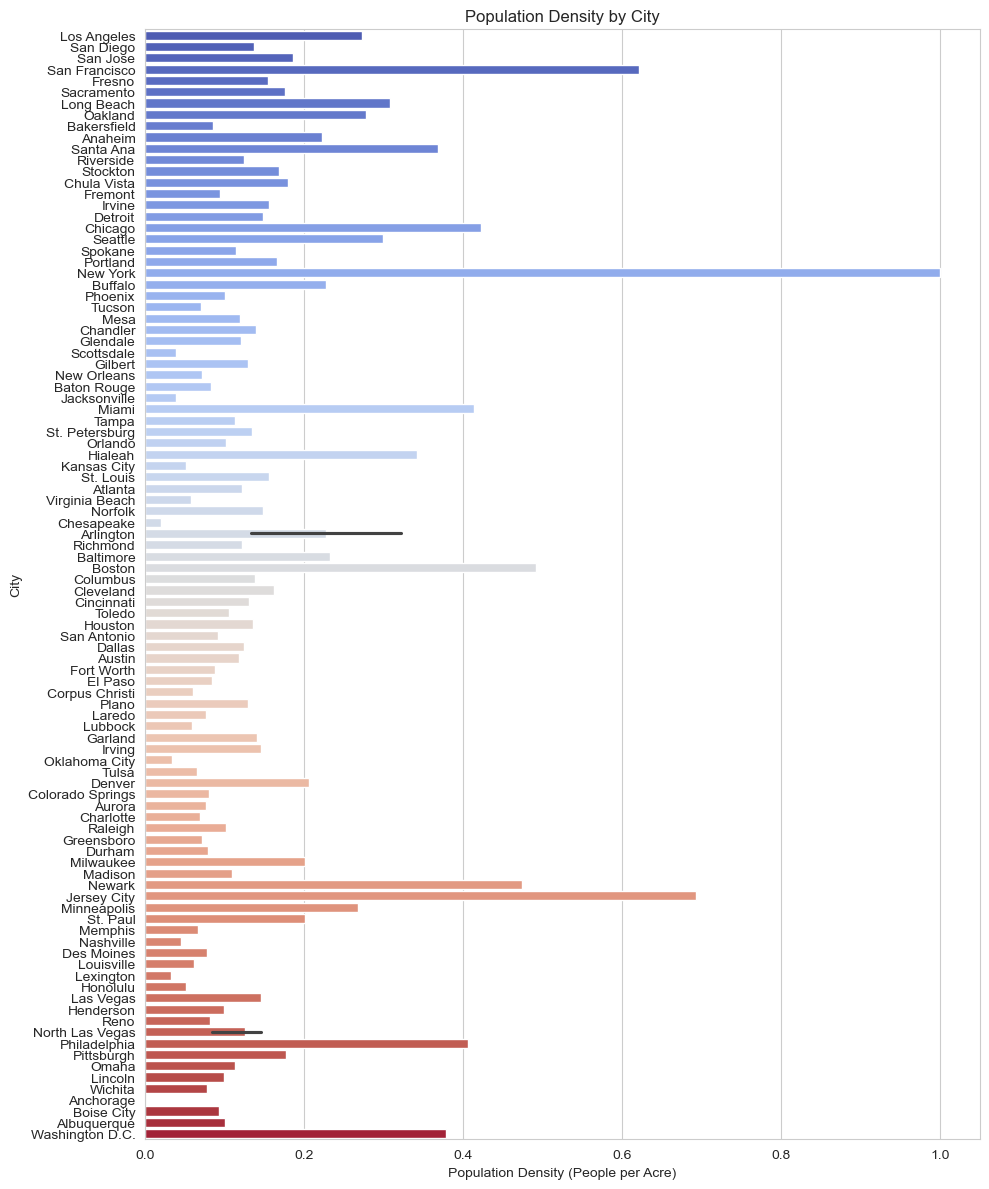

In [43]:
# Horizontal bar plot for Population Density
plt.figure(figsize=(10,12))  # taller figure for readability
sns.barplot(x='City_Population_Stats_density__people_acre_', y='City', data=df, palette='coolwarm')
plt.xlabel("Population Density (People per Acre)")
plt.ylabel("City")
plt.title("Population Density by City")
plt.tight_layout()  # adjust layout for clarity
plt.show()


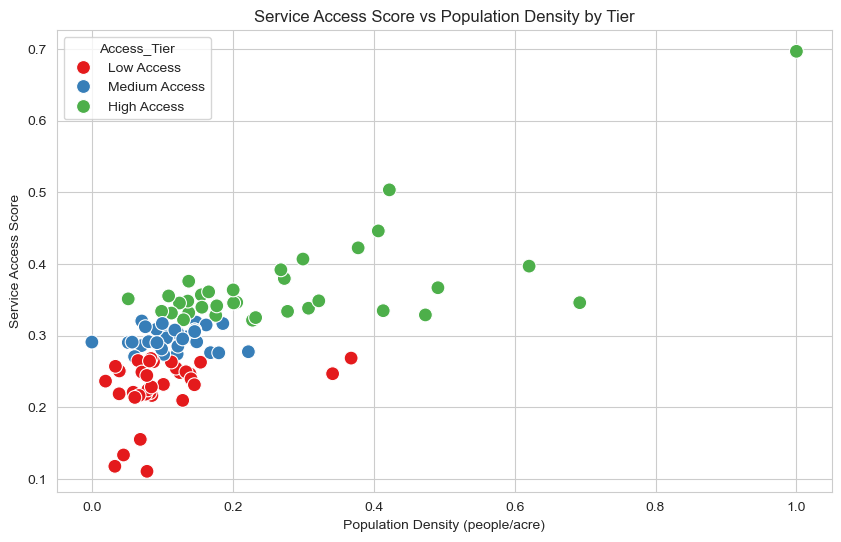

In [44]:
 #Compare Access Score with Population Density ---
plt.figure(figsize=(10,6))
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                hue='Access_Tier', data=df, palette='Set1', s=100)
plt.title("Service Access Score vs Population Density by Tier")
plt.xlabel("Population Density (people/acre)")
plt.ylabel("Service Access Score")
plt.show()

Cities with Low Population Density & High Service Access:
        City  City_Population_Stats_density__people_acre_  ServiceAccessScore
85  Honolulu                                     0.051574            0.351398

Cities with High Population Density & Low Service Access:
       City  City_Population_Stats_density__people_acre_  ServiceAccessScore
37  Hialeah                                     0.341678            0.246954


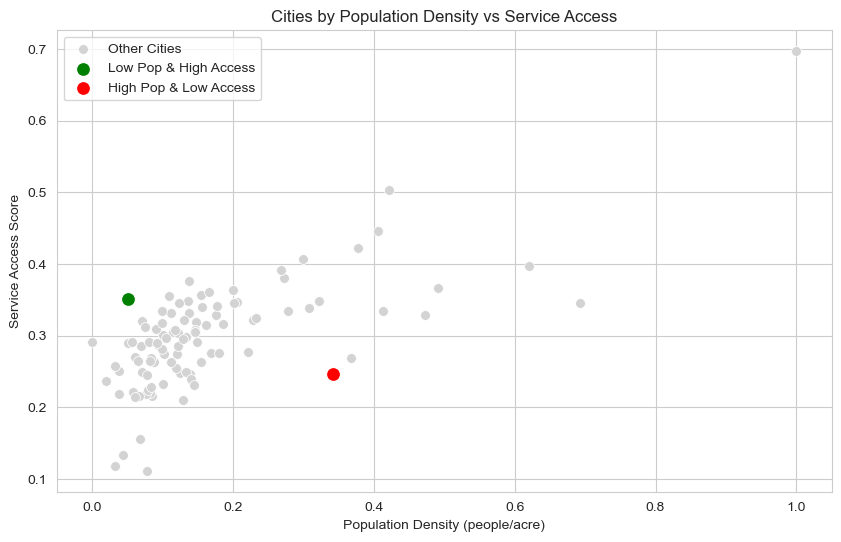

In [48]:
# Defining thresholds for "high" and "low"
pop_density_high = df['City_Population_Stats_density__people_acre_'].quantile(0.75)  # top 25%
pop_density_low = df['City_Population_Stats_density__people_acre_'].quantile(0.25)   # bottom 25%
access_score_high = df['ServiceAccessScore'].quantile(0.75)  # top 25%
access_score_low = df['ServiceAccessScore'].quantile(0.25)   # bottom 25%

# --- 1. Low population density & high service access ---
low_pop_high_access = df[(df['City_Population_Stats_density__people_acre_'] <= pop_density_low) &
                         (df['ServiceAccessScore'] >= access_score_high)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]
print("Cities with Low Population Density & High Service Access:")
print(low_pop_high_access)

# --- 2. High population density & low service access ---
high_pop_low_access = df[(df['City_Population_Stats_density__people_acre_'] >= pop_density_high) &
                         (df['ServiceAccessScore'] <= access_score_low)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]
print("\nCities with High Population Density & Low Service Access:")
print(high_pop_low_access)

#  visualizing these categories on scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=df, color='lightgrey', s=50, label='Other Cities')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=low_pop_high_access, color='green', s=100, label='Low Pop & High Access')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=high_pop_low_access, color='red', s=100, label='High Pop & Low Access')
plt.title("Cities by Population Density vs Service Access")
plt.xlabel("Population Density (people/acre)")
plt.ylabel("Service Access Score")
plt.legend()
plt.show()


### Interpretations: Service Access vs Population Density

1. **Low Population Density & High Service Access**  
   -  Honolulu
   - Honolulu stands out with a **low population density (~0.052 people/acre)** but a **relatively high service access score (0.351)**.  
   - This suggests that even in less densely populated areas, it is possible to maintain **strong accessibility to services** through thoughtful urban planning, zoning policies, and investment in distributed infrastructure.  
   - Honolulu’s case challenges the assumption that density is always a prerequisite for accessibility. Instead, it highlights how **strategic placement of amenities, transit options, and public services** can compensate for lower density.  
   - **Takeaway:** Low-density cities can still achieve high accessibility when infrastructure is well-planned, ensuring equitable service delivery without relying solely on compact urban form.

2. **High Population Density & Low Service Access**  
   -  Hialeah  
   - Hialeah illustrates the opposite scenario: **very high density but low service access**.  
   - This imbalance signals that infrastructure and services may not be keeping up with the needs of a growing and compact population.  
   - Residents in such cities may face challenges like **overcrowded public transit, insufficient walkable spaces, or limited distribution of amenities** relative to the number of people.  
   - High density, while often celebrated for enabling walkability and efficient public transit, can also **magnify accessibility problems if not paired with proportional service investment**.  
   - **Takeaway:** Density on its own does not guarantee accessibility—services must expand alongside population growth to avoid congestion, inequity, and urban stress.

3. **Low Population Density & Low Service Access**  
   - Many suburban or exurban cities fall into this category, where both density and accessibility are low.  
   - In such areas, residents often rely heavily on private vehicles, as public transit and walkability are minimal.  
   - While these places may not face immediate infrastructure strain due to lower population levels, they can perpetuate **car dependence, limited inclusivity, and higher environmental costs**.  
   - **Policy lesson:** Targeted investments in **transit corridors, bike infrastructure, and distributed amenities** can gradually improve accessibility even without large density increases.

4. **High Population Density & High Service Access**  
   - The “ideal” quadrant is occupied by cities that combine **dense populations with strong service access**.  
   - These cities successfully leverage density to support **robust transit networks, walkability, and amenity-rich neighborhoods**, reflecting the principles of the **15-minute city**.  
   - They represent urban environments where density translates into convenience, reduced car dependence, and equitable service coverage.  
   - **Policy lesson:** Maintaining this balance requires **continuous reinvestment** as populations grow, ensuring infrastructure scales proportionally.

---

### Overall Insight
- The analysis reveals that **population density and service access are not linearly correlated**.  
- While density often provides opportunities for greater accessibility, it can also highlight weaknesses if services fail to keep pace. Conversely, low-density areas can outperform expectations when **planning and infrastructure distribution are effective**.  
- For policymakers:  
  - **High-density, low-access cities** should be prioritized for service expansion to prevent congestion, inequity, and poor quality of life.  
  - **Low-density, high-access cities** provide valuable case studies in **distributed planning** and **efficient infrastructure deployment**.  
  - **Low-density, low-access areas** should focus on **multi-modal transport options** and incremental infrastructure investment to reduce car dependence.  
  - **High-density, high-access cities** should be safeguarded through **sustainable scaling** of services as populations continue to grow.  

Ultimately, this analysis underscores the importance of **planning beyond density metrics**. Accessibility depends not just on how many people live in a space, but on how effectively urban design and infrastructure allow those people to reach essential services.


# All four categories 

In [46]:
# --- Thresholds (quartiles) ---
pop_density_high = df['City_Population_Stats_density__people_acre_'].quantile(0.75)
pop_density_low = df['City_Population_Stats_density__people_acre_'].quantile(0.25)
access_score_high = df['ServiceAccessScore'].quantile(0.75)
access_score_low = df['ServiceAccessScore'].quantile(0.25)

# --- Quadrants ---
# 1. Low population density & high service access
low_pop_high_access = df[(df['City_Population_Stats_density__people_acre_'] <= pop_density_low) &
                         (df['ServiceAccessScore'] >= access_score_high)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]

# 2. High population density & low service access
high_pop_low_access = df[(df['City_Population_Stats_density__people_acre_'] >= pop_density_high) &
                         (df['ServiceAccessScore'] <= access_score_low)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]

# 3. High population density & high service access
high_pop_high_access = df[(df['City_Population_Stats_density__people_acre_'] >= pop_density_high) &
                          (df['ServiceAccessScore'] >= access_score_high)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]

# 4. Low population density & low service access
low_pop_low_access = df[(df['City_Population_Stats_density__people_acre_'] <= pop_density_low) &
                        (df['ServiceAccessScore'] <= access_score_low)][['City', 'City_Population_Stats_density__people_acre_', 'ServiceAccessScore']]

# --- Print results ---
print("Cities with Low Population Density & High Service Access:\n", low_pop_high_access, "\n")
print("Cities with High Population Density & Low Service Access:\n", high_pop_low_access, "\n")
print("Cities with High Population Density & High Service Access:\n", high_pop_high_access, "\n")
print("Cities with Low Population Density & Low Service Access:\n", low_pop_low_access, "\n")



Cities with Low Population Density & High Service Access:
         City  City_Population_Stats_density__people_acre_  ServiceAccessScore
85  Honolulu                                     0.051574            0.351398 

Cities with High Population Density & Low Service Access:
        City  City_Population_Stats_density__people_acre_  ServiceAccessScore
37  Hialeah                                     0.341678            0.246954 

Cities with High Population Density & High Service Access:
                 City  City_Population_Stats_density__people_acre_  \
0        Los Angeles                                     0.273168   
3      San Francisco                                     0.620576   
6         Long Beach                                     0.307476   
17           Chicago                                     0.422205   
18           Seattle                                     0.299611   
21          New York                                     1.000000   
33             Miami     

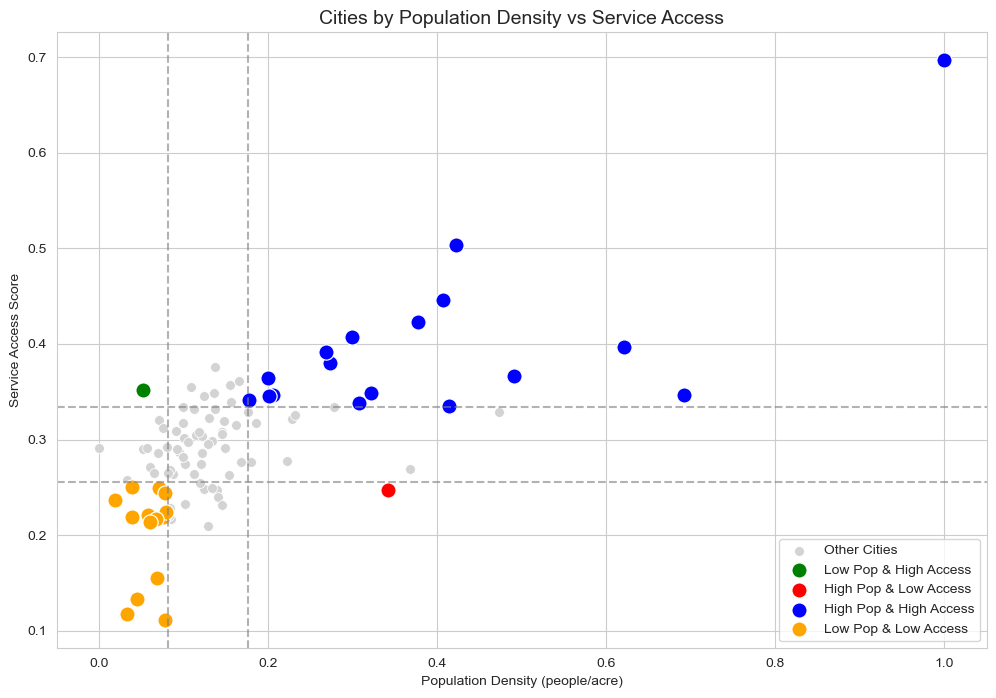

In [47]:
# --- Visualization ---
plt.figure(figsize=(12, 8))

# Base scatter (all cities)
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=df, color='lightgrey', s=50, label='Other Cities')

# Highlight quadrants
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=low_pop_high_access, color='green', s=120, label='Low Pop & High Access')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=high_pop_low_access, color='red', s=120, label='High Pop & Low Access')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=high_pop_high_access, color='blue', s=120, label='High Pop & High Access')
sns.scatterplot(x='City_Population_Stats_density__people_acre_', y='ServiceAccessScore',
                data=low_pop_low_access, color='orange', s=120, label='Low Pop & Low Access')

# Add threshold lines (to visually divide quadrants)
plt.axvline(x=pop_density_low, color='grey', linestyle='--', alpha=0.6)
plt.axvline(x=pop_density_high, color='grey', linestyle='--', alpha=0.6)
plt.axhline(y=access_score_low, color='grey', linestyle='--', alpha=0.6)
plt.axhline(y=access_score_high, color='grey', linestyle='--', alpha=0.6)

# Labels & title
plt.title("Cities by Population Density vs Service Access", fontsize=14)
plt.xlabel("Population Density (people/acre)")
plt.ylabel("Service Access Score")
plt.legend()
plt.show()

### Quadrant Interpretations: Service Access vs Population Density

1. **High Density & High Service Access**  
   - Cities in this quadrant represent the **ideal balance of urban form**: dense populations supported by strong infrastructure and accessibility.  
   - Residents in these cities typically enjoy **shorter commutes, better public transit coverage, and walkable neighborhoods**.  
   - These environments embody the vision of the **15-minute city**, where most essential services are within reach.  
   - **Policy takeaway:** These cities provide blueprints for integrating density with accessibility. To maintain this balance, continuous reinvestment is required as population grows.

2. **High Density & Low Service Access**  
   - This quadrant reveals cities under **infrastructure strain**.  
   - Despite having large populations in compact areas, these cities lack adequate transit, walkability, or distributed amenities.  
   - The result is **congestion, inequitable service distribution, and reliance on private vehicles** even in dense settings.  
   - Example: Hialeah highlights how density without investment can worsen accessibility gaps.  
   - **Policy takeaway:** Prioritize these cities for **targeted service expansion**, ensuring that density translates into livability instead of stress.

3. **Low Density & High Service Access**  
   - These cities show that **density is not the sole driver of accessibility**.  
   - Example: Honolulu demonstrates how even with a sparse population distribution, effective **infrastructure planning and service distribution** can deliver strong accessibility outcomes.  
   - Such cities often succeed through **well-managed transit corridors, strategic placement of services, and efficient governance**.  
   - **Policy takeaway:** Planners can draw lessons from these cities to design **equitable, service-rich environments** in low-density contexts.

4. **Low Density & Low Service Access**  
   - Cities here face a **double disadvantage**: limited populations spread over large areas and insufficient services.  
   - These areas often exhibit **car dependency, low walkability, and limited transit coverage**, contributing to exclusion for non-drivers.  
   - While infrastructure strain may not be immediate, long-term sustainability and equity issues persist.  
   - **Policy takeaway:** Incremental improvements, such as **expanding transit corridors, building mixed-use hubs, and adding bike-friendly infrastructure**, can gradually raise accessibility without requiring major density shifts.

---

### Overall Insight
- Unlike population growth, where demand clearly pressures service access, the **density–access relationship is more nuanced**.  
- High density does not guarantee high accessibility, and low density does not automatically result in poor access.  
- The key determinant is **how effectively infrastructure and services are planned and scaled** relative to population distribution.  
- By mapping cities into these four quadrants, planners can identify:  
  - **Models of success** (high density & high access; low density & high access).  
  - **Warning signs** (high density & low access; low density & low access).  
- Ultimately, accessibility must be viewed as a **product of both demographic factors and intentional policy choices**, not density alone.  


# Final Results

## Overview
This study examined the extent to which residents of U.S. cities live in “15-minute neighborhoods,” urban areas where essential public services such as schools, healthcare, parks, and retail are accessible within a short walk or bike ride.  

We evaluated cities using **Walk Score, Transit Score, Bike Score, Service Access Score, and Population Density** to quantify accessibility and identify patterns across metropolitan regions.

**Research Question:**  
How does accessibility to essential services vary across U.S. cities, and what lessons can guide equitable urban planning?

---

## 1. Distribution of Mobility Scores
- **Walk Score**
  - Generally higher than Transit and Bike Scores.
  - Suggests many U.S. cities provide basic walkable access but may fall short on broader multimodal mobility.
- **Transit Score**
  - Highly skewed; only a few cities (e.g., New York, San Francisco) have robust public transit systems.
- **Bike Score**
  - Shows moderate variation, indicating biking infrastructure is unevenly developed.

**Key Insight:**  
While walking-based 15-minute accessibility is moderately widespread, multimodal options are inconsistent, potentially limiting residents’ ability to reach services efficiently without a car.

---

## 2. Service Access vs Population Density
- **Examples**
  - **Honolulu:** Low-density city with high service accessibility; shows that thoughtful planning enables 15-minute neighborhood outcomes even without dense populations.
  - **Hialeah:** High density but low service accessibility; urban growth alone does not guarantee accessible services.

- **City Quadrants**
  - **High Density & High Access:** Large, well-planned cities (e.g., New York)
  - **High Density & Low Access:** Strained urban areas with limited 15-minute accessibility
  - **Low Density & High Access:** Efficiently planned cities achieving accessible neighborhoods (e.g., Honolulu)
  - **Low Density & Low Access:** Sparse regions with limited services

**Key Insight:**  
Achieving 15-minute neighborhoods depends on **planning quality and service allocation**, not solely on population density.

---

## 3. Walk, Transit, and Bike Score Relationships
- Cities with high Walk Scores generally show stronger Transit and Bike Scores, but exceptions exist.
- Examples: Portland and Minneapolis excel in biking infrastructure even if transit networks are moderate.

**Key Insight:**  
Multi-modal infrastructure is critical for true 15-minute neighborhood functionality — success in one mode does not guarantee overall accessibility.

---

## 4. Equity of Service Distribution
- Top-quartile cities in Service Access Score are not always the largest or most densely populated, emphasizing the role of policy and planning.
- Bottom-quartile cities highlight inequities, especially for low-income and mobility-constrained populations.

**Key Insight:**  
Accessibility is shaped by **intentional governance and investment**, reinforcing the importance of equity-focused urban planning.

---

## Overall Conclusion
- Walkability is generally adequate, but **transit and biking lag**, limiting full 15-minute neighborhood realization.
- Service accessibility is **not strongly tied to density**, confirming that cities of all sizes can either succeed or struggle in providing equitable access.

**Best Practices from Exemplar Cities**
- **Honolulu:** High accessibility despite low density
- **New York:** High density and strong accessibility

**Policy Implication:**  
To foster 15-minute neighborhoods, planners should **target underserved high-density areas** and expand integrated multi-modal networks.

---

## Discussion and Policy Recommendations

### 1. Service Access Beyond Density
- **Finding:** Density does not automatically lead to accessible neighborhoods.
- **Recommendation:** Adopt strategic service planning to ensure essential amenities are reachable within 15 minutes.

### 2. Addressing High Growth Strain
- **Finding:** Rapidly growing cities often lag in service provision.
- **Recommendation:** Prioritize infrastructure investment in high-density, low-access areas to reduce inequities.

### 3. Lessons from High Access Cities
- **Finding:** Governance, funding, and planning explain high-access outcomes.
- **Recommendation:** Implement knowledge-sharing programs across cities to replicate successful planning strategies.

### 4. Multi-Modal Accessibility Matters
- **Finding:** Walk, Transit, and Bike Scores are complementary but not always aligned.
- **Recommendation:** Invest in integrated infrastructure so residents can reliably access services via multiple modes.

### 5. Equity as a Central Goal
- **Finding:** Low-access areas disproportionately affect marginalized groups.
- **Recommendation:** Adopt **equity-first urban planning** to ensure underserved communities achieve 15-minute neighborhood accessibility.

**Final Takeaway:**  
15-minute neighborhoods are achievable through deliberate planning, policy prioritization, and multimodal infrastructure investment, not just through population density or city size.

---

## Limitations and Future Research

1. **Data Availability and Coverage**
   - Current city-level data may bias results.
   - **Future Work:** Expand analysis to suburbs, small towns, and rural areas.

2. **Static vs. Dynamic View**
   - Study provides a snapshot in time.
   - **Future Work:** Track accessibility over time to understand urban evolution.

3. **Scope of Service Access**
   - Service Access Score may omit dimensions like healthcare quality, education, or green spaces.
   - **Future Work:** Incorporate public health, environmental, and socio-economic indicators.

4. **Correlation vs. Causation**
   - Analyses show correlations, not causation.
   - **Future Work:** Use causal inference or machine learning to identify drivers of accessibility and successful 15-minute neighborhoods.

---

## Final Note
This research establishes a foundation for understanding urban accessibility in the U.S. By linking **Walk, Transit, Bike, and Service Access Scores** with **population density and policy factors**, we provide actionable insights for fostering 15-minute neighborhoods and advancing **equitable, sustainable urban planning**.
